In [21]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ruptures as rpt

In [22]:
# Set display options to show more rows and columns
pd.set_option('display.max_rows', None)  # To show all rows
pd.set_option('display.max_columns', None)  # To show all columns
pd.set_option('display.width', None)  # To adjust the display width

In [23]:
def getValues1(tagList):
    url = "https://exactspace.co/kairosapi/api/v1/datapoints/query"
    d = {
        "metrics": [
            {
                "tags": {},
                "name": "",
                "aggregators": [
                    {
                        "name": "avg",
                        "sampling": {
                            "value": "1",
                            "unit": "minutes"
                        }
                    }
                ]
            }
        ],
        "plugins": [],
        "cache_time": 0,
        "cache_time": 0,
        "start_relative": {
        "value": "2",
        "unit": "days"
      }
    }
    finalDF = pd.DataFrame()
    for tag in tagList:
        d['metrics'][0]['name'] = tag
        res = requests.post(url=url, json=d)
        values = json.loads(res.content)
        df = pd.DataFrame(values["queries"][0]["results"][0]['values'], columns=['time', values["queries"][0]["results"][0]['name']])
        finalDF = pd.concat([finalDF, df], axis=1)

    finalDF = finalDF.loc[:, ~finalDF.columns.duplicated()]
    finalDF.dropna(subset=['time'], inplace=True)
    finalDF['time'] = pd.to_datetime(finalDF['time'], unit='ms').dt.strftime('%d-%m-%y %H:%M')

    return finalDF

In [24]:
tags= [
    'GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric',
    'GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric',
    'GAP_GAP03.PLC03.SCHENCK2_FEED_RATE',
    'GAP_9dfb_BallMill_Total_Power',       # Ball mill Tags
    'GAP_GAP01.PLC01._362_E200_JIT_01.PV',
    'GAP_GAP01.PLC01._362_E310_FIT_01.PV',
    'GAP_GAP01.PLC01._362_E200_ST_01.PV', # Mixer Tags
    'GAP_GAP04.PLC04.Power_M1',
    'GAP_GAP04.PLC04.Power_M2',
    'GAP_GAP04.PLC04.MLD1_DATA_Anode_Height',
    'GAP_GAP04.PLC04.MLD2_DATA_Anode_Height',
    'GAP_GAP01.PLC01._362_E290_LIT_01.PV', #Fines silo level
    'GAP_GAP01.PLC01._362_E090_LIT_01.PV', #Grains silo level
    'GAP_GAP04.PLC04.K363_K180_PIT_01_PV', #Hydraulic pressure
    'GAP_GAP04.PLC04.K050_PIT_01_PV', #Mould 2 clamping pressure
    'GAP_GAP04.PLC04.MLD1_DATA_Mixer_Total_Power', #mixer power
    'GAP_GAP04.PLC04.MLD1_DATA_Anode_Weight', # anode m1 weight
    'GAP_GAP04.PLC04.MLD2_DATA_Anode_Weight', # anode m2 weight
    'GAP_GAP04.PLC04.MLD2_DATA_Anode_Dry_Density',
    'GAP_GAP04.PLC04.MLD1_DATA_Anode_Dry_Density',
    'GAP_GAP01.PLC01._362_E020_VT_01.PV',
    'GAP_GAP01.PLC01._362_E020_MVF_01.ACTRL.AUTOSPEEDREF',
    'GAP_GAP01.PLC01._362_E015_LIT_01.PV' #rhodax tags
]

In [25]:
raw_data=getValues1(tags)

In [26]:
raw_data.head()

time  GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric  \
0  21-10-23 05:07                                    1.65682   
1  21-10-23 05:08                                    1.66203   
2  21-10-23 05:09                                    1.66724   
3  21-10-23 05:10                                    1.66724   
4  21-10-23 05:11                                    1.66724   

   GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric  \
0                                   1.657120   
1                                   1.661130   
2                                   1.661130   
3                                   1.661130   
4                                   1.668397   

   GAP_GAP03.PLC03.SCHENCK2_FEED_RATE  GAP_9dfb_BallMill_Total_Power  \
0                         5947.578123                      19.583433   
1                         5944.465088                      19.867525   
2                         5961.351562                      19.585450   
3                         5930.288330                      19.542175   
4                         5945.989257                      19.957925   

   GAP_GAP01.PLC01._362_E200_JIT_01.PV  GAP_GAP01.PLC01._362_E310_FIT_01.PV  \
0                            19.583400                                  0.0   
1                            19.867532                                  0.0   
2                            19.585463                                  0.0   
3                            19.542178                                  0.0   
4                            19.957925                                  0.0   

   GAP_GAP01.PLC01._362_E200_ST_01.PV  GAP_GAP04.PLC04.Power_M1  \
0                           83.402573                  37.34558   
1                           85.254418                  37.22725   
2                           84.816688                  37.10892   
3                           84.123285                  37.10892   
4                           85.477695                  37.10892   

   GAP_GAP04.PLC04.Power_M2  GAP_GAP04.PLC04.MLD1_DATA_Anode_Height  \
0                  32.94363                              679.043190   
1                  32.94363                              682.405760   
2                  32.94363                              682.405760   
3                  32.65963                              682.405760   
4                  32.65963                              680.672622   

   GAP_GAP04.PLC04.MLD2_DATA_Anode_Height  \
0                               675.19745   
1                               678.55954   
2                               681.92163   
3                               681.92163   
4                               681.92163   

   GAP_GAP01.PLC01._362_E290_LIT_01.PV  GAP_GAP01.PLC01._362_E090_LIT_01.PV  \
0                            67.822757                            70.998758   
1                            68.673685                            73.423442   
2                            69.624223                            75.488430   
3                            70.617458                            77.023917   
4                            66.600845                            78.444085   

   GAP_GAP04.PLC04.K363_K180_PIT_01_PV  GAP_GAP04.PLC04.K050_PIT_01_PV  \
0                           200.062357                      130.793532   
1                           226.052850                      151.979250   
2                           212.680927                      288.815935   
3                           204.590700                      122.629760   
4                           211.843225                      174.735318   

   GAP_GAP04.PLC04.MLD1_DATA_Mixer_Total_Power  \
0                                   107.412445   
1                                   107.385650   
2                                   107.385650   
3                                   107.385650   
4                                   105.532030   

   GAP_GAP04.PLC04.MLD1_DATA_Anode_Weight  \
0                             1068.123843   
1                  

In [27]:
data = raw_data.copy()

In [28]:
data.shape

(1440, 24)

In [29]:
data=data[(data['GAP_GAP03.PLC03.SCHENCK2_FEED_RATE']>=5500) & (data['GAP_GAP03.PLC03.SCHENCK2_FEED_RATE']<6400)]

In [30]:
data.shape

(1110, 24)

In [31]:
data.head()

time  GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric  \
0  21-10-23 05:07                                    1.65682   
1  21-10-23 05:08                                    1.66203   
2  21-10-23 05:09                                    1.66724   
3  21-10-23 05:10                                    1.66724   
4  21-10-23 05:11                                    1.66724   

   GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric  \
0                                   1.657120   
1                                   1.661130   
2                                   1.661130   
3                                   1.661130   
4                                   1.668397   

   GAP_GAP03.PLC03.SCHENCK2_FEED_RATE  GAP_9dfb_BallMill_Total_Power  \
0                         5947.578123                      19.583433   
1                         5944.465088                      19.867525   
2                         5961.351562                      19.585450   
3                         5930.288330                      19.542175   
4                         5945.989257                      19.957925   

   GAP_GAP01.PLC01._362_E200_JIT_01.PV  GAP_GAP01.PLC01._362_E310_FIT_01.PV  \
0                            19.583400                                  0.0   
1                            19.867532                                  0.0   
2                            19.585463                                  0.0   
3                            19.542178                                  0.0   
4                            19.957925                                  0.0   

   GAP_GAP01.PLC01._362_E200_ST_01.PV  GAP_GAP04.PLC04.Power_M1  \
0                           83.402573                  37.34558   
1                           85.254418                  37.22725   
2                           84.816688                  37.10892   
3                           84.123285                  37.10892   
4                           85.477695                  37.10892   

   GAP_GAP04.PLC04.Power_M2  GAP_GAP04.PLC04.MLD1_DATA_Anode_Height  \
0                  32.94363                              679.043190   
1                  32.94363                              682.405760   
2                  32.94363                              682.405760   
3                  32.65963                              682.405760   
4                  32.65963                              680.672622   

   GAP_GAP04.PLC04.MLD2_DATA_Anode_Height  \
0                               675.19745   
1                               678.55954   
2                               681.92163   
3                               681.92163   
4                               681.92163   

   GAP_GAP01.PLC01._362_E290_LIT_01.PV  GAP_GAP01.PLC01._362_E090_LIT_01.PV  \
0                            67.822757                            70.998758   
1                            68.673685                            73.423442   
2                            69.624223                            75.488430   
3                            70.617458                            77.023917   
4                            66.600845                            78.444085   

   GAP_GAP04.PLC04.K363_K180_PIT_01_PV  GAP_GAP04.PLC04.K050_PIT_01_PV  \
0                           200.062357                      130.793532   
1                           226.052850                      151.979250   
2                           212.680927                      288.815935   
3                           204.590700                      122.629760   
4                           211.843225                      174.735318   

   GAP_GAP04.PLC04.MLD1_DATA_Mixer_Total_Power  \
0                                   107.412445   
1                                   107.385650   
2                                   107.385650   
3                                   107.385650   
4                                   105.532030   

   GAP_GAP04.PLC04.MLD1_DATA_Anode_Weight  \
0                             1068.123843   
1                  

In [32]:
data = data[(data['GAP_GAP04.PLC04.MLD2_DATA_Anode_Dry_Density'] <= 1.49) & 
            (data['GAP_GAP04.PLC04.MLD1_DATA_Anode_Dry_Density'] <= 1.49) & 
            (data['GAP_GAP04.PLC04.MLD2_DATA_Anode_Dry_Density'] > 0) & 
            (data['GAP_GAP04.PLC04.MLD1_DATA_Anode_Dry_Density'] > 0) & 
            (data['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'] <= 1.69) & 
            (data['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'] <= 1.69) & 
            (data['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'] >= 1.56) & 
            (data['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'] >= 1.56)]


In [33]:
data.shape

(1101, 24)

In [34]:
df_filtered=data.copy()

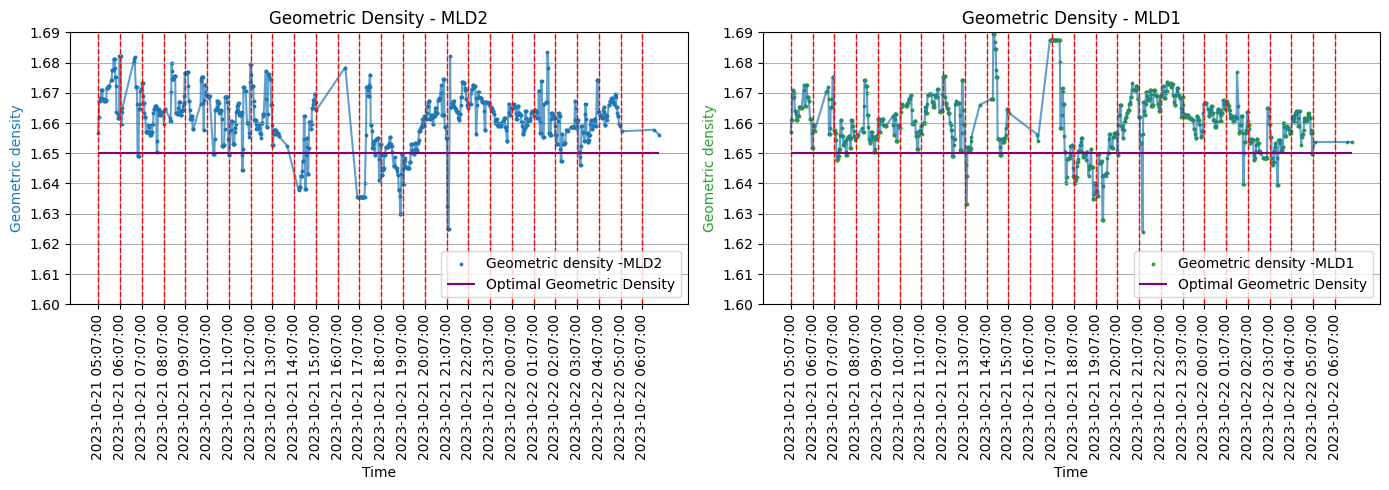

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered['time'] is already a datetime or timestamp series
df_filtered['time'] = pd.to_datetime(df_filtered['time'])

# Create a figure and a 1x2 subplot grid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot on the first subplot
ax1.scatter(df_filtered['time'], df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'], label='Geometric density -MLD2', color='tab:blue', s=3)
ax1.plot(df_filtered['time'], df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'], color='tab:blue', linestyle='-', marker='', alpha=0.7)
threshold = 1.65  # Set your threshold value here
ax1.hlines(threshold, df_filtered['time'].min(), df_filtered['time'].max(), color='purple', linestyles='solid', label='Optimal Geometric Density')
ax1.set_xlabel('Time')
ax1.set_ylabel('Geometric density', color='tab:blue')
ax1.set_title('Geometric Density - MLD2')

# Plot on the second subplot
ax2.scatter(df_filtered['time'], df_filtered['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'], label='Geometric density -MLD1', color='tab:green', s=3)
ax2.plot(df_filtered['time'], df_filtered['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'], color='tab:blue', linestyle='-', marker='', alpha=0.7)
threshold = 1.65  # Set your threshold value here
ax2.hlines(threshold, df_filtered['time'].min(), df_filtered['time'].max(), color='purple', linestyles='solid', label='Optimal Geometric Density')
ax2.set_xlabel('Time')
ax2.set_ylabel('Geometric density', color='tab:green')
ax2.set_title('Geometric Density - MLD1')

# Customize x-axis ticks as hourly intervals for both subplots
hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')
ax1.set_xticks(hourly_intervals)
ax1.set_xticklabels(hourly_intervals, rotation=90)
ax2.set_xticks(hourly_intervals)
ax2.set_xticklabels(hourly_intervals, rotation=90)

ax1.set_ylim(1.60, 1.69)
ax2.set_ylim(1.60, 1.69)

# Add a grid to both subplots
ax1.grid(True)
ax2.grid(True)

ax1.legend()
ax2.legend()

# Add vertical lines for each hour to both subplots
for interval in hourly_intervals:
    ax1.axvline(interval, color='red', linestyle='--', linewidth=1)
    ax2.axvline(interval, color='red', linestyle='--', linewidth=1)

plt.tight_layout()  # To ensure subplots don't overlap
plt.show()


In [36]:
# Geometric density From mould-1
hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

hourly_std_dev = []
for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]
    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'][mask]
    std_dev = data_subset.std()
    from_time = start_time.strftime('%Y-%m-%d %H:%M:%S')
    to_time = end_time.strftime('%Y-%m-%d %H:%M:%S')
    hourly_std_dev.append((from_time,to_time,std_dev))

for i, (from_time, to_time, std_dev) in enumerate(hourly_std_dev):
    print(f'Standard Deviation of Geometric density from mould-1:{from_time} to {to_time}: {std_dev:.4f}')

Standard Deviation of Geometric density from mould-1:2023-10-21 05:07:00 to 2023-10-21 06:07:00: 0.0048
Standard Deviation of Geometric density from mould-1:2023-10-21 06:07:00 to 2023-10-21 07:07:00: 0.0069
Standard Deviation of Geometric density from mould-1:2023-10-21 07:07:00 to 2023-10-21 08:07:00: 0.0037
Standard Deviation of Geometric density from mould-1:2023-10-21 08:07:00 to 2023-10-21 09:07:00: 0.0071
Standard Deviation of Geometric density from mould-1:2023-10-21 09:07:00 to 2023-10-21 10:07:00: 0.0026
Standard Deviation of Geometric density from mould-1:2023-10-21 10:07:00 to 2023-10-21 11:07:00: 0.0053
Standard Deviation of Geometric density from mould-1:2023-10-21 11:07:00 to 2023-10-21 12:07:00: 0.0039
Standard Deviation of Geometric density from mould-1:2023-10-21 12:07:00 to 2023-10-21 13:07:00: 0.0080
Standard Deviation of Geometric density from mould-1:2023-10-21 13:07:00 to 2023-10-21 14:07:00: 0.0080
Standard Deviation of Geometric density from mould-1:2023-10-21 

In [37]:
# Geometric density from mould-2


In [38]:
# Geometric density From mould-1
hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

hourly_std_dev = []
for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]
    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')
    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'][mask]
    specific_number = 1.65
    data = data_subset.values
    z_scores = (data - specific_number)/np.std(data)
    from_time = start_time.strftime('%Y-%m-%d %H:%M:%S')
    to_time = end_time.strftime('%Y-%m-%d %H:%M:%S')
    hourly_std_dev.append((from_time,to_time,std_dev))
    for k, value in enumerate(data):
        print(f'Data Point {k+1}: {value:.4f} is {z_scores[i]:.3f} standard deviations from {specific_number}.')
    threshold = 0.006
    within_range = z_scores <= threshold
    print("Data points within 1 standard deviations from the specific number:")
    print(data[within_range])
    print("\n")

for i, (from_time, to_time, std_dev) in enumerate(hourly_std_dev):
    print(f'Standard Deviation of Geometric density from mould-1:{from_time} to {to_time}: {std_dev:.4f}')

Standard Deviation of Geometric density from mould-1:2023-10-21 05:07:00 to 2023-10-21 06:07:00:
Data Point 1: 1.6571 is 1.487 standard deviations from 1.65.
Data Point 2: 1.6611 is 1.487 standard deviations from 1.65.
Data Point 3: 1.6611 is 1.487 standard deviations from 1.65.
Data Point 4: 1.6611 is 1.487 standard deviations from 1.65.
Data Point 5: 1.6684 is 1.487 standard deviations from 1.65.
Data Point 6: 1.6708 is 1.487 standard deviations from 1.65.
Data Point 7: 1.6708 is 1.487 standard deviations from 1.65.
Data Point 8: 1.6703 is 1.487 standard deviations from 1.65.
Data Point 9: 1.6700 is 1.487 standard deviations from 1.65.
Data Point 10: 1.6700 is 1.487 standard deviations from 1.65.
Data Point 11: 1.6685 is 1.487 standard deviations from 1.65.
Data Point 12: 1.6638 is 1.487 standard deviations from 1.65.
Data Point 13: 1.6638 is 1.487 standard deviations from 1.65.
Data Point 14: 1.6638 is 1.487 standard deviations from 1.65.
Data Point 15: 1.6631 is 1.487 standard devi

IndexError: index 10 is out of bounds for axis 0 with size 2

In [39]:
data_subset.values

array([1.66337, 1.66337])

In [40]:
# Geometric density From mould-1
hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

hourly_std_dev = []
for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]
    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')
    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]
    specific_number = 1.65
    data = data_subset.values
    z_scores = (data - specific_number)/np.std(data)
    from_time = start_time.strftime('%Y-%m-%d %H:%M:%S')
    to_time = end_time.strftime('%Y-%m-%d %H:%M:%S')
    hourly_std_dev.append((from_time,to_time,std_dev))
    for k, value in enumerate(data):
        print(f'Data Point {k+1}: {value:.4f} is {z_scores[i]:.3f} standard deviations from {specific_number}.')
    threshold = 0.006
    within_range = z_scores <= threshold
    print("Data points within 1 standard deviations from the specific number:")
    print(data[within_range])
    print("\n")

for i, (from_time, to_time, std_dev) in enumerate(hourly_std_dev):
    print(f'Standard Deviation of Geometric density from mould-2:{from_time} to {to_time}: {std_dev:.4f}')

Standard Deviation of Geometric density from mould-1:2023-10-21 05:07:00 to 2023-10-21 06:07:00:
Data Point 1: 1.6568 is 1.127 standard deviations from 1.65.
Data Point 2: 1.6620 is 1.127 standard deviations from 1.65.
Data Point 3: 1.6672 is 1.127 standard deviations from 1.65.
Data Point 4: 1.6672 is 1.127 standard deviations from 1.65.
Data Point 5: 1.6672 is 1.127 standard deviations from 1.65.
Data Point 6: 1.6682 is 1.127 standard deviations from 1.65.
Data Point 7: 1.6682 is 1.127 standard deviations from 1.65.
Data Point 8: 1.6682 is 1.127 standard deviations from 1.65.
Data Point 9: 1.6710 is 1.127 standard deviations from 1.65.
Data Point 10: 1.6710 is 1.127 standard deviations from 1.65.
Data Point 11: 1.6710 is 1.127 standard deviations from 1.65.
Data Point 12: 1.6710 is 1.127 standard deviations from 1.65.
Data Point 13: 1.6680 is 1.127 standard deviations from 1.65.
Data Point 14: 1.6680 is 1.127 standard deviations from 1.65.
Data Point 15: 1.6680 is 1.127 standard devi

c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


IndexError: index 10 is out of bounds for axis 0 with size 2

SyntaxError: invalid syntax (2873587311.py, line 1)

In [48]:
# Geometric density From mould-1
hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

hourly_std_dev = []
for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]
    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')
    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]
    specific_number = 1.65
    data = data_subset.values
    z_scores = (data - specific_number)/np.std(data)
    print(z_scores)
    from_time = start_time.strftime('%Y-%m-%d %H:%M:%S')
    to_time = end_time.strftime('%Y-%m-%d %H:%M:%S')
    hourly_std_dev.append((from_time,to_time,std_dev))
    negative_anode = 0
    for k, value in enumerate(data):

        if(len(z_scores) > 0):
           print(f'Data Point {k+1}: {value:.4f} is {z_scores[i]:.3f} standard deviations from {specific_number}.')
        if(z_scores[i] < -0.55):
            negative_anode += 1
        if(negative_anode > 15):
            print("negative z_scores")
            negative_anode = 0
            
    
    threshold = 0.006
    within_range = z_scores <= threshold
    print("Data points within 1 standard deviations from the specific number:")
    print(data[within_range])
    print("\n")



Standard Deviation of Geometric density from mould-1:2023-10-21 05:07:00 to 2023-10-21 06:07:00:
[1.12659028 1.98722597 2.84786166 2.84786166 2.84786166 3.00809517
 3.00809517 3.00809517 3.46401734 3.46401734 3.46401734 3.46401734
 2.97340544 2.97340544 2.97340544 2.94738814 2.86933625 2.86933625
 2.86933625 2.87759571 2.88585517 2.88585517 3.57799788 3.57799788
 3.57799788 3.57799788 3.67215572 3.67215572 3.67215572 4.02731248
 4.02731248 4.56582924 4.56582924 4.56582924 4.56582924 5.1258206
 5.1258206  5.1258206  5.1258206  4.64512006 4.16441951 4.16441951
 3.68537085 2.24822489 2.16480435 1.91454273 1.91454273 1.91454273
 1.91454273 5.2893579  5.2893579 ]
Data Point 1: 1.6568 is 1.127 standard deviations from 1.65.
Data Point 2: 1.6620 is 1.127 standard deviations from 1.65.
Data Point 3: 1.6672 is 1.127 standard deviations from 1.65.
Data Point 4: 1.6672 is 1.127 standard deviations from 1.65.
Data Point 5: 1.6672 is 1.127 standard deviations from 1.65.
Data Point 6: 1.6682 is 1.12

c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


IndexError: index 10 is out of bounds for axis 0 with size 2

In [49]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

hourly_std_dev = []

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]
    
    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')
    
    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]
    
    specific_number = 1.65
    data = data_subset.values
    
    z_scores = (data - specific_number) / np.std(data)
    
    from_time = start_time.strftime('%Y-%m-%d %H:%M:%S')
    to_time = end_time.strftime('%Y-%m-%d %H:%M:%S')
    
    # Calculate and store the standard deviation of the data within the interval
    std_dev = np.std(data)
    hourly_std_dev.append((from_time, to_time, std_dev))
    
    negative_anode = 0
    
    for k, value in enumerate(data):
        if len(z_scores) > 0:
            print(f'Data Point {k+1}: {value:.4f} is {z_scores[k]:.3f} standard deviations from {specific_number}.')
        if z_scores[k] < -0.55:
            negative_anode += 1
        if negative_anode > 15:
            print("negative z_scores")
            negative_anode = 0
            
    threshold = 0.006
    within_range = z_scores <= threshold
    
    print("Data points within 1 standard deviation from the specific number:")
    print(data[within_range])
    print("\n")

Standard Deviation of Geometric density from mould-1:2023-10-21 05:07:00 to 2023-10-21 06:07:00:
Data Point 1: 1.6568 is 1.127 standard deviations from 1.65.
Data Point 2: 1.6620 is 1.987 standard deviations from 1.65.
Data Point 3: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 4: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 5: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 6: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 7: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 8: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 9: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 10: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 11: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 12: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 13: 1.6680 is 2.973 standard deviations from 1.65.
Data Point 14: 1.6680 is 2.973 standard deviations from 1.65.
Data Point 15: 1.6680 is 2.973 standard devi

c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


In [50]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

hourly_std_dev = []

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]
    
    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')
    
    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]
    
    specific_number = 1.65
    data = data_subset.values
    
    z_scores = (data - specific_number) / np.std(data)
    
    for k, value in enumerate(data):
        if len(z_scores) > 0:
            print(f'Data Point {k+1}: {value:.4f} is {z_scores[k]:.3f} standard deviations from {specific_number}.')
            
    threshold = -0.5
    within_range = z_scores <= threshold
    
    print("Data points with higher negative z_scores: ")
    print(data[within_range])
    print(within_range)
    print(len(within_range))

    print("\n")

Standard Deviation of Geometric density from mould-1:2023-10-21 05:07:00 to 2023-10-21 06:07:00:
Data Point 1: 1.6568 is 1.127 standard deviations from 1.65.
Data Point 2: 1.6620 is 1.987 standard deviations from 1.65.
Data Point 3: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 4: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 5: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 6: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 7: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 8: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 9: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 10: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 11: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 12: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 13: 1.6680 is 2.973 standard deviations from 1.65.
Data Point 14: 1.6680 is 2.973 standard deviations from 1.65.
Data Point 15: 1.6680 is 2.973 standard devi

c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


Standard Deviation of Geometric density from mould-1:2023-10-21 05:07:00 to 2023-10-21 06:07:00:
Data Point 1: 1.6568 is 1.127 standard deviations from 1.65.
Data Point 2: 1.6620 is 1.987 standard deviations from 1.65.
Data Point 3: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 4: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 5: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 6: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 7: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 8: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 9: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 10: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 11: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 12: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 13: 1.6680 is 2.973 standard deviations from 1.65.
Data Point 14: 1.6680 is 2.973 standard deviations from 1.65.
Data Point 15: 1.6680 is 2.973 standard devi

c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


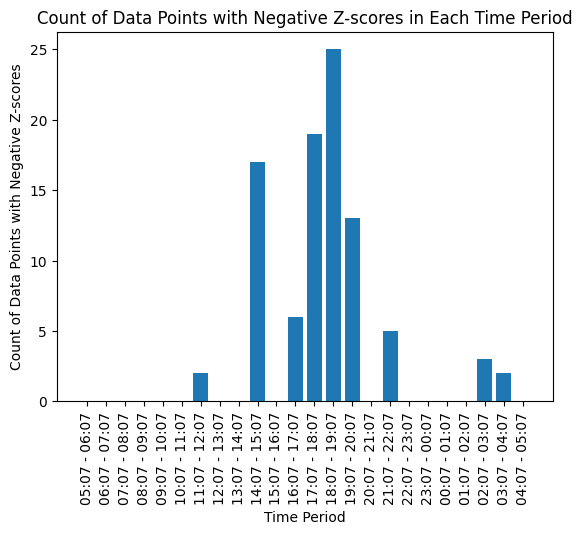

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

hourly_std_dev = []
negative_z_scores_count = []  # To store the count of data points with negative z-scores
time_periods = []  # To store the time periods for the x-axis

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]

    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')

    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]

    specific_number = 1.65
    data = data_subset.values

    z_scores = (data - specific_number) / np.std(data)

    negative_z_scores = z_scores[z_scores < -0.5]  # Adjust the threshold as needed

    # Append the count of data points with negative z-scores for each interval
    negative_z_scores_count.append(len(negative_z_scores))
    
    # Append the time period to be displayed on the x-axis
    time_periods.append(f'{start_time.strftime("%H:%M")} - {end_time.strftime("%H:%M")}')
    
    for k, value in enumerate(data):
        if len(z_scores) > 0:
            print(f'Data Point {k+1}: {value:.4f} is {z_scores[k]:.3f} standard deviations from {specific_number}.')

    print("Data points with higher negative z_scores: ")
    print(negative_z_scores)
    print(len(negative_z_scores))
    print("\n")

# Create a bar plot to show the count of data points with negative z-scores for each interval
plt.bar(time_periods, negative_z_scores_count)
plt.xlabel('Time Period')
plt.ylabel('Count of Data Points with Negative Z-scores')
plt.title('Count of Data Points with Negative Z-scores in Each Time Period')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

Standard Deviation of Geometric density from mould-1:2023-10-21 05:07:00 to 2023-10-21 06:07:00:
Data Point 1: 1.6568 is 1.127 standard deviations from 1.65.
Data Point 2: 1.6620 is 1.987 standard deviations from 1.65.
Data Point 3: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 4: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 5: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 6: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 7: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 8: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 9: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 10: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 11: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 12: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 13: 1.6680 is 2.973 standard deviations from 1.65.
Data Point 14: 1.6680 is 2.973 standard deviations from 1.65.
Data Point 15: 1.6680 is 2.973 standard devi

c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


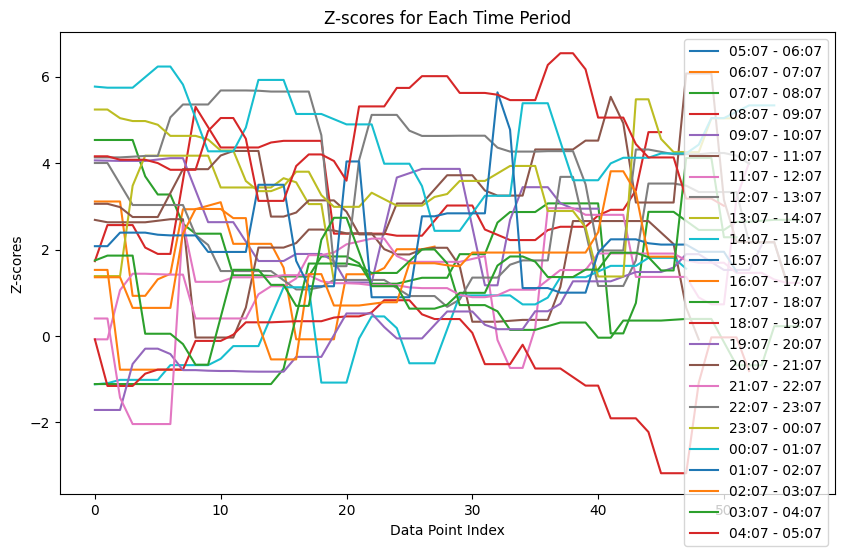

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

z_scores_per_period = {}  # To store z_scores for each period

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]

    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')

    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]

    specific_number = 1.65
    data = data_subset.values

    z_scores = (data - specific_number) / np.std(data)

    # Store z_scores in a dictionary with time period as the key
    time_period_str = f'{start_time.strftime("%H:%M")} - {end_time.strftime("%H:%M")}'
    z_scores_per_period[time_period_str] = z_scores
    
    for k, value in enumerate(data):
        if len(z_scores) > 0:
            print(f'Data Point {k+1}: {value:.4f} is {z_scores[k]:.3f} standard deviations from {specific_number}.')

    print("Data points with z_scores: ")
    print(z_scores)
    print("\n")

# Create a signal graph for z_scores
plt.figure(figsize=(10, 6))
for time_period, z_scores in z_scores_per_period.items():
    plt.plot(z_scores, label=time_period)

plt.xlabel('Data Point Index')
plt.ylabel('Z-scores')
plt.title('Z-scores for Each Time Period')
plt.legend(loc='best')
plt.show()

Standard Deviation of Geometric density from mould-1:2023-10-21 05:07:00 to 2023-10-21 06:07:00:
Data Point 1: 1.6568 is 1.127 standard deviations from 1.65.
Data Point 2: 1.6620 is 1.987 standard deviations from 1.65.
Data Point 3: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 4: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 5: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 6: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 7: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 8: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 9: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 10: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 11: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 12: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 13: 1.6680 is 2.973 standard deviations from 1.65.
Data Point 14: 1.6680 is 2.973 standard deviations from 1.65.
Data Point 15: 1.6680 is 2.973 standard devi

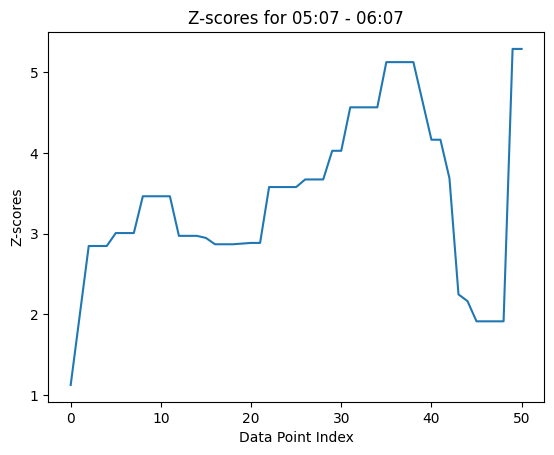

Standard Deviation of Geometric density from mould-1:2023-10-21 06:07:00 to 2023-10-21 07:07:00:
Data Point 1: 1.6820 is 3.111 standard deviations from 1.65.
Data Point 2: 1.6820 is 3.111 standard deviations from 1.65.
Data Point 3: 1.6820 is 3.111 standard deviations from 1.65.
Data Point 4: 1.6596 is 0.928 standard deviations from 1.65.
Data Point 5: 1.6596 is 0.928 standard deviations from 1.65.
Data Point 6: 1.6635 is 1.310 standard deviations from 1.65.
Data Point 7: 1.6648 is 1.438 standard deviations from 1.65.
Data Point 8: 1.6802 is 2.932 standard deviations from 1.65.
Data Point 9: 1.6802 is 2.932 standard deviations from 1.65.
Data Point 10: 1.6810 is 3.013 standard deviations from 1.65.
Data Point 11: 1.6819 is 3.095 standard deviations from 1.65.
Data Point 12: 1.6719 is 2.132 standard deviations from 1.65.
Data Point 13: 1.6719 is 2.132 standard deviations from 1.65.
Data Point 14: 1.6719 is 2.132 standard deviations from 1.65.
Data Point 15: 1.6719 is 2.132 standard devi

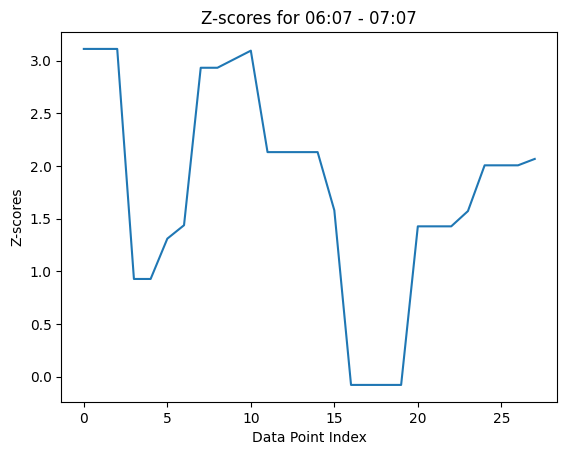

Standard Deviation of Geometric density from mould-1:2023-10-21 07:07:00 to 2023-10-21 08:07:00:
Data Point 1: 1.6731 is 4.535 standard deviations from 1.65.
Data Point 2: 1.6731 is 4.535 standard deviations from 1.65.
Data Point 3: 1.6731 is 4.535 standard deviations from 1.65.
Data Point 4: 1.6731 is 4.535 standard deviations from 1.65.
Data Point 5: 1.6689 is 3.694 standard deviations from 1.65.
Data Point 6: 1.6667 is 3.273 standard deviations from 1.65.
Data Point 7: 1.6667 is 3.273 standard deviations from 1.65.
Data Point 8: 1.6632 is 2.593 standard deviations from 1.65.
Data Point 9: 1.6621 is 2.366 standard deviations from 1.65.
Data Point 10: 1.6621 is 2.366 standard deviations from 1.65.
Data Point 11: 1.6621 is 2.366 standard deviations from 1.65.
Data Point 12: 1.6572 is 1.402 standard deviations from 1.65.
Data Point 13: 1.6572 is 1.402 standard deviations from 1.65.
Data Point 14: 1.6572 is 1.402 standard deviations from 1.65.
Data Point 15: 1.6571 is 1.390 standard devi

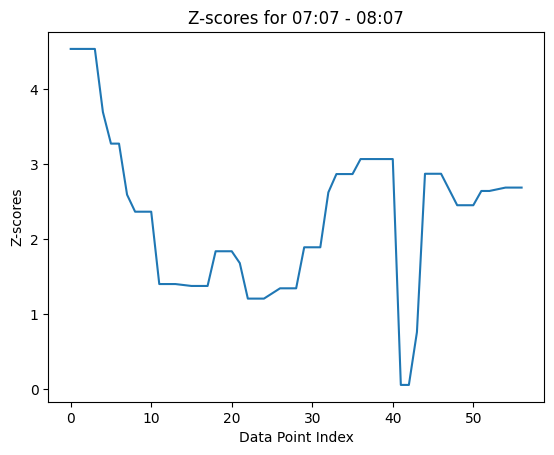

Standard Deviation of Geometric density from mould-1:2023-10-21 08:07:00 to 2023-10-21 09:07:00:
Data Point 1: 1.6598 is 1.730 standard deviations from 1.65.
Data Point 2: 1.6645 is 2.565 standard deviations from 1.65.
Data Point 3: 1.6645 is 2.565 standard deviations from 1.65.
Data Point 4: 1.6645 is 2.565 standard deviations from 1.65.
Data Point 5: 1.6616 is 2.045 standard deviations from 1.65.
Data Point 6: 1.6607 is 1.898 standard deviations from 1.65.
Data Point 7: 1.6607 is 1.898 standard deviations from 1.65.
Data Point 8: 1.6704 is 3.600 standard deviations from 1.65.
Data Point 9: 1.6800 is 5.302 standard deviations from 1.65.
Data Point 10: 1.6773 is 4.832 standard deviations from 1.65.
Data Point 11: 1.6746 is 4.361 standard deviations from 1.65.
Data Point 12: 1.6746 is 4.361 standard deviations from 1.65.
Data Point 13: 1.6746 is 4.361 standard deviations from 1.65.
Data Point 14: 1.6746 is 4.361 standard deviations from 1.65.
Data Point 15: 1.6753 is 4.476 standard devi

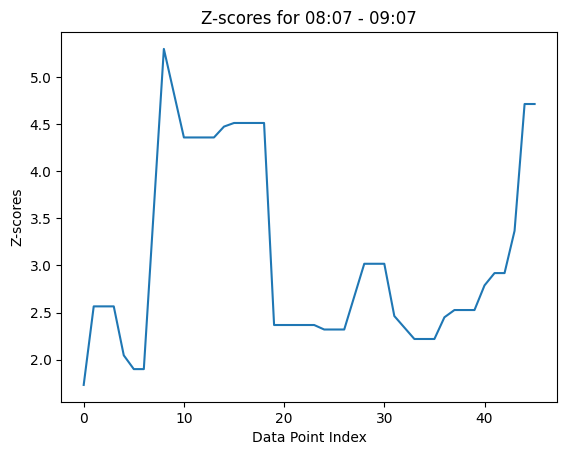

Standard Deviation of Geometric density from mould-1:2023-10-21 09:07:00 to 2023-10-21 10:07:00:
Data Point 1: 1.6767 is 4.062 standard deviations from 1.65.
Data Point 2: 1.6766 is 4.056 standard deviations from 1.65.
Data Point 3: 1.6766 is 4.050 standard deviations from 1.65.
Data Point 4: 1.6766 is 4.050 standard deviations from 1.65.
Data Point 5: 1.6766 is 4.050 standard deviations from 1.65.
Data Point 6: 1.6768 is 4.082 standard deviations from 1.65.
Data Point 7: 1.6770 is 4.114 standard deviations from 1.65.
Data Point 8: 1.6770 is 4.114 standard deviations from 1.65.
Data Point 9: 1.6721 is 3.373 standard deviations from 1.65.
Data Point 10: 1.6673 is 2.633 standard deviations from 1.65.
Data Point 11: 1.6673 is 2.633 standard deviations from 1.65.
Data Point 12: 1.6673 is 2.633 standard deviations from 1.65.
Data Point 13: 1.6643 is 2.183 standard deviations from 1.65.
Data Point 14: 1.6614 is 1.734 standard deviations from 1.65.
Data Point 15: 1.6614 is 1.734 standard devi

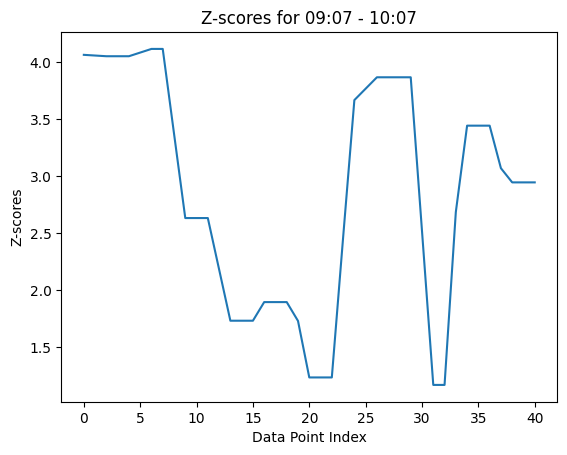

Standard Deviation of Geometric density from mould-1:2023-10-21 10:07:00 to 2023-10-21 11:07:00:
Data Point 1: 1.6689 is 2.685 standard deviations from 1.65.
Data Point 2: 1.6685 is 2.630 standard deviations from 1.65.
Data Point 3: 1.6685 is 2.630 standard deviations from 1.65.
Data Point 4: 1.6685 is 2.630 standard deviations from 1.65.
Data Point 5: 1.6685 is 2.630 standard deviations from 1.65.
Data Point 6: 1.6688 is 2.666 standard deviations from 1.65.
Data Point 7: 1.6690 is 2.701 standard deviations from 1.65.
Data Point 8: 1.6690 is 2.701 standard deviations from 1.65.
Data Point 9: 1.6497 is -0.037 standard deviations from 1.65.
Data Point 10: 1.6497 is -0.037 standard deviations from 1.65.
Data Point 11: 1.6497 is -0.037 standard deviations from 1.65.
Data Point 12: 1.6497 is -0.037 standard deviations from 1.65.
Data Point 13: 1.6546 is 0.657 standard deviations from 1.65.
Data Point 14: 1.6644 is 2.045 standard deviations from 1.65.
Data Point 15: 1.6644 is 2.045 standard 

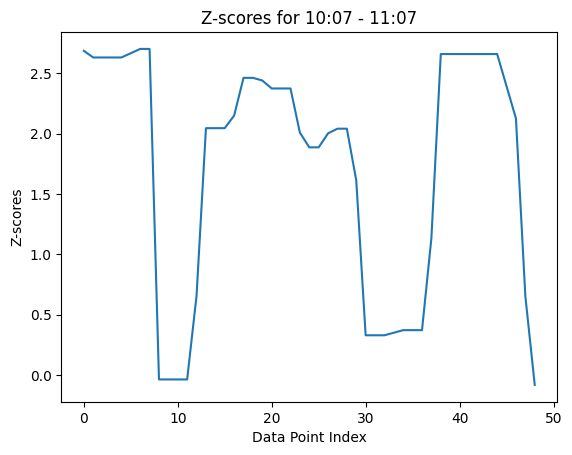

Standard Deviation of Geometric density from mould-1:2023-10-21 11:07:00 to 2023-10-21 12:07:00:
Data Point 1: 1.6494 is -0.079 standard deviations from 1.65.
Data Point 2: 1.6494 is -0.079 standard deviations from 1.65.
Data Point 3: 1.6578 is 1.060 standard deviations from 1.65.
Data Point 4: 1.6606 is 1.439 standard deviations from 1.65.
Data Point 5: 1.6606 is 1.439 standard deviations from 1.65.
Data Point 6: 1.6605 is 1.429 standard deviations from 1.65.
Data Point 7: 1.6605 is 1.419 standard deviations from 1.65.
Data Point 8: 1.6605 is 1.419 standard deviations from 1.65.
Data Point 9: 1.6530 is 0.404 standard deviations from 1.65.
Data Point 10: 1.6530 is 0.404 standard deviations from 1.65.
Data Point 11: 1.6530 is 0.404 standard deviations from 1.65.
Data Point 12: 1.6530 is 0.404 standard deviations from 1.65.
Data Point 13: 1.6530 is 0.404 standard deviations from 1.65.
Data Point 14: 1.6571 is 0.964 standard deviations from 1.65.
Data Point 15: 1.6585 is 1.150 standard de

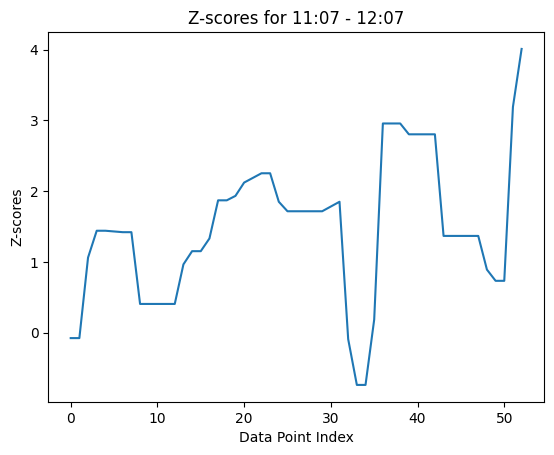

Standard Deviation of Geometric density from mould-1:2023-10-21 12:07:00 to 2023-10-21 13:07:00:
Data Point 1: 1.6796 is 4.002 standard deviations from 1.65.
Data Point 2: 1.6796 is 4.002 standard deviations from 1.65.
Data Point 3: 1.6760 is 3.516 standard deviations from 1.65.
Data Point 4: 1.6724 is 3.030 standard deviations from 1.65.
Data Point 5: 1.6724 is 3.030 standard deviations from 1.65.
Data Point 6: 1.6724 is 3.030 standard deviations from 1.65.
Data Point 7: 1.6724 is 3.030 standard deviations from 1.65.
Data Point 8: 1.6724 is 3.030 standard deviations from 1.65.
Data Point 9: 1.6673 is 2.336 standard deviations from 1.65.
Data Point 10: 1.6656 is 2.105 standard deviations from 1.65.
Data Point 11: 1.6611 is 1.501 standard deviations from 1.65.
Data Point 12: 1.6611 is 1.501 standard deviations from 1.65.
Data Point 13: 1.6611 is 1.501 standard deviations from 1.65.
Data Point 14: 1.6611 is 1.501 standard deviations from 1.65.
Data Point 15: 1.6611 is 1.501 standard devi

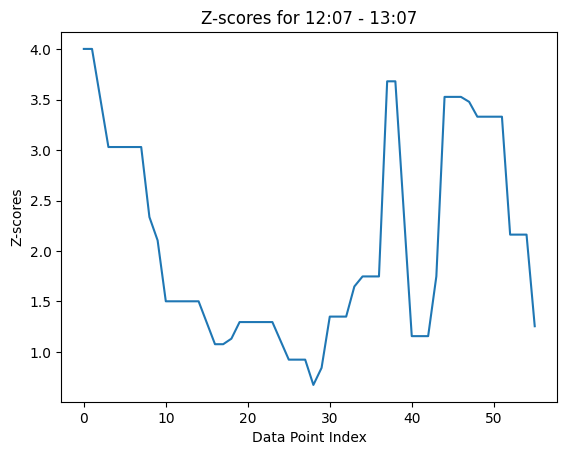

Standard Deviation of Geometric density from mould-1:2023-10-21 13:07:00 to 2023-10-21 14:07:00:
Data Point 1: 1.6526 is 1.385 standard deviations from 1.65.
Data Point 2: 1.6526 is 1.385 standard deviations from 1.65.
Data Point 3: 1.6526 is 1.385 standard deviations from 1.65.
Data Point 4: 1.6564 is 3.475 standard deviations from 1.65.
Data Point 5: 1.6577 is 4.171 standard deviations from 1.65.
Data Point 6: 1.6577 is 4.171 standard deviations from 1.65.
Data Point 7: 1.6577 is 4.171 standard deviations from 1.65.
Data Point 8: 1.6577 is 4.171 standard deviations from 1.65.
Data Point 9: 1.6577 is 4.171 standard deviations from 1.65.
Data Point 10: 1.6577 is 4.171 standard deviations from 1.65.
Data Point 11: 1.6563 is 3.435 standard deviations from 1.65.
Data Point 12: 1.6563 is 3.435 standard deviations from 1.65.
Data Point 13: 1.6563 is 3.435 standard deviations from 1.65.
Data Point 14: 1.6563 is 3.435 standard deviations from 1.65.
Data Point 15: 1.6563 is 3.435 standard devi

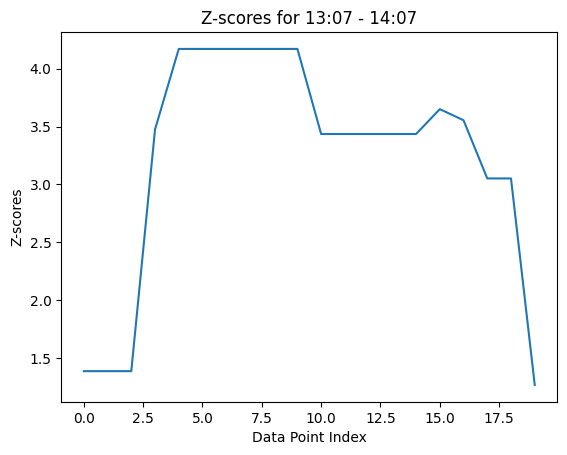

Standard Deviation of Geometric density from mould-1:2023-10-21 14:07:00 to 2023-10-21 15:07:00:
Data Point 1: 1.6378 is -1.120 standard deviations from 1.65.
Data Point 2: 1.6381 is -1.094 standard deviations from 1.65.
Data Point 3: 1.6389 is -1.016 standard deviations from 1.65.
Data Point 4: 1.6389 is -1.016 standard deviations from 1.65.
Data Point 5: 1.6389 is -1.016 standard deviations from 1.65.
Data Point 6: 1.6389 is -1.016 standard deviations from 1.65.
Data Point 7: 1.6426 is -0.676 standard deviations from 1.65.
Data Point 8: 1.6426 is -0.676 standard deviations from 1.65.
Data Point 9: 1.6426 is -0.676 standard deviations from 1.65.
Data Point 10: 1.6426 is -0.676 standard deviations from 1.65.
Data Point 11: 1.6442 is -0.529 standard deviations from 1.65.
Data Point 12: 1.6474 is -0.235 standard deviations from 1.65.
Data Point 13: 1.6474 is -0.235 standard deviations from 1.65.
Data Point 14: 1.6474 is -0.235 standard deviations from 1.65.
Data Point 15: 1.6549 is 0.445

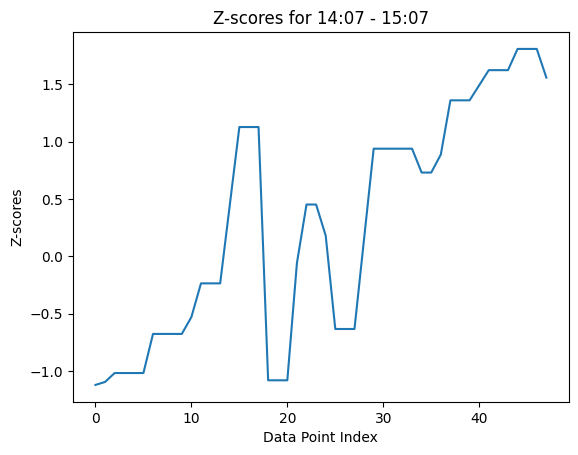

Standard Deviation of Geometric density from mould-1:2023-10-21 15:07:00 to 2023-10-21 16:07:00:
Data Point 1: 1.6643 is inf standard deviations from 1.65.
Data Point 2: 1.6643 is inf standard deviations from 1.65.


c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


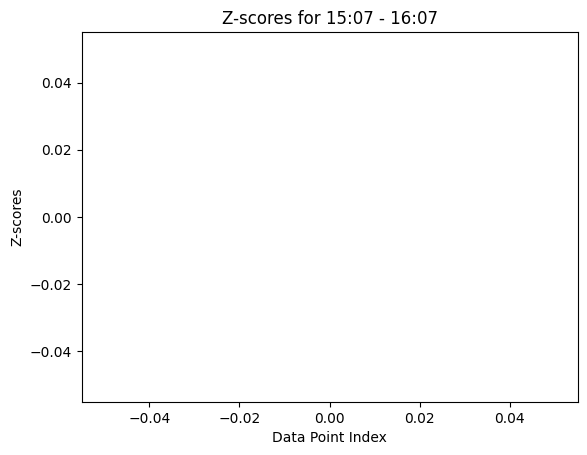

Standard Deviation of Geometric density from mould-1:2023-10-21 16:07:00 to 2023-10-21 17:07:00:
Data Point 1: 1.6783 is 1.528 standard deviations from 1.65.
Data Point 2: 1.6783 is 1.528 standard deviations from 1.65.
Data Point 3: 1.6355 is -0.781 standard deviations from 1.65.
Data Point 4: 1.6355 is -0.781 standard deviations from 1.65.
Data Point 5: 1.6355 is -0.781 standard deviations from 1.65.
Data Point 6: 1.6355 is -0.781 standard deviations from 1.65.
Data Point 7: 1.6355 is -0.781 standard deviations from 1.65.
Data Point 8: 1.6355 is -0.781 standard deviations from 1.65.


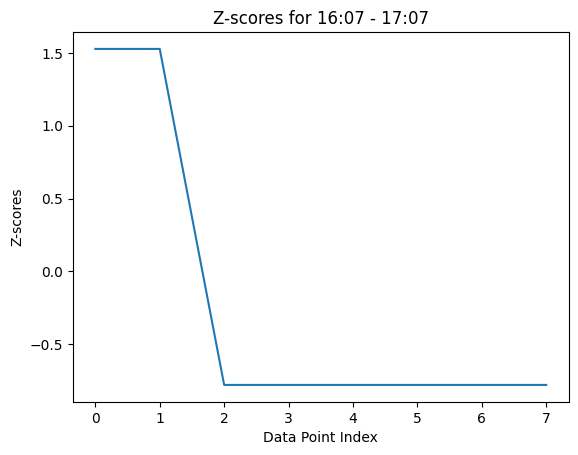

Standard Deviation of Geometric density from mould-1:2023-10-21 17:07:00 to 2023-10-21 18:07:00:
Data Point 1: 1.6355 is -1.114 standard deviations from 1.65.
Data Point 2: 1.6355 is -1.114 standard deviations from 1.65.
Data Point 3: 1.6355 is -1.114 standard deviations from 1.65.
Data Point 4: 1.6355 is -1.114 standard deviations from 1.65.
Data Point 5: 1.6355 is -1.114 standard deviations from 1.65.
Data Point 6: 1.6355 is -1.114 standard deviations from 1.65.
Data Point 7: 1.6355 is -1.114 standard deviations from 1.65.
Data Point 8: 1.6355 is -1.114 standard deviations from 1.65.
Data Point 9: 1.6355 is -1.114 standard deviations from 1.65.
Data Point 10: 1.6355 is -1.114 standard deviations from 1.65.
Data Point 11: 1.6355 is -1.114 standard deviations from 1.65.
Data Point 12: 1.6355 is -1.114 standard deviations from 1.65.
Data Point 13: 1.6355 is -1.114 standard deviations from 1.65.
Data Point 14: 1.6355 is -1.114 standard deviations from 1.65.
Data Point 15: 1.6355 is -1.11

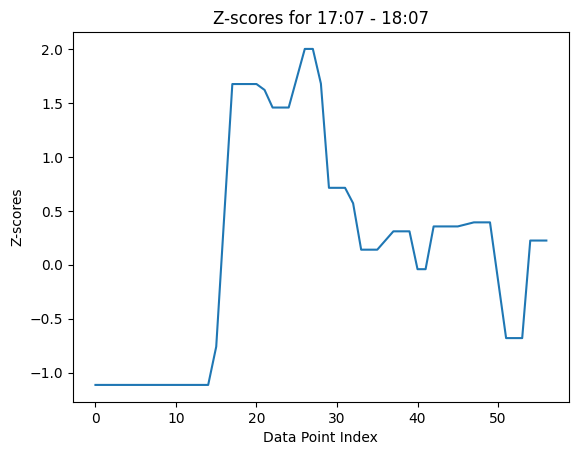

Standard Deviation of Geometric density from mould-1:2023-10-21 18:07:00 to 2023-10-21 19:07:00:
Data Point 1: 1.6495 is -0.079 standard deviations from 1.65.
Data Point 2: 1.6427 is -1.157 standard deviations from 1.65.
Data Point 3: 1.6427 is -1.157 standard deviations from 1.65.
Data Point 4: 1.6427 is -1.157 standard deviations from 1.65.
Data Point 5: 1.6445 is -0.873 standard deviations from 1.65.
Data Point 6: 1.6451 is -0.779 standard deviations from 1.65.
Data Point 7: 1.6451 is -0.779 standard deviations from 1.65.
Data Point 8: 1.6451 is -0.779 standard deviations from 1.65.
Data Point 9: 1.6493 is -0.115 standard deviations from 1.65.
Data Point 10: 1.6493 is -0.115 standard deviations from 1.65.
Data Point 11: 1.6493 is -0.115 standard deviations from 1.65.
Data Point 12: 1.6502 is 0.028 standard deviations from 1.65.
Data Point 13: 1.6520 is 0.315 standard deviations from 1.65.
Data Point 14: 1.6520 is 0.315 standard deviations from 1.65.
Data Point 15: 1.6520 is 0.315 st

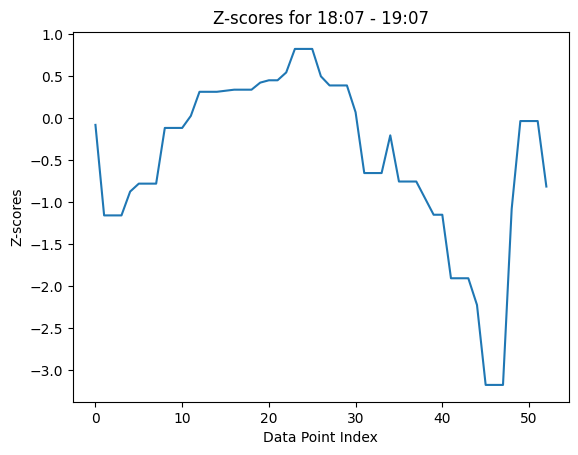

Standard Deviation of Geometric density from mould-1:2023-10-21 19:07:00 to 2023-10-21 20:07:00:
Data Point 1: 1.6399 is -1.713 standard deviations from 1.65.
Data Point 2: 1.6399 is -1.713 standard deviations from 1.65.
Data Point 3: 1.6399 is -1.713 standard deviations from 1.65.
Data Point 4: 1.6462 is -0.649 standard deviations from 1.65.
Data Point 5: 1.6483 is -0.295 standard deviations from 1.65.
Data Point 6: 1.6483 is -0.295 standard deviations from 1.65.
Data Point 7: 1.6475 is -0.419 standard deviations from 1.65.
Data Point 8: 1.6453 is -0.791 standard deviations from 1.65.
Data Point 9: 1.6453 is -0.791 standard deviations from 1.65.
Data Point 10: 1.6453 is -0.805 standard deviations from 1.65.
Data Point 11: 1.6452 is -0.812 standard deviations from 1.65.
Data Point 12: 1.6452 is -0.812 standard deviations from 1.65.
Data Point 13: 1.6451 is -0.823 standard deviations from 1.65.
Data Point 14: 1.6451 is -0.827 standard deviations from 1.65.
Data Point 15: 1.6451 is -0.82

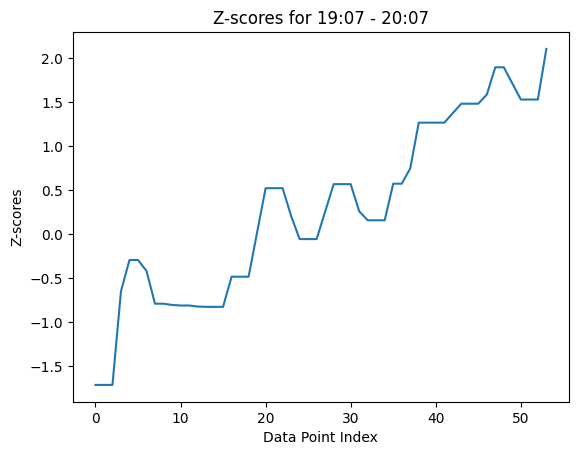

Standard Deviation of Geometric density from mould-1:2023-10-21 20:07:00 to 2023-10-21 21:07:00:
Data Point 1: 1.6624 is 3.058 standard deviations from 1.65.
Data Point 2: 1.6624 is 3.058 standard deviations from 1.65.
Data Point 3: 1.6621 is 2.981 standard deviations from 1.65.
Data Point 4: 1.6612 is 2.752 standard deviations from 1.65.
Data Point 5: 1.6612 is 2.752 standard deviations from 1.65.
Data Point 6: 1.6612 is 2.752 standard deviations from 1.65.
Data Point 7: 1.6634 is 3.306 standard deviations from 1.65.
Data Point 8: 1.6657 is 3.859 standard deviations from 1.65.
Data Point 9: 1.6657 is 3.859 standard deviations from 1.65.
Data Point 10: 1.6657 is 3.859 standard deviations from 1.65.
Data Point 11: 1.6669 is 4.175 standard deviations from 1.65.
Data Point 12: 1.6674 is 4.281 standard deviations from 1.65.
Data Point 13: 1.6674 is 4.281 standard deviations from 1.65.
Data Point 14: 1.6674 is 4.281 standard deviations from 1.65.
Data Point 15: 1.6612 is 2.762 standard devi

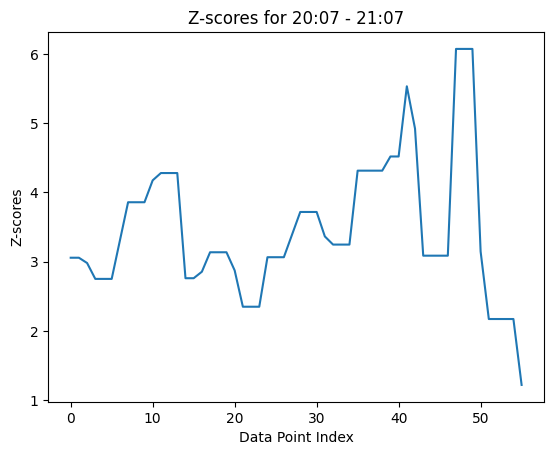

Standard Deviation of Geometric density from mould-1:2023-10-21 21:07:00 to 2023-10-21 22:07:00:
Data Point 1: 1.6549 is 0.404 standard deviations from 1.65.
Data Point 2: 1.6550 is 0.404 standard deviations from 1.65.
Data Point 3: 1.6325 is -1.428 standard deviations from 1.65.
Data Point 4: 1.6250 is -2.039 standard deviations from 1.65.
Data Point 5: 1.6250 is -2.039 standard deviations from 1.65.
Data Point 6: 1.6250 is -2.039 standard deviations from 1.65.
Data Point 7: 1.6250 is -2.039 standard deviations from 1.65.
Data Point 8: 1.6822 is 2.628 standard deviations from 1.65.
Data Point 9: 1.6654 is 1.252 standard deviations from 1.65.
Data Point 10: 1.6654 is 1.252 standard deviations from 1.65.
Data Point 11: 1.6654 is 1.252 standard deviations from 1.65.
Data Point 12: 1.6666 is 1.356 standard deviations from 1.65.
Data Point 13: 1.6666 is 1.356 standard deviations from 1.65.
Data Point 14: 1.6666 is 1.356 standard deviations from 1.65.
Data Point 15: 1.6668 is 1.368 standard

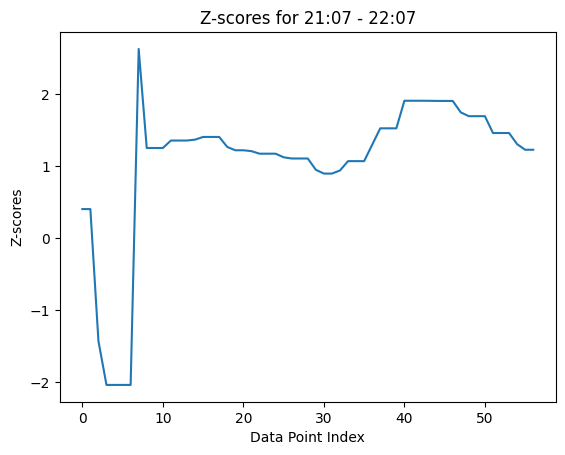

Standard Deviation of Geometric density from mould-1:2023-10-21 22:07:00 to 2023-10-21 23:07:00:
Data Point 1: 1.6663 is 4.132 standard deviations from 1.65.
Data Point 2: 1.6663 is 4.132 standard deviations from 1.65.
Data Point 3: 1.6663 is 4.132 standard deviations from 1.65.
Data Point 4: 1.6664 is 4.148 standard deviations from 1.65.
Data Point 5: 1.6664 is 4.165 standard deviations from 1.65.
Data Point 6: 1.6664 is 4.165 standard deviations from 1.65.
Data Point 7: 1.6700 is 5.058 standard deviations from 1.65.
Data Point 8: 1.6711 is 5.356 standard deviations from 1.65.
Data Point 9: 1.6711 is 5.356 standard deviations from 1.65.
Data Point 10: 1.6711 is 5.356 standard deviations from 1.65.
Data Point 11: 1.6724 is 5.680 standard deviations from 1.65.
Data Point 12: 1.6724 is 5.680 standard deviations from 1.65.
Data Point 13: 1.6724 is 5.680 standard deviations from 1.65.
Data Point 14: 1.6724 is 5.674 standard deviations from 1.65.
Data Point 15: 1.6723 is 5.655 standard devi

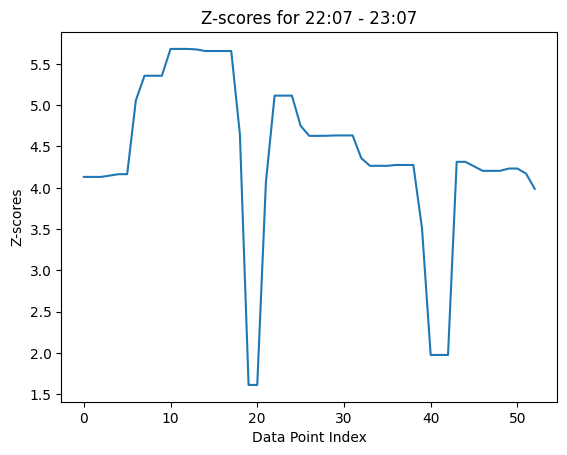

Standard Deviation of Geometric density from mould-1:2023-10-21 23:07:00 to 2023-10-22 00:07:00:
Data Point 1: 1.6657 is 5.239 standard deviations from 1.65.
Data Point 2: 1.6657 is 5.239 standard deviations from 1.65.
Data Point 3: 1.6651 is 5.040 standard deviations from 1.65.
Data Point 4: 1.6649 is 4.973 standard deviations from 1.65.
Data Point 5: 1.6649 is 4.973 standard deviations from 1.65.
Data Point 6: 1.6647 is 4.887 standard deviations from 1.65.
Data Point 7: 1.6639 is 4.630 standard deviations from 1.65.
Data Point 8: 1.6639 is 4.630 standard deviations from 1.65.
Data Point 9: 1.6639 is 4.630 standard deviations from 1.65.
Data Point 10: 1.6636 is 4.545 standard deviations from 1.65.
Data Point 11: 1.6629 is 4.290 standard deviations from 1.65.
Data Point 12: 1.6629 is 4.290 standard deviations from 1.65.
Data Point 13: 1.6608 is 3.586 standard deviations from 1.65.
Data Point 14: 1.6601 is 3.351 standard deviations from 1.65.
Data Point 15: 1.6601 is 3.351 standard devi

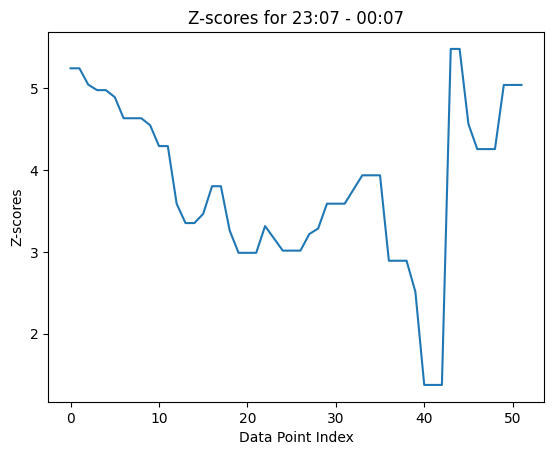

Standard Deviation of Geometric density from mould-1:2023-10-22 00:07:00 to 2023-10-22 01:07:00:
Data Point 1: 1.6651 is 5.770 standard deviations from 1.65.
Data Point 2: 1.6650 is 5.745 standard deviations from 1.65.
Data Point 3: 1.6650 is 5.745 standard deviations from 1.65.
Data Point 4: 1.6650 is 5.745 standard deviations from 1.65.
Data Point 5: 1.6657 is 5.990 standard deviations from 1.65.
Data Point 6: 1.6663 is 6.234 standard deviations from 1.65.
Data Point 7: 1.6663 is 6.234 standard deviations from 1.65.
Data Point 8: 1.6652 is 5.817 standard deviations from 1.65.
Data Point 9: 1.6632 is 5.045 standard deviations from 1.65.
Data Point 10: 1.6612 is 4.272 standard deviations from 1.65.
Data Point 11: 1.6612 is 4.272 standard deviations from 1.65.
Data Point 12: 1.6612 is 4.272 standard deviations from 1.65.
Data Point 13: 1.6626 is 4.823 standard deviations from 1.65.
Data Point 14: 1.6655 is 5.924 standard deviations from 1.65.
Data Point 15: 1.6655 is 5.924 standard devi

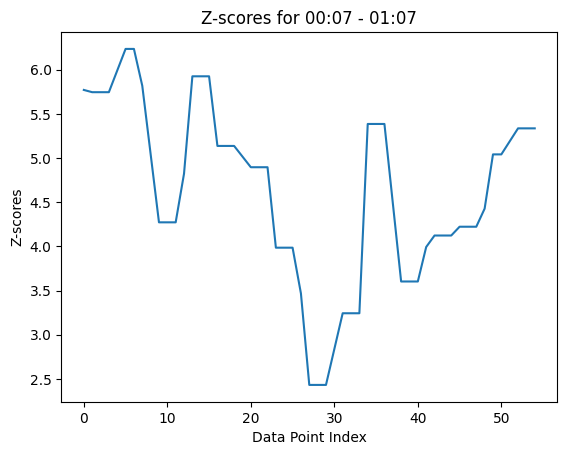

Standard Deviation of Geometric density from mould-1:2023-10-22 01:07:00 to 2023-10-22 02:07:00:
Data Point 1: 1.6623 is 2.077 standard deviations from 1.65.
Data Point 2: 1.6623 is 2.077 standard deviations from 1.65.
Data Point 3: 1.6642 is 2.391 standard deviations from 1.65.
Data Point 4: 1.6642 is 2.391 standard deviations from 1.65.
Data Point 5: 1.6642 is 2.391 standard deviations from 1.65.
Data Point 6: 1.6639 is 2.343 standard deviations from 1.65.
Data Point 7: 1.6638 is 2.327 standard deviations from 1.65.
Data Point 8: 1.6638 is 2.327 standard deviations from 1.65.
Data Point 9: 1.6638 is 2.327 standard deviations from 1.65.
Data Point 10: 1.6615 is 1.944 standard deviations from 1.65.
Data Point 11: 1.6615 is 1.944 standard deviations from 1.65.
Data Point 12: 1.6615 is 1.944 standard deviations from 1.65.
Data Point 13: 1.6615 is 1.944 standard deviations from 1.65.
Data Point 14: 1.6707 is 3.498 standard deviations from 1.65.
Data Point 15: 1.6707 is 3.498 standard devi

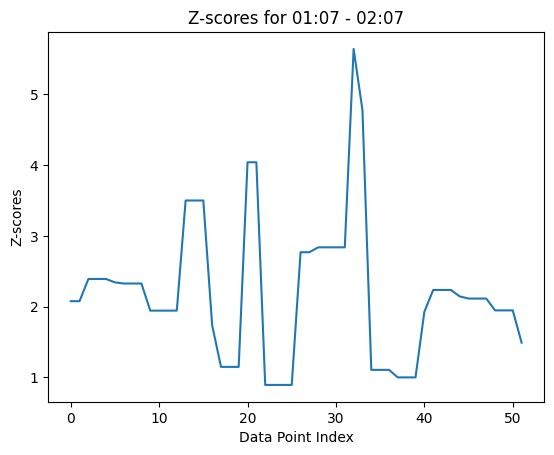

Standard Deviation of Geometric density from mould-1:2023-10-22 02:07:00 to 2023-10-22 03:07:00:
Data Point 1: 1.6562 is 1.358 standard deviations from 1.65.
Data Point 2: 1.6562 is 1.358 standard deviations from 1.65.
Data Point 3: 1.6562 is 1.358 standard deviations from 1.65.
Data Point 4: 1.6529 is 0.649 standard deviations from 1.65.
Data Point 5: 1.6529 is 0.649 standard deviations from 1.65.
Data Point 6: 1.6529 is 0.649 standard deviations from 1.65.
Data Point 7: 1.6529 is 0.649 standard deviations from 1.65.
Data Point 8: 1.6607 is 2.366 standard deviations from 1.65.
Data Point 9: 1.6633 is 2.938 standard deviations from 1.65.
Data Point 10: 1.6633 is 2.938 standard deviations from 1.65.
Data Point 11: 1.6633 is 2.938 standard deviations from 1.65.
Data Point 12: 1.6623 is 2.726 standard deviations from 1.65.
Data Point 13: 1.6623 is 2.726 standard deviations from 1.65.
Data Point 14: 1.6512 is 0.274 standard deviations from 1.65.
Data Point 15: 1.6475 is -0.543 standard dev

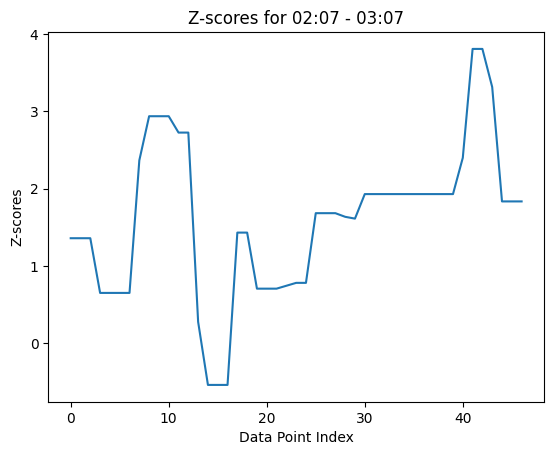

Standard Deviation of Geometric density from mould-1:2023-10-22 03:07:00 to 2023-10-22 04:07:00:
Data Point 1: 1.6603 is 1.746 standard deviations from 1.65.
Data Point 2: 1.6610 is 1.859 standard deviations from 1.65.
Data Point 3: 1.6610 is 1.859 standard deviations from 1.65.
Data Point 4: 1.6610 is 1.859 standard deviations from 1.65.
Data Point 5: 1.6503 is 0.051 standard deviations from 1.65.
Data Point 6: 1.6503 is 0.051 standard deviations from 1.65.
Data Point 7: 1.6503 is 0.051 standard deviations from 1.65.
Data Point 8: 1.6489 is -0.188 standard deviations from 1.65.
Data Point 9: 1.6461 is -0.665 standard deviations from 1.65.
Data Point 10: 1.6461 is -0.665 standard deviations from 1.65.
Data Point 11: 1.6526 is 0.433 standard deviations from 1.65.
Data Point 12: 1.6590 is 1.531 standard deviations from 1.65.
Data Point 13: 1.6590 is 1.531 standard deviations from 1.65.
Data Point 14: 1.6590 is 1.531 standard deviations from 1.65.
Data Point 15: 1.6570 is 1.182 standard d

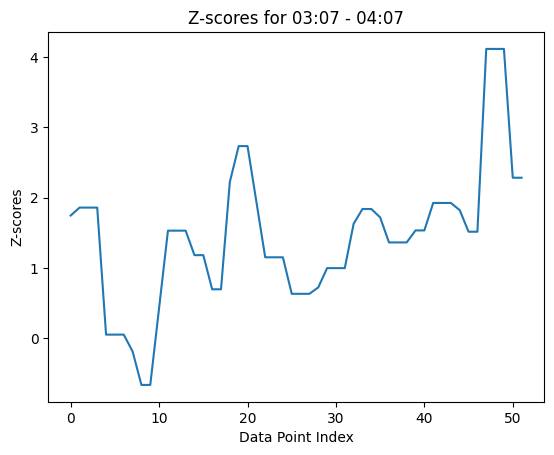

Standard Deviation of Geometric density from mould-1:2023-10-22 04:07:00 to 2023-10-22 05:07:00:
Data Point 1: 1.6625 is 4.157 standard deviations from 1.65.
Data Point 2: 1.6625 is 4.157 standard deviations from 1.65.
Data Point 3: 1.6623 is 4.077 standard deviations from 1.65.
Data Point 4: 1.6623 is 4.077 standard deviations from 1.65.
Data Point 5: 1.6623 is 4.077 standard deviations from 1.65.
Data Point 6: 1.6621 is 4.000 standard deviations from 1.65.
Data Point 7: 1.6616 is 3.845 standard deviations from 1.65.
Data Point 8: 1.6616 is 3.845 standard deviations from 1.65.
Data Point 9: 1.6616 is 3.845 standard deviations from 1.65.
Data Point 10: 1.6643 is 4.743 standard deviations from 1.65.
Data Point 11: 1.6652 is 5.043 standard deviations from 1.65.
Data Point 12: 1.6652 is 5.043 standard deviations from 1.65.
Data Point 13: 1.6638 is 4.563 standard deviations from 1.65.
Data Point 14: 1.6594 is 3.125 standard deviations from 1.65.
Data Point 15: 1.6594 is 3.125 standard devi

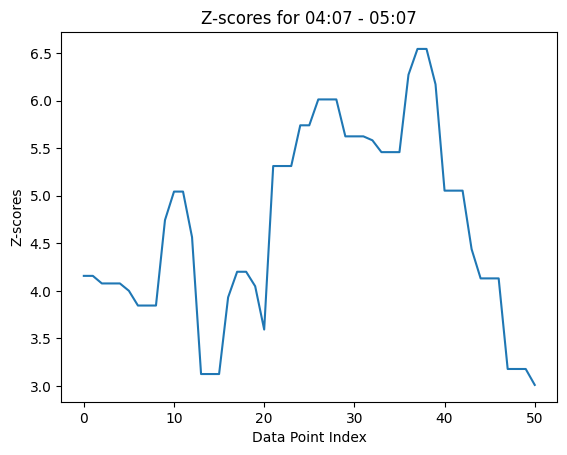

Standard Deviation of Geometric density from mould-1:2023-10-22 05:07:00 to 2023-10-22 06:07:00:
Data Point 1: 1.6573 is inf standard deviations from 1.65.


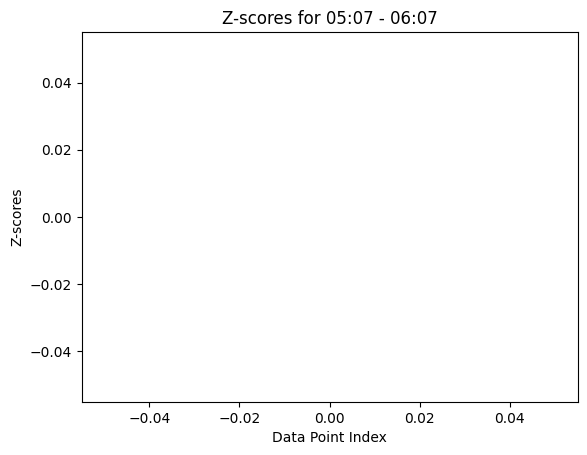

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]

    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')

    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]

    specific_number = 1.65
    data = data_subset.values

    z_scores = (data - specific_number) / np.std(data)

    fig, ax = plt.subplots()
    ax.plot(z_scores)
    
    for k, value in enumerate(data):
        if len(z_scores) > 0:
            print(f'Data Point {k+1}: {value:.4f} is {z_scores[k]:.3f} standard deviations from {specific_number}.')

    ax.set_xlabel('Data Point Index')
    ax.set_ylabel('Z-scores')
    ax.set_title(f'Z-scores for {start_time.strftime("%H:%M")} - {end_time.strftime("%H:%M")}')
    
    plt.show()

Standard Deviation of Geometric density from mould-1:2023-10-21 05:07:00 to 2023-10-21 06:07:00:


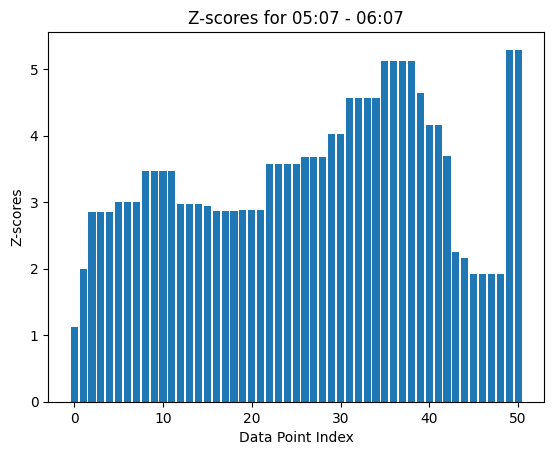

Standard Deviation of Geometric density from mould-1:2023-10-21 06:07:00 to 2023-10-21 07:07:00:


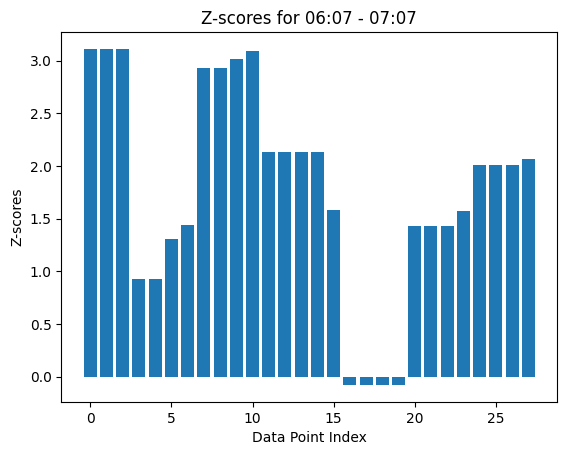

Standard Deviation of Geometric density from mould-1:2023-10-21 07:07:00 to 2023-10-21 08:07:00:


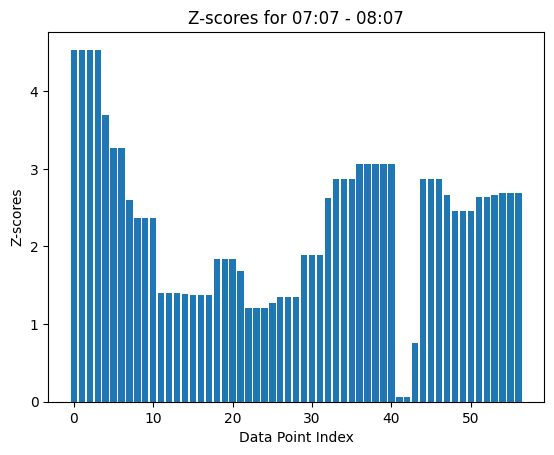

Standard Deviation of Geometric density from mould-1:2023-10-21 08:07:00 to 2023-10-21 09:07:00:


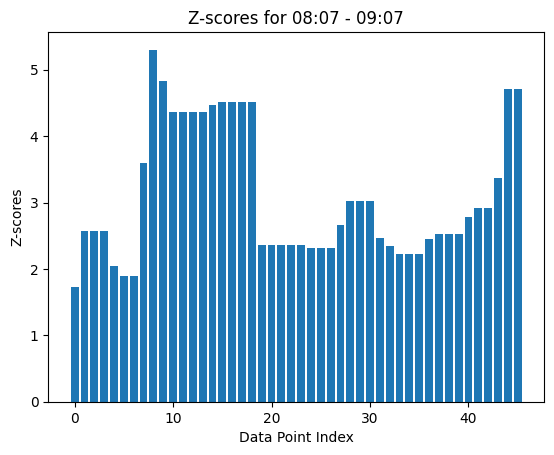

Standard Deviation of Geometric density from mould-1:2023-10-21 09:07:00 to 2023-10-21 10:07:00:


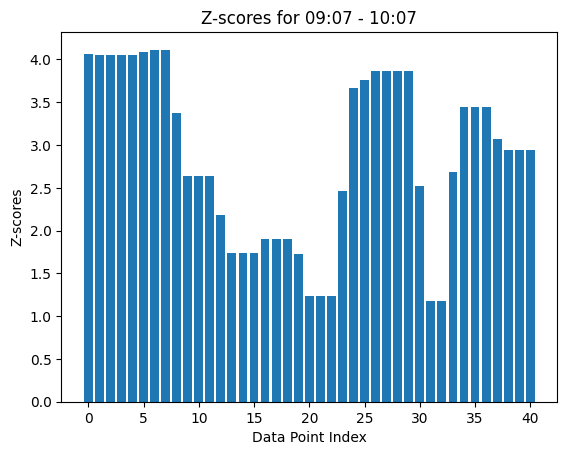

Standard Deviation of Geometric density from mould-1:2023-10-21 10:07:00 to 2023-10-21 11:07:00:


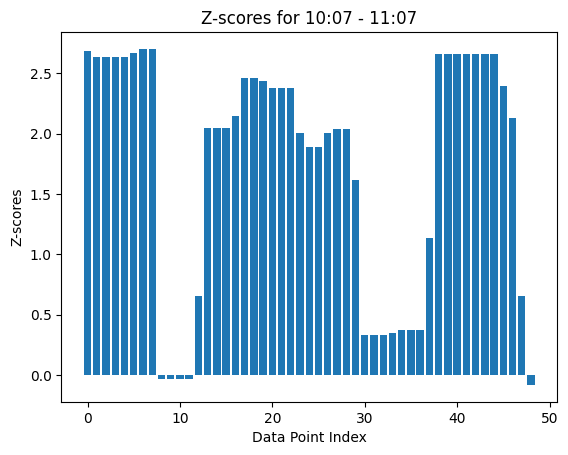

Standard Deviation of Geometric density from mould-1:2023-10-21 11:07:00 to 2023-10-21 12:07:00:


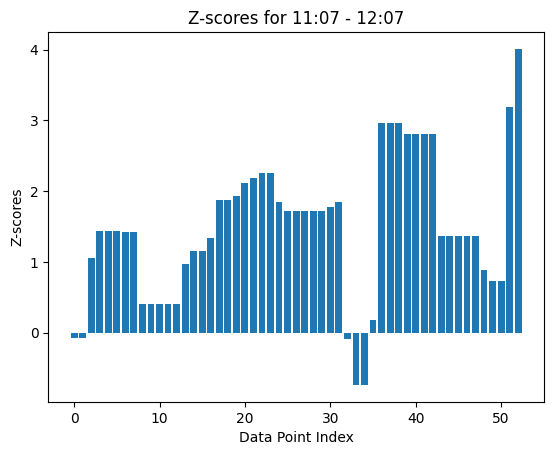

Standard Deviation of Geometric density from mould-1:2023-10-21 12:07:00 to 2023-10-21 13:07:00:


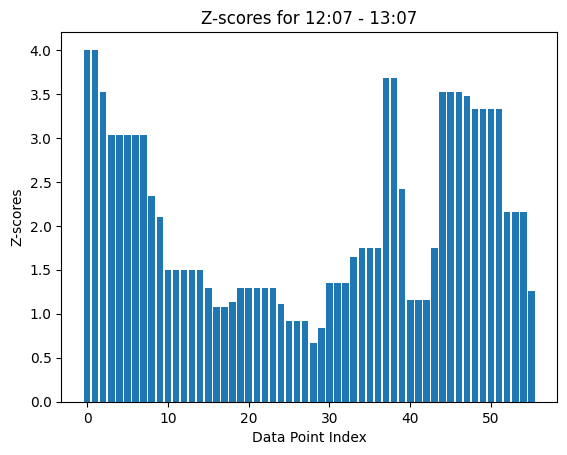

Standard Deviation of Geometric density from mould-1:2023-10-21 13:07:00 to 2023-10-21 14:07:00:


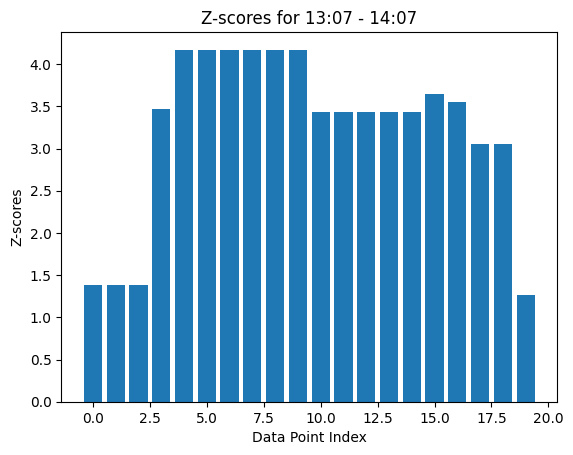

Standard Deviation of Geometric density from mould-1:2023-10-21 14:07:00 to 2023-10-21 15:07:00:


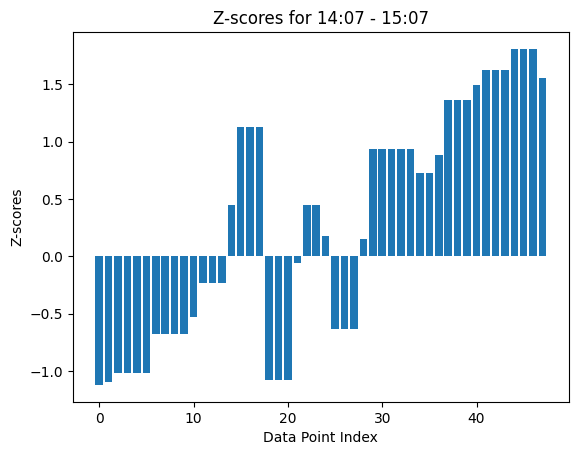

Standard Deviation of Geometric density from mould-1:2023-10-21 15:07:00 to 2023-10-21 16:07:00:


c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


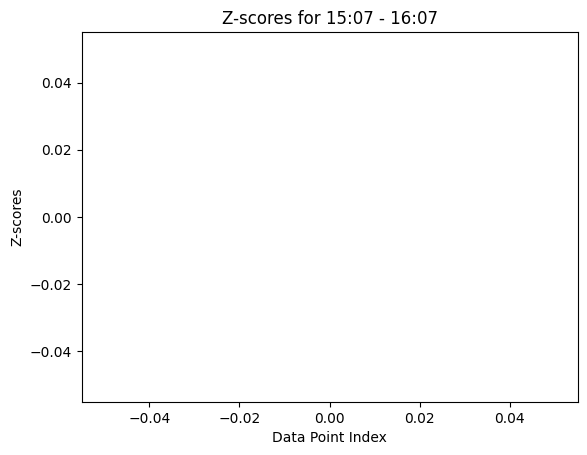

Standard Deviation of Geometric density from mould-1:2023-10-21 16:07:00 to 2023-10-21 17:07:00:


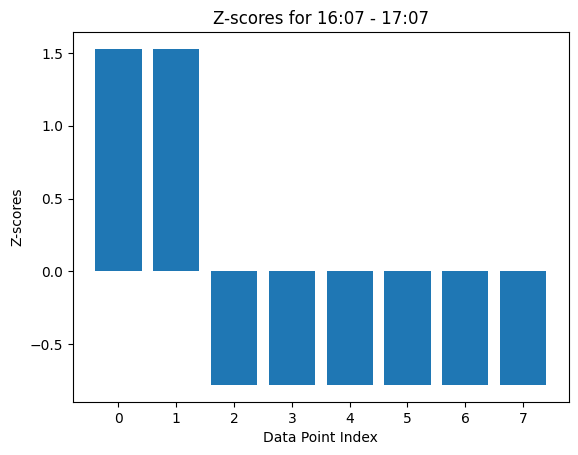

Standard Deviation of Geometric density from mould-1:2023-10-21 17:07:00 to 2023-10-21 18:07:00:


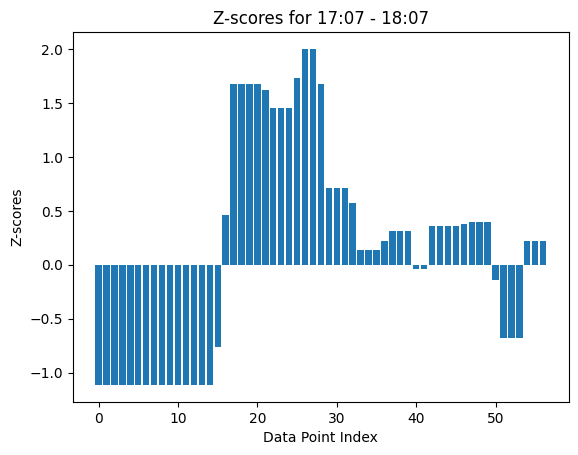

Standard Deviation of Geometric density from mould-1:2023-10-21 18:07:00 to 2023-10-21 19:07:00:


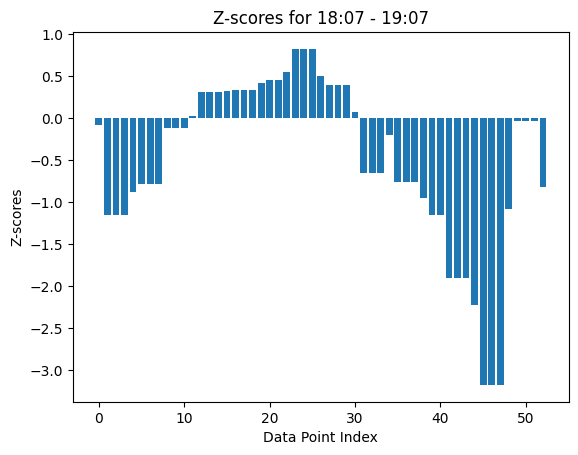

Standard Deviation of Geometric density from mould-1:2023-10-21 19:07:00 to 2023-10-21 20:07:00:


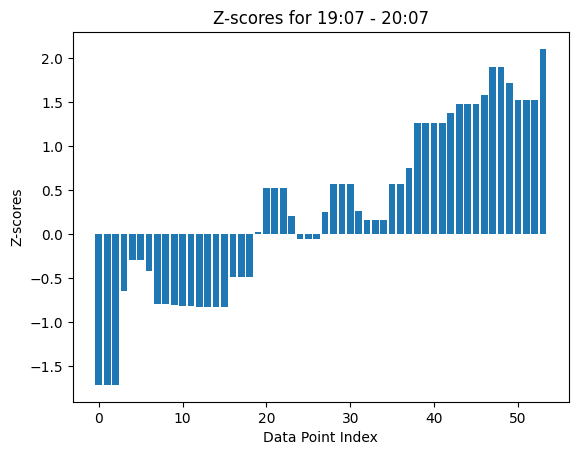

Standard Deviation of Geometric density from mould-1:2023-10-21 20:07:00 to 2023-10-21 21:07:00:


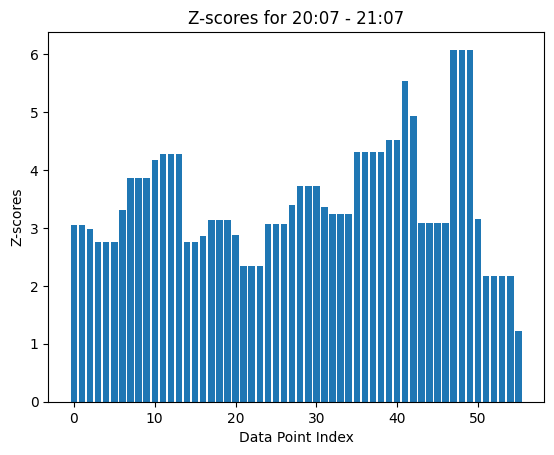

Standard Deviation of Geometric density from mould-1:2023-10-21 21:07:00 to 2023-10-21 22:07:00:


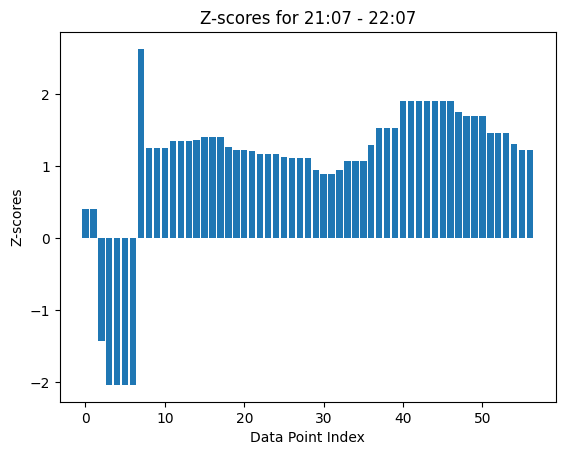

Standard Deviation of Geometric density from mould-1:2023-10-21 22:07:00 to 2023-10-21 23:07:00:


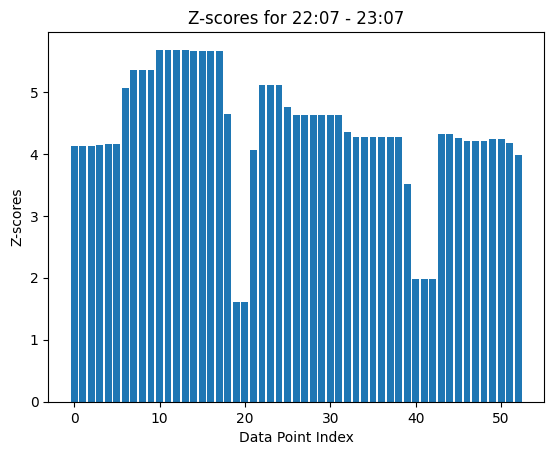

Standard Deviation of Geometric density from mould-1:2023-10-21 23:07:00 to 2023-10-22 00:07:00:


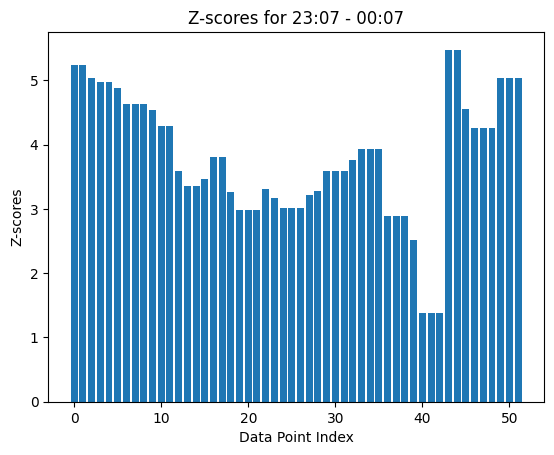

Standard Deviation of Geometric density from mould-1:2023-10-22 00:07:00 to 2023-10-22 01:07:00:


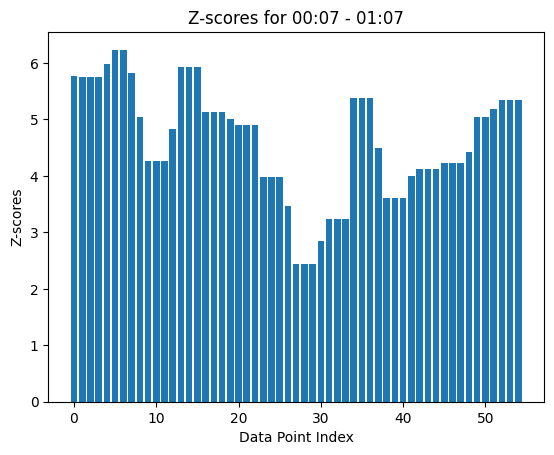

Standard Deviation of Geometric density from mould-1:2023-10-22 01:07:00 to 2023-10-22 02:07:00:


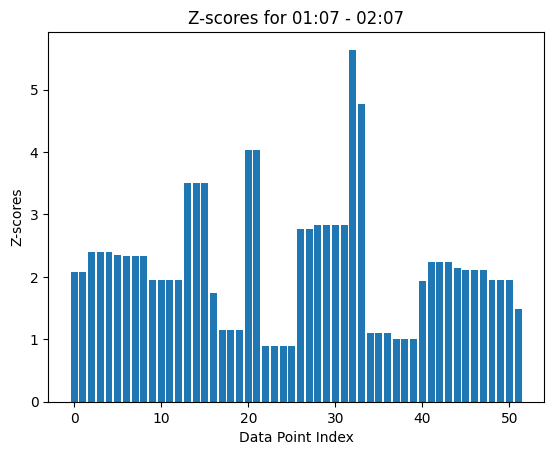

Standard Deviation of Geometric density from mould-1:2023-10-22 02:07:00 to 2023-10-22 03:07:00:


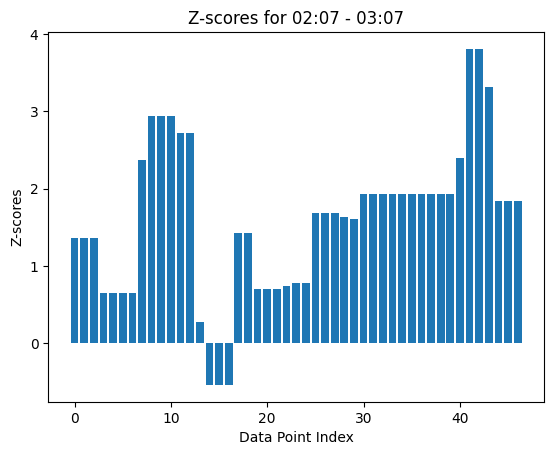

Standard Deviation of Geometric density from mould-1:2023-10-22 03:07:00 to 2023-10-22 04:07:00:


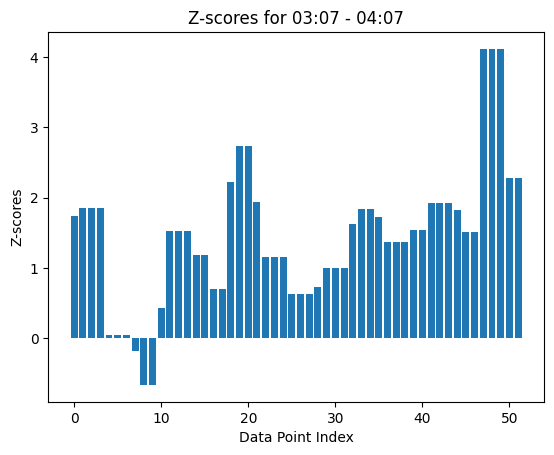

Standard Deviation of Geometric density from mould-1:2023-10-22 04:07:00 to 2023-10-22 05:07:00:


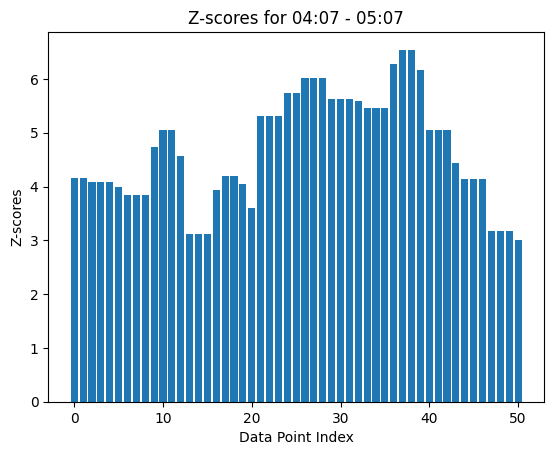

Standard Deviation of Geometric density from mould-1:2023-10-22 05:07:00 to 2023-10-22 06:07:00:


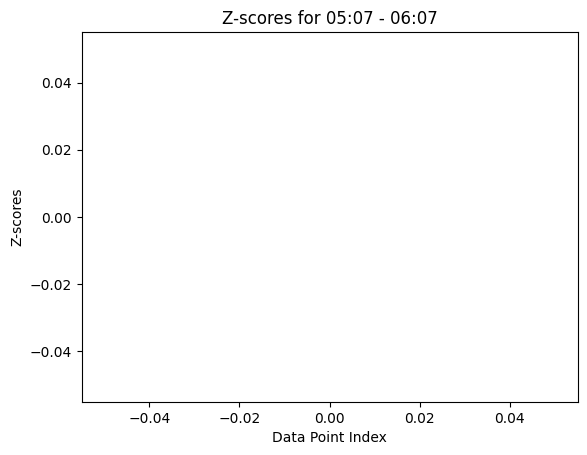

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]

    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')

    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]

    specific_number = 1.65
    data = data_subset.values

    z_scores = (data - specific_number) / np.std(data)
    
    # Create a bar plot for z-scores
    plt.bar(range(len(z_scores)), z_scores)
    
    plt.xlabel('Data Point Index')
    plt.ylabel('Z-scores')
    plt.title(f'Z-scores for {start_time.strftime("%H:%M")} - {end_time.strftime("%H:%M")}')
    plt.show()

Standard Deviation of Geometric density from mould-1:2023-10-21 05:07:00 to 2023-10-21 06:07:00:
Data Point 1: 1.6568 is 1.127 standard deviations from 1.65.
Data Point 2: 1.6620 is 1.987 standard deviations from 1.65.
Data Point 3: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 4: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 5: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 6: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 7: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 8: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 9: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 10: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 11: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 12: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 13: 1.6680 is 2.973 standard deviations from 1.65.
Data Point 14: 1.6680 is 2.973 standard deviations from 1.65.
Data Point 15: 1.6680 is 2.973 standard devi

c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


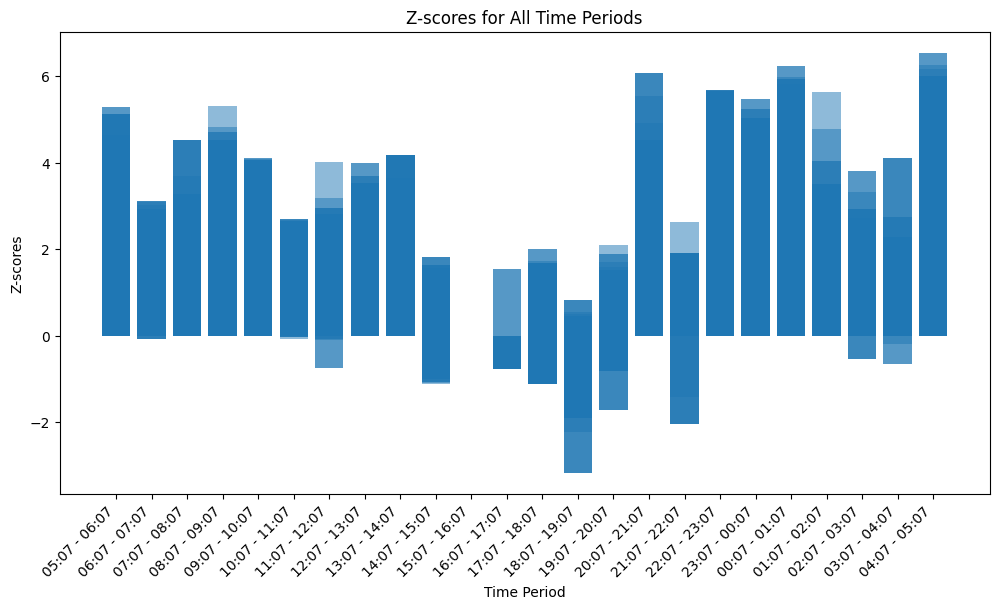

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

all_z_scores = []  # To store all z-scores for each time period
time_periods = []  # To store the corresponding time periods

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]

    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')

    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]

    specific_number = 1.65
    data = data_subset.values

    z_scores = (data - specific_number) / np.std(data)
    
    # Append z-scores for this time period
    all_z_scores.extend(z_scores)
    
    # Append the time period labels for each z-score in this period
    time_periods.extend([f'{start_time.strftime("%H:%M")} - {end_time.strftime("%H:%M")}' for _ in z_scores])

    for k, value in enumerate(data):
        if len(z_scores) > 0:
            print(f'Data Point {k+1}: {value:.4f} is {z_scores[k]:.3f} standard deviations from {specific_number}.')

    print("Data points with z_scores: ")
    print(z_scores)
    print("\n")

# Create a single bar plot for all time periods and their z-score values
plt.figure(figsize=(12, 6))
plt.bar(time_periods, all_z_scores, align='center', alpha=0.5)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Time Period')
plt.ylabel('Z-scores')
plt.title('Z-scores for All Time Periods')
plt.show()

Standard Deviation of Geometric density from mould-1:2023-10-21 05:07:00 to 2023-10-21 06:07:00:
Data Point 1: 1.6568 is 1.127 standard deviations from 1.65.
Data Point 2: 1.6620 is 1.987 standard deviations from 1.65.
Data Point 3: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 4: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 5: 1.6672 is 2.848 standard deviations from 1.65.
Data Point 6: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 7: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 8: 1.6682 is 3.008 standard deviations from 1.65.
Data Point 9: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 10: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 11: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 12: 1.6710 is 3.464 standard deviations from 1.65.
Data Point 13: 1.6680 is 2.973 standard deviations from 1.65.
Data Point 14: 1.6680 is 2.973 standard deviations from 1.65.
Data Point 15: 1.6680 is 2.973 standard devi

c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


AttributeError: 'Rectangle' object has no property 'bin'

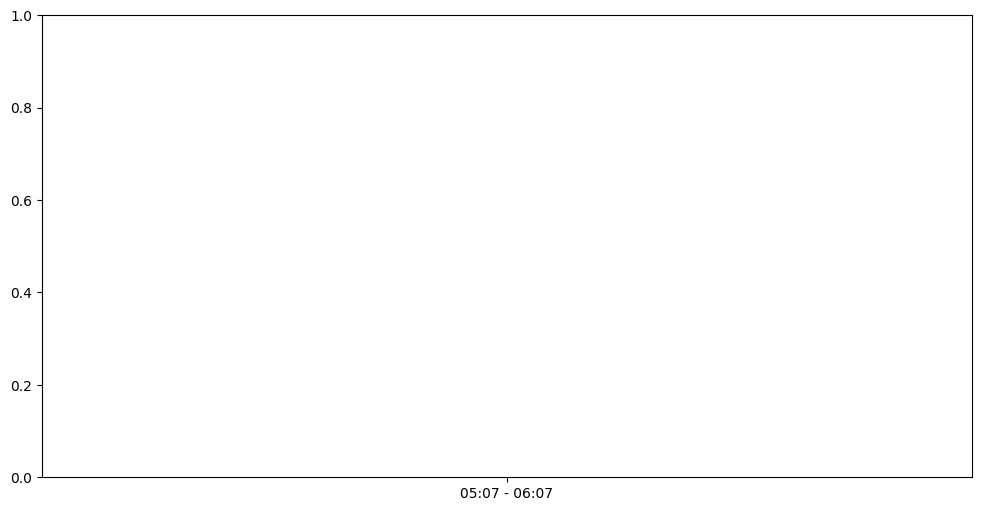

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

all_z_scores = []  # To store all z-scores for each time period
time_periods = []  # To store the corresponding time periods

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]

    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')

    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]

    specific_number = 1.65
    data = data_subset.values

    z_scores = (data - specific_number) / np.std(data)
    
    # Append z-scores for this time period
    all_z_scores.extend(z_scores)
    
    # Append the time period labels for each z-score in this period
    time_periods.extend([f'{start_time.strftime("%H:%M")} - {end_time.strftime("%H:%M")}' for _ in z_scores])

    for k, value in enumerate(data):
        if len(z_scores) > 0:
            print(f'Data Point {k+1}: {value:.4f} is {z_scores[k]:.3f} standard deviations from {specific_number}.')

    print("Data points with z_scores: ")
    print(z_scores)
    print("\n")

# Create a single bar plot for all time periods and their z-score values
plt.figure(figsize=(12, 6))
plt.bar(time_periods, all_z_scores, align='center', alpha=0.5, bin=20)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time Period')
plt.ylabel('Z-scores')
plt.title('Z-scores for All Time Periods')

# Add horizontal line at z-score equal to 0
plt.axhline(y=0, color='red', linestyle='--', label='Z-score = 0')
plt.legend()

plt.show()

Standard Deviation of Geometric density from mould-1:2023-10-21 05:07:00 to 2023-10-21 06:07:00:


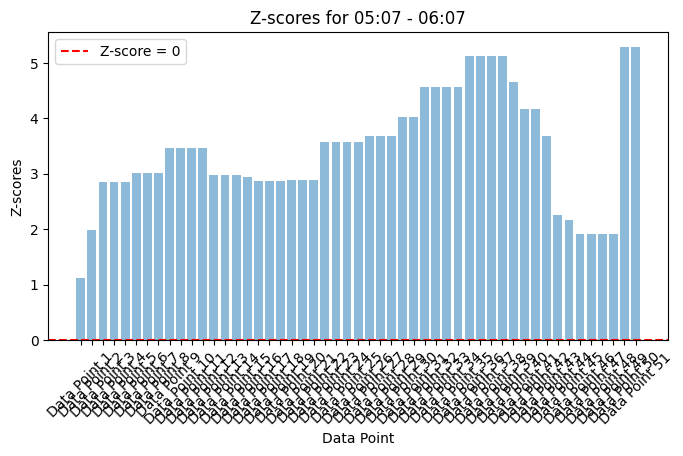

Standard Deviation of Geometric density from mould-1:2023-10-21 06:07:00 to 2023-10-21 07:07:00:


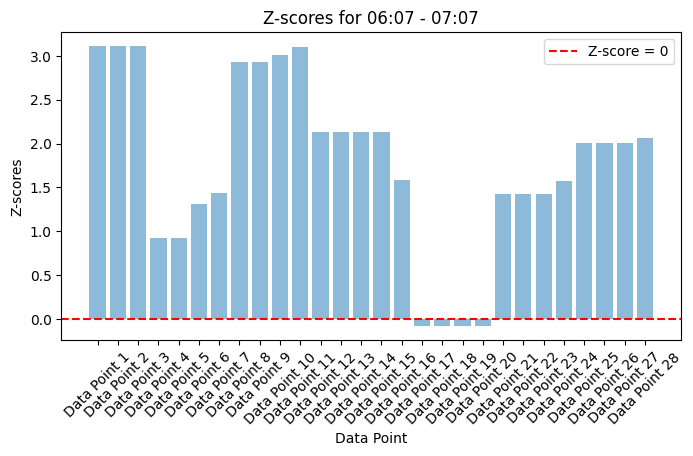

Standard Deviation of Geometric density from mould-1:2023-10-21 07:07:00 to 2023-10-21 08:07:00:


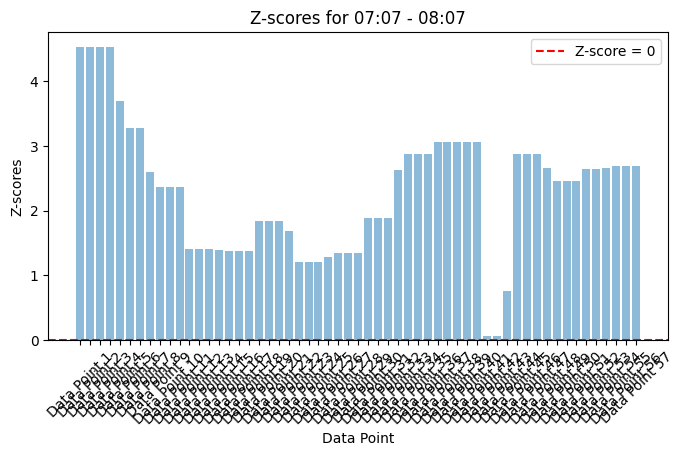

Standard Deviation of Geometric density from mould-1:2023-10-21 08:07:00 to 2023-10-21 09:07:00:


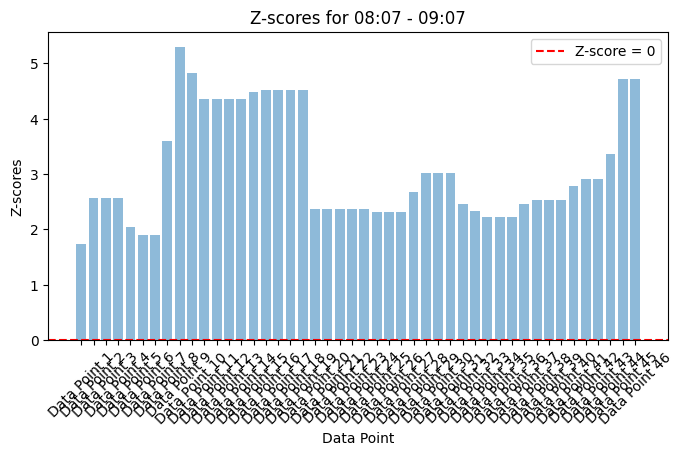

Standard Deviation of Geometric density from mould-1:2023-10-21 09:07:00 to 2023-10-21 10:07:00:


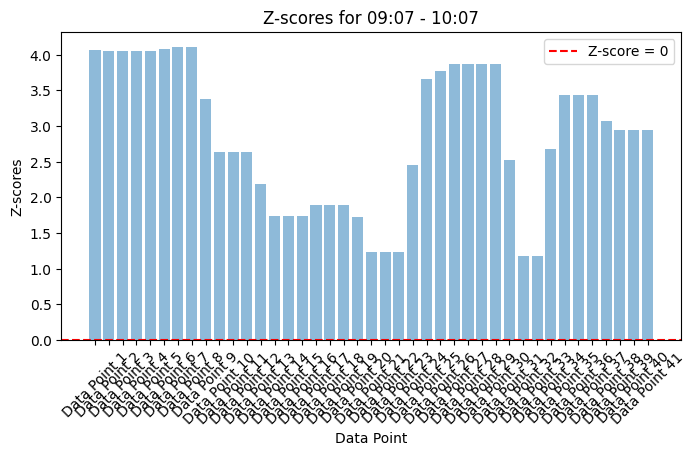

Standard Deviation of Geometric density from mould-1:2023-10-21 10:07:00 to 2023-10-21 11:07:00:


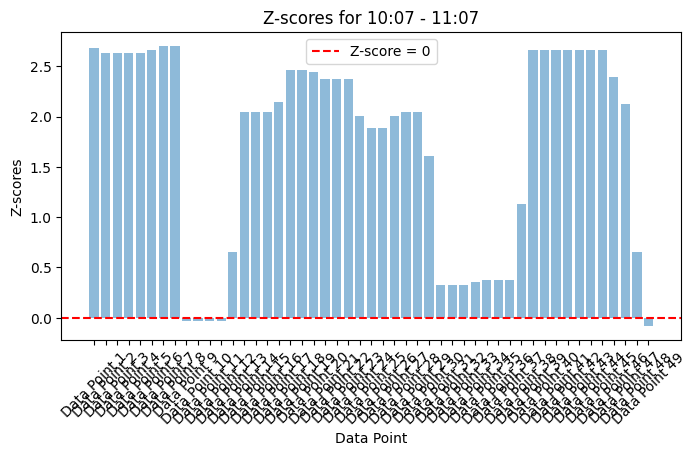

Standard Deviation of Geometric density from mould-1:2023-10-21 11:07:00 to 2023-10-21 12:07:00:


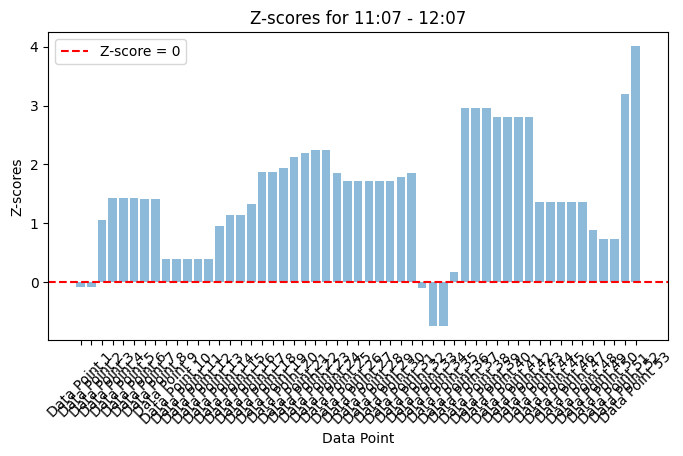

Standard Deviation of Geometric density from mould-1:2023-10-21 12:07:00 to 2023-10-21 13:07:00:


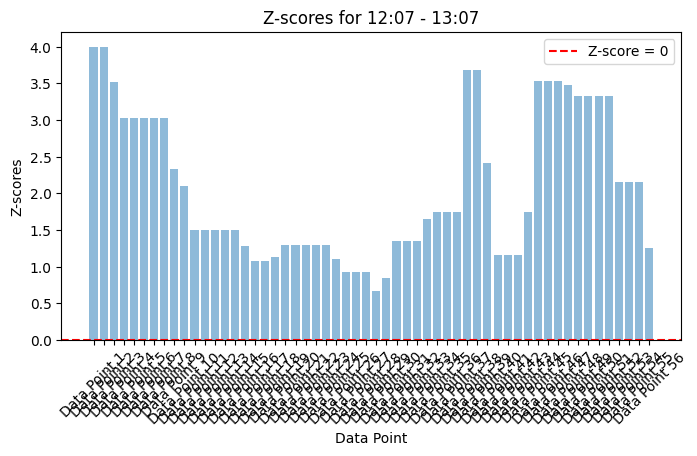

Standard Deviation of Geometric density from mould-1:2023-10-21 13:07:00 to 2023-10-21 14:07:00:


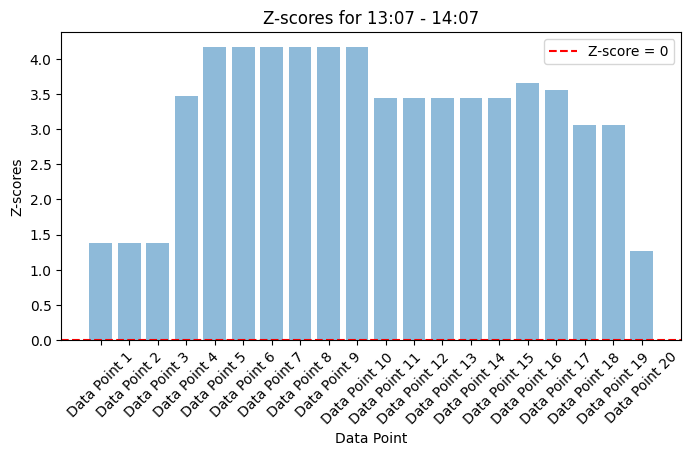

Standard Deviation of Geometric density from mould-1:2023-10-21 14:07:00 to 2023-10-21 15:07:00:


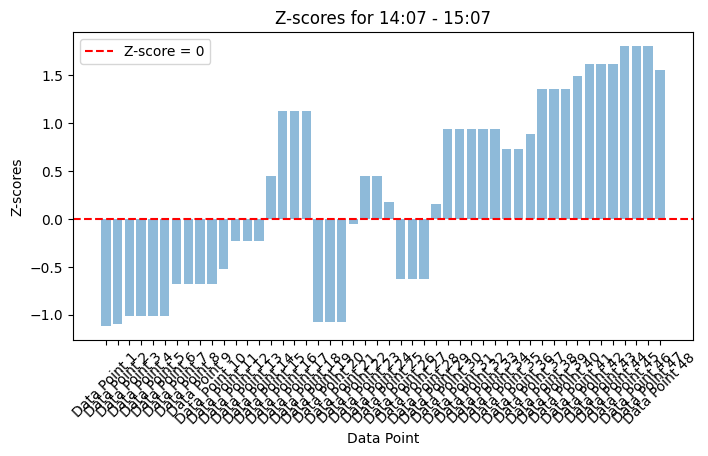

Standard Deviation of Geometric density from mould-1:2023-10-21 15:07:00 to 2023-10-21 16:07:00:


c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


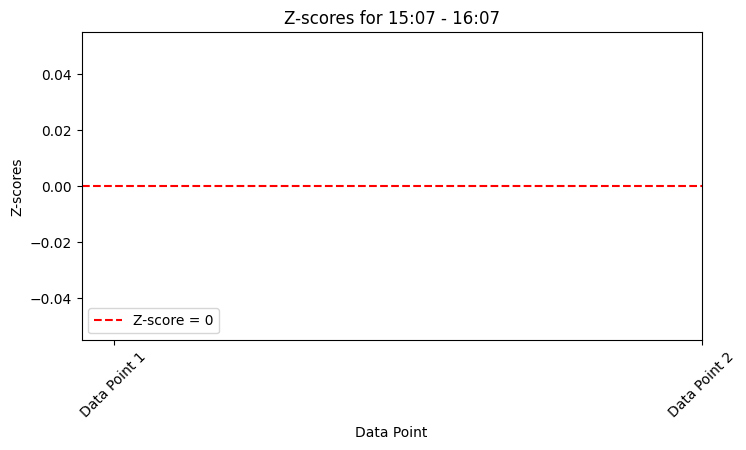

Standard Deviation of Geometric density from mould-1:2023-10-21 16:07:00 to 2023-10-21 17:07:00:


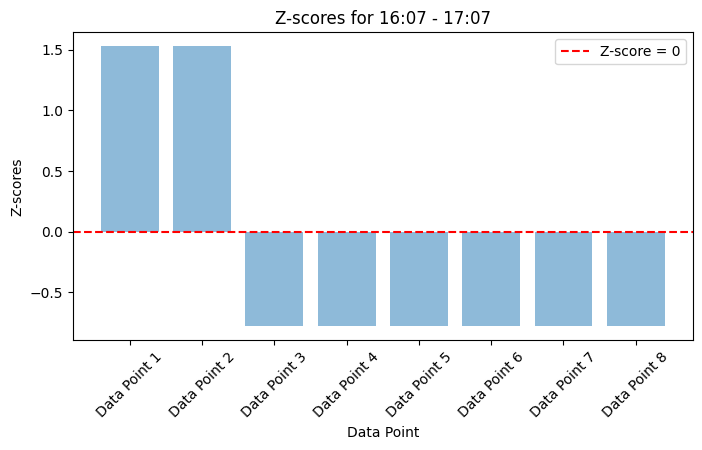

Standard Deviation of Geometric density from mould-1:2023-10-21 17:07:00 to 2023-10-21 18:07:00:


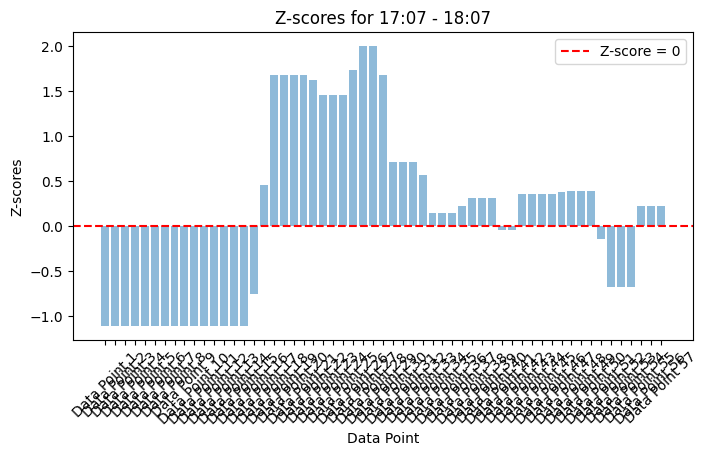

Standard Deviation of Geometric density from mould-1:2023-10-21 18:07:00 to 2023-10-21 19:07:00:


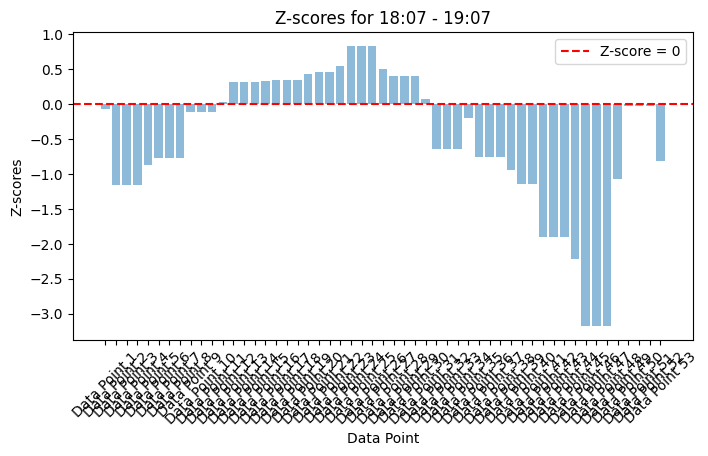

Standard Deviation of Geometric density from mould-1:2023-10-21 19:07:00 to 2023-10-21 20:07:00:


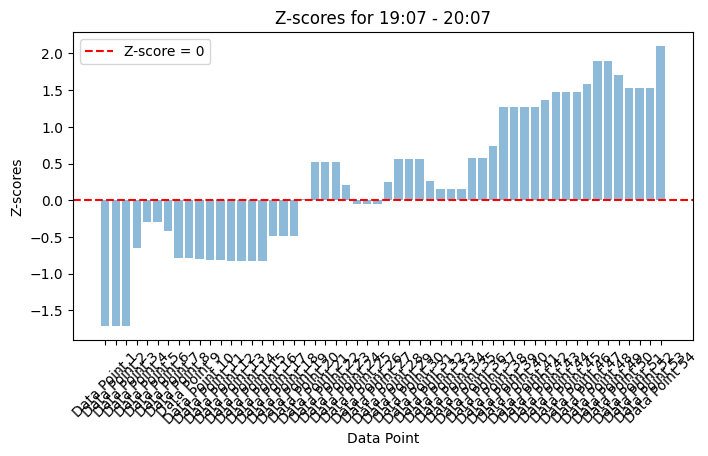

Standard Deviation of Geometric density from mould-1:2023-10-21 20:07:00 to 2023-10-21 21:07:00:


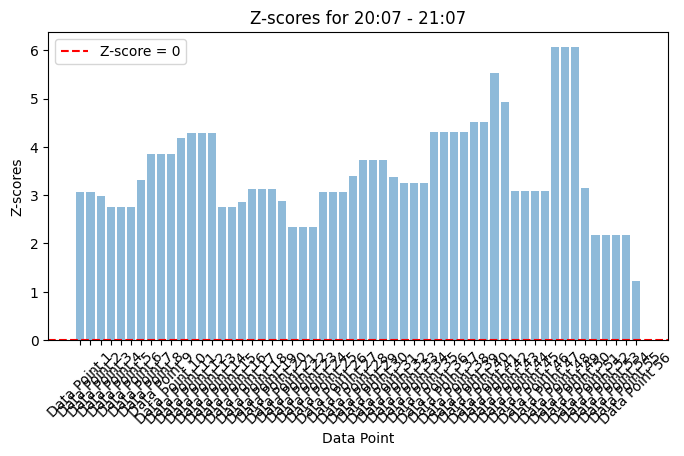

Standard Deviation of Geometric density from mould-1:2023-10-21 21:07:00 to 2023-10-21 22:07:00:


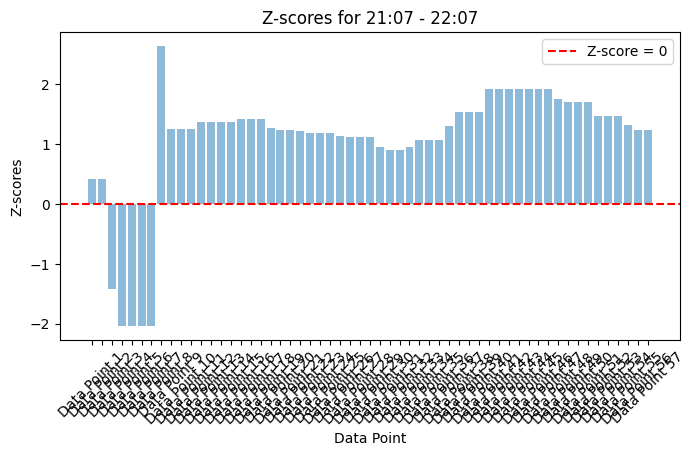

Standard Deviation of Geometric density from mould-1:2023-10-21 22:07:00 to 2023-10-21 23:07:00:


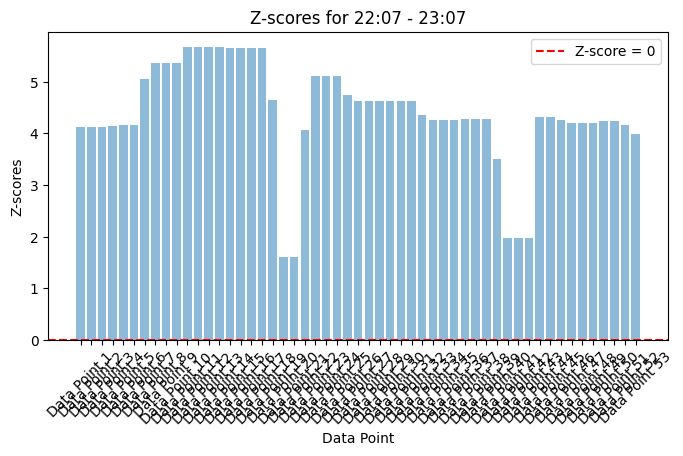

Standard Deviation of Geometric density from mould-1:2023-10-21 23:07:00 to 2023-10-22 00:07:00:


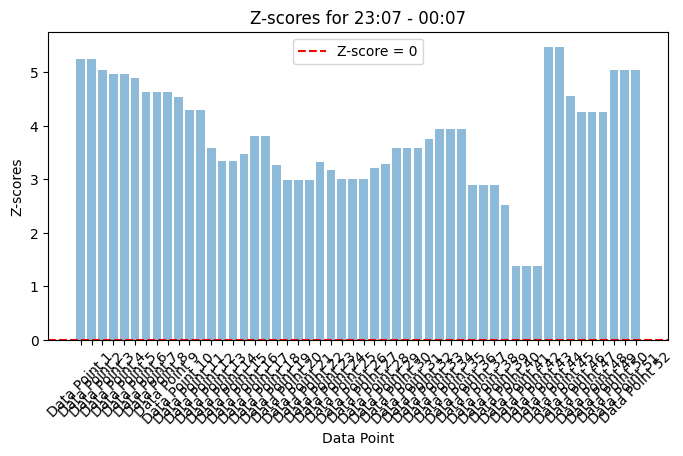

Standard Deviation of Geometric density from mould-1:2023-10-22 00:07:00 to 2023-10-22 01:07:00:


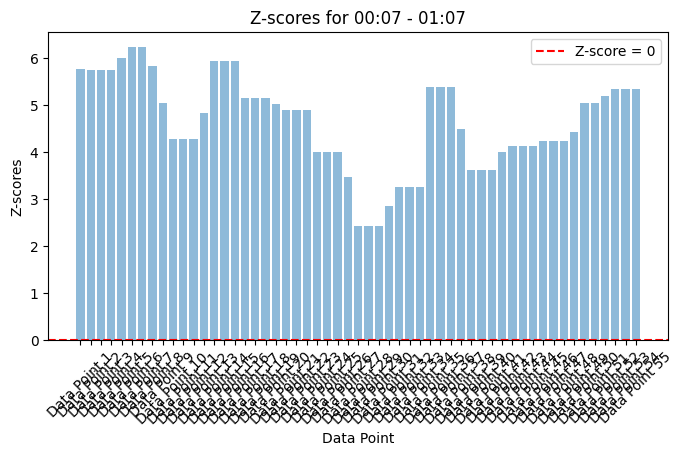

Standard Deviation of Geometric density from mould-1:2023-10-22 01:07:00 to 2023-10-22 02:07:00:


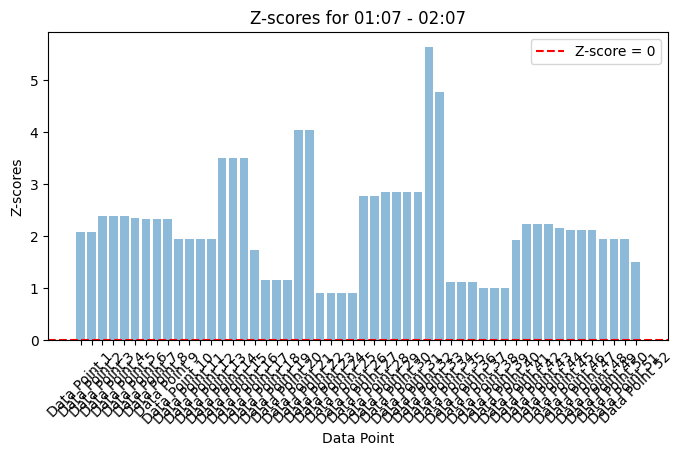

Standard Deviation of Geometric density from mould-1:2023-10-22 02:07:00 to 2023-10-22 03:07:00:


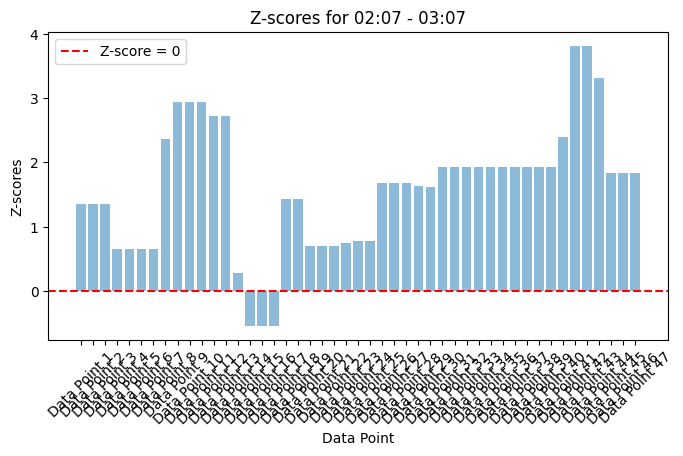

Standard Deviation of Geometric density from mould-1:2023-10-22 03:07:00 to 2023-10-22 04:07:00:


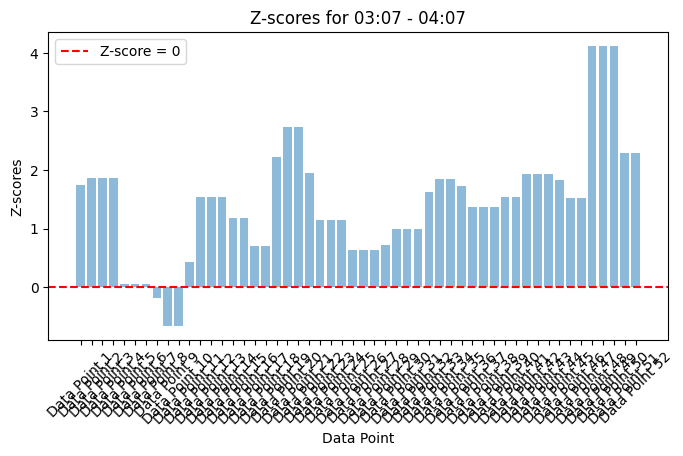

Standard Deviation of Geometric density from mould-1:2023-10-22 04:07:00 to 2023-10-22 05:07:00:


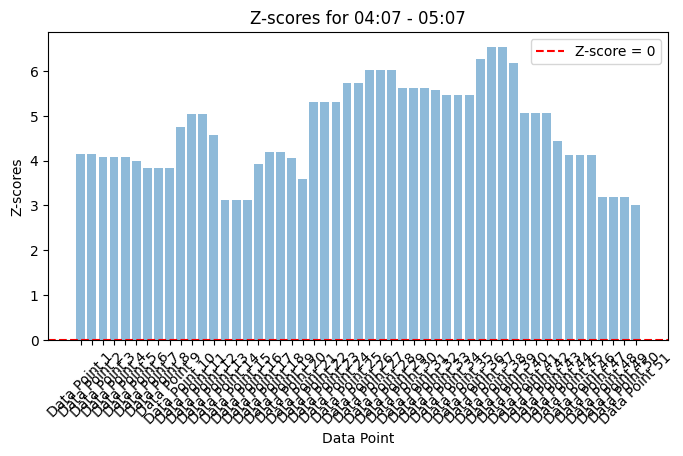

Standard Deviation of Geometric density from mould-1:2023-10-22 05:07:00 to 2023-10-22 06:07:00:


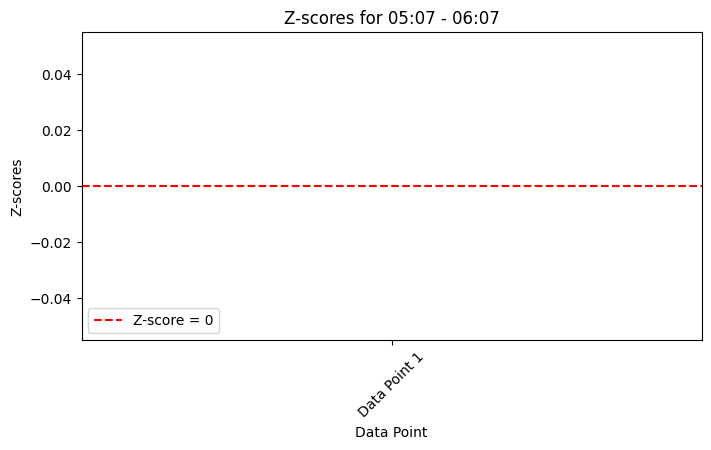

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]

    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')

    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]

    specific_number = 1.65
    data = data_subset.values

    z_scores = (data - specific_number) / np.std(data)
    
    # Create a bar for each value of z_scores
    plt.figure(figsize=(8, 4))
    plt.bar(range(len(z_scores)), z_scores, align='center', alpha=0.5)
    plt.xticks(range(len(z_scores)), [f'Data Point {k+1}' for k in range(len(z_scores))], rotation=45)
    plt.xlabel('Data Point')
    plt.ylabel('Z-scores')
    plt.title(f'Z-scores for {start_time.strftime("%H:%M")} - {end_time.strftime("%H:%M")}')
    plt.axhline(y=0, color='red', linestyle='--', label='Z-score = 0')
    plt.legend()
    plt.show()

Standard Deviation of Geometric density from mould-1:2023-10-21 05:07:00 to 2023-10-21 06:07:00:


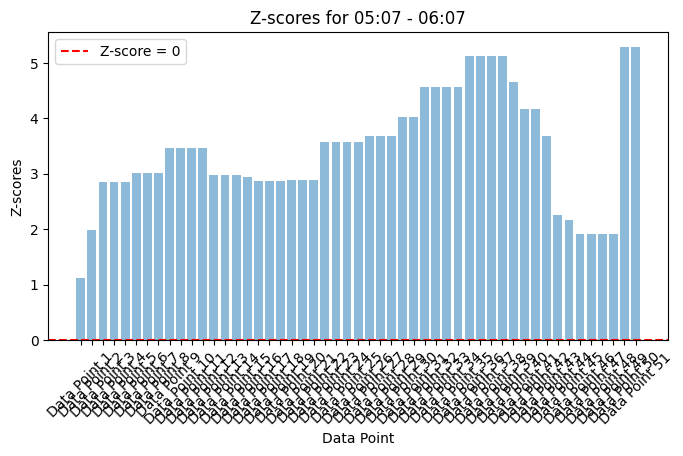

Standard Deviation of Geometric density from mould-1:2023-10-21 06:07:00 to 2023-10-21 07:07:00:


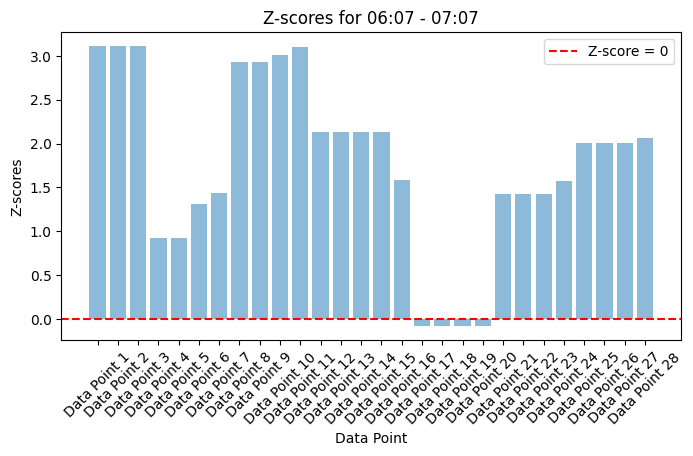

Standard Deviation of Geometric density from mould-1:2023-10-21 07:07:00 to 2023-10-21 08:07:00:


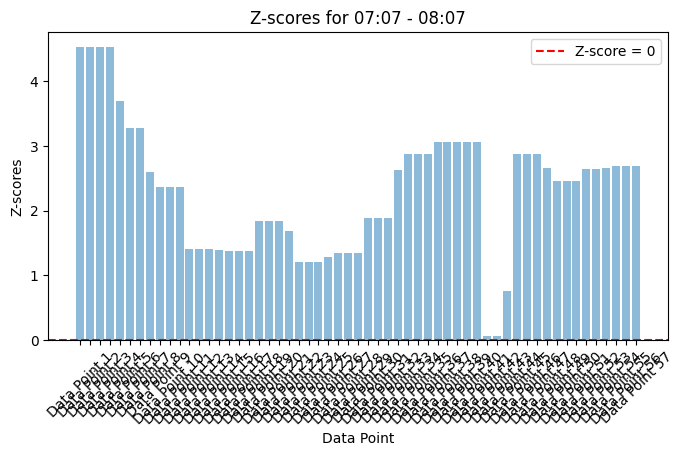

Standard Deviation of Geometric density from mould-1:2023-10-21 08:07:00 to 2023-10-21 09:07:00:


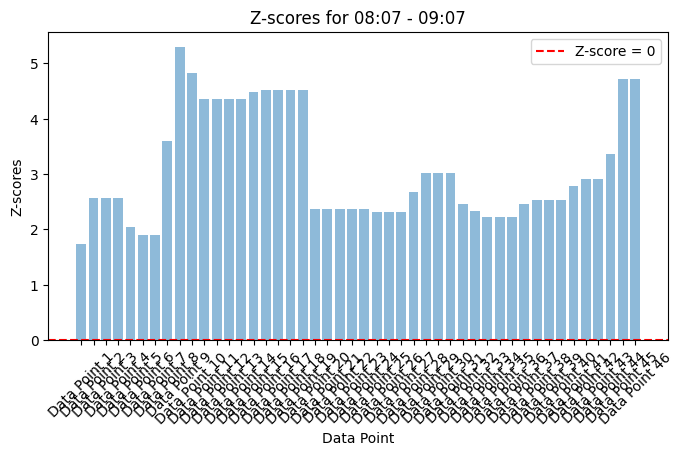

Standard Deviation of Geometric density from mould-1:2023-10-21 09:07:00 to 2023-10-21 10:07:00:


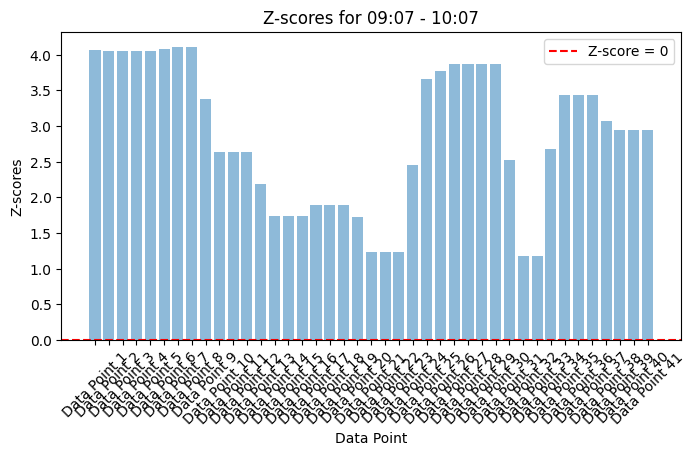

Standard Deviation of Geometric density from mould-1:2023-10-21 10:07:00 to 2023-10-21 11:07:00:


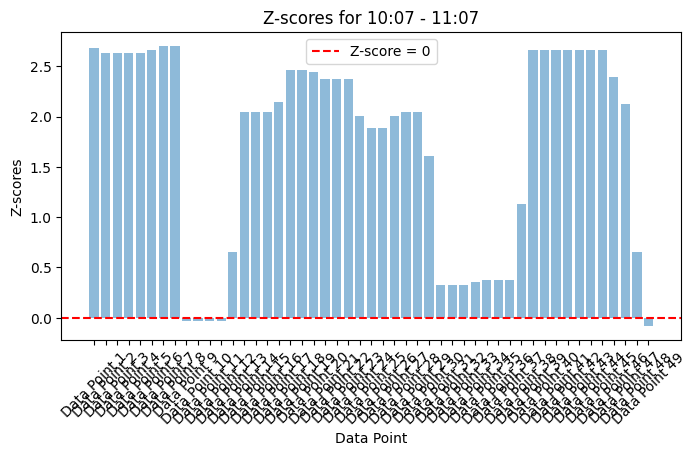

Standard Deviation of Geometric density from mould-1:2023-10-21 11:07:00 to 2023-10-21 12:07:00:


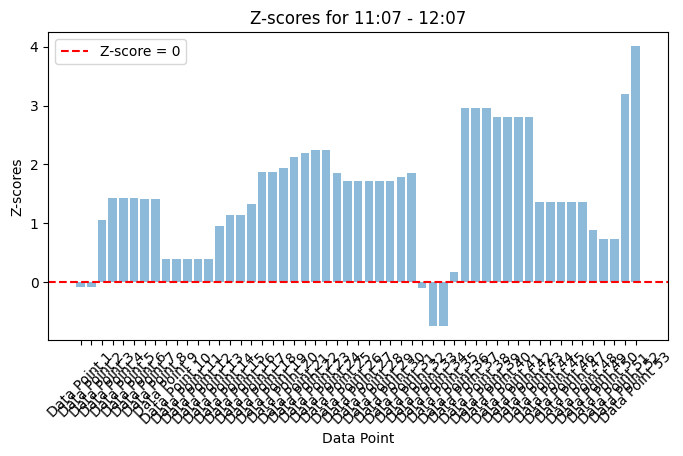

Standard Deviation of Geometric density from mould-1:2023-10-21 12:07:00 to 2023-10-21 13:07:00:


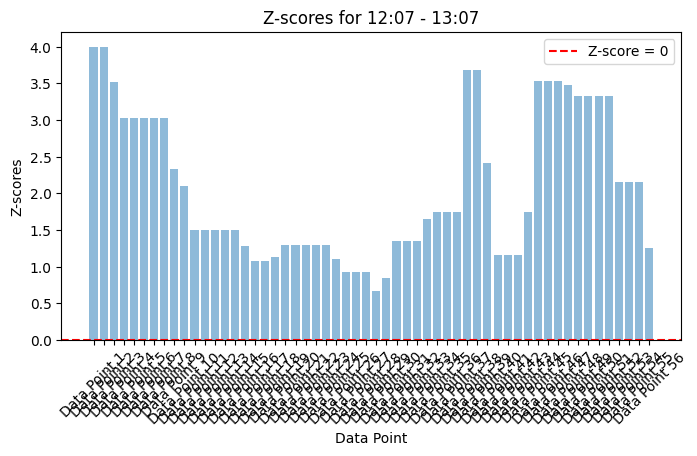

Standard Deviation of Geometric density from mould-1:2023-10-21 13:07:00 to 2023-10-21 14:07:00:


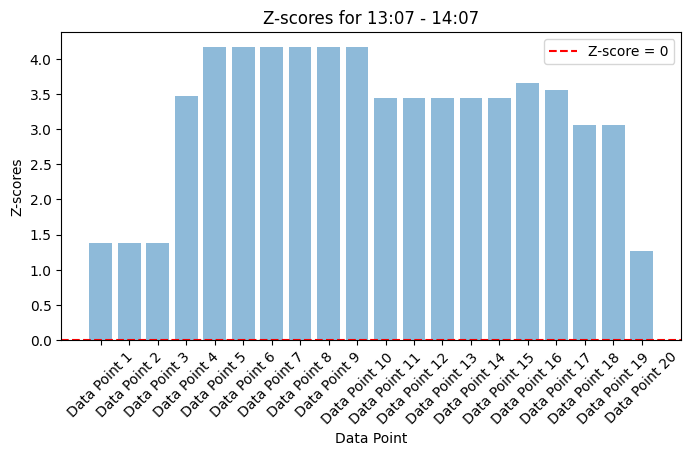

Standard Deviation of Geometric density from mould-1:2023-10-21 14:07:00 to 2023-10-21 15:07:00:


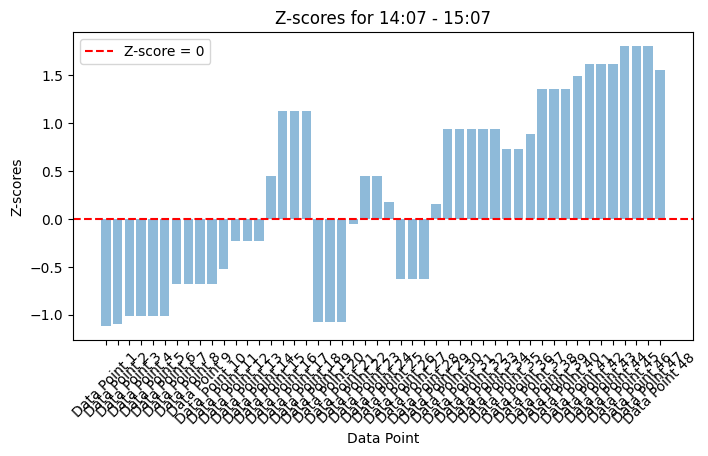

Standard Deviation of Geometric density from mould-1:2023-10-21 15:07:00 to 2023-10-21 16:07:00:


c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


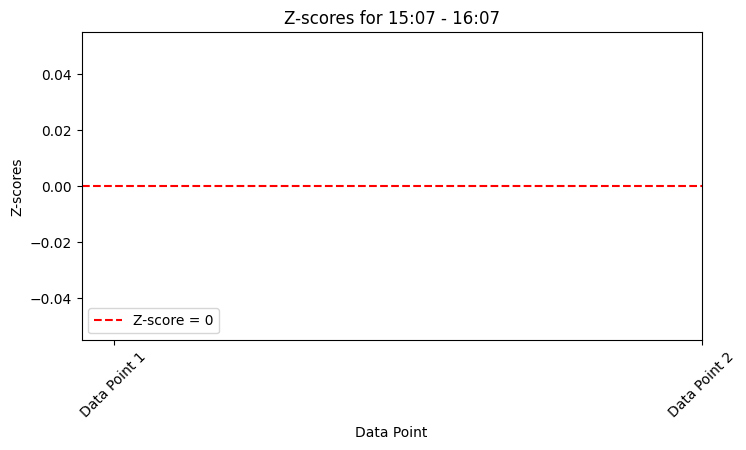

Standard Deviation of Geometric density from mould-1:2023-10-21 16:07:00 to 2023-10-21 17:07:00:


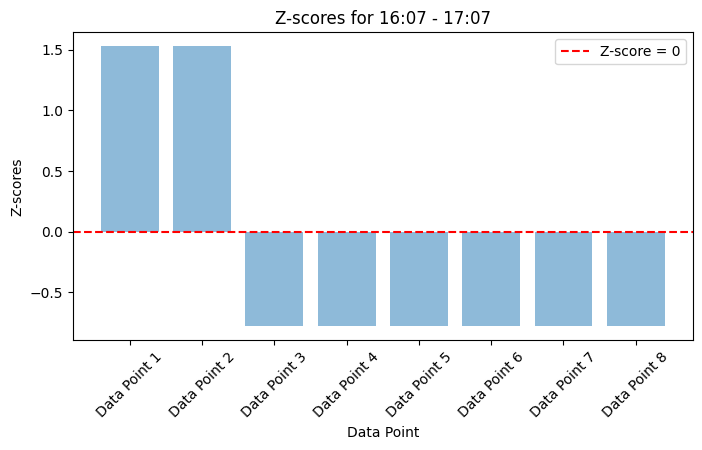

Standard Deviation of Geometric density from mould-1:2023-10-21 17:07:00 to 2023-10-21 18:07:00:


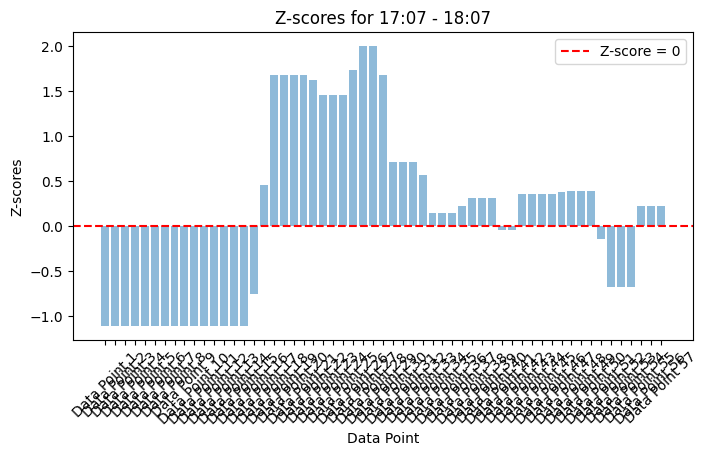

Standard Deviation of Geometric density from mould-1:2023-10-21 18:07:00 to 2023-10-21 19:07:00:


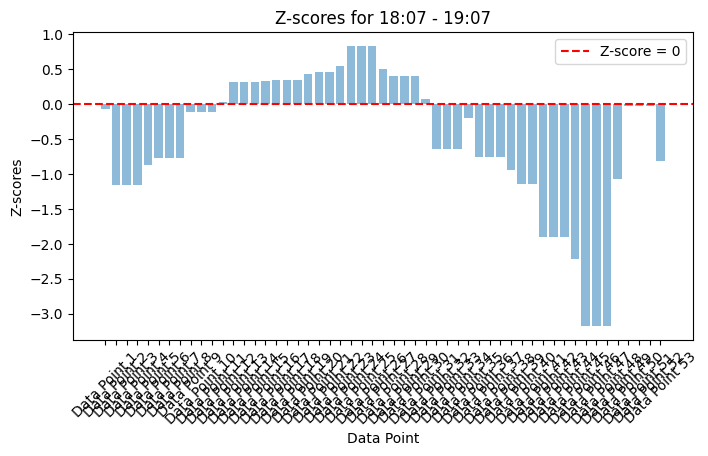

Standard Deviation of Geometric density from mould-1:2023-10-21 19:07:00 to 2023-10-21 20:07:00:


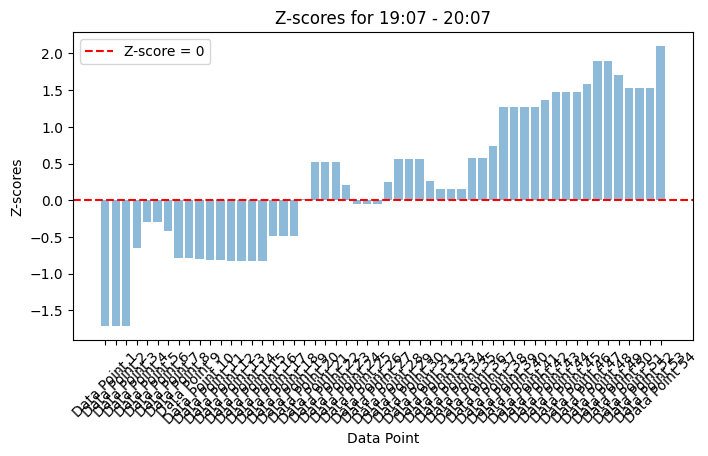

Standard Deviation of Geometric density from mould-1:2023-10-21 20:07:00 to 2023-10-21 21:07:00:


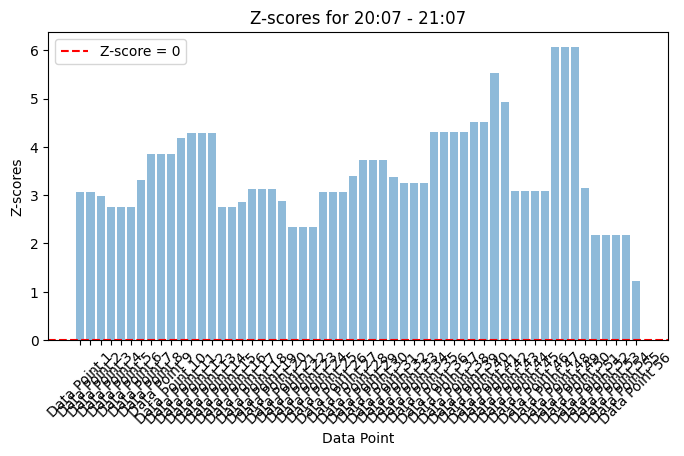

Standard Deviation of Geometric density from mould-1:2023-10-21 21:07:00 to 2023-10-21 22:07:00:


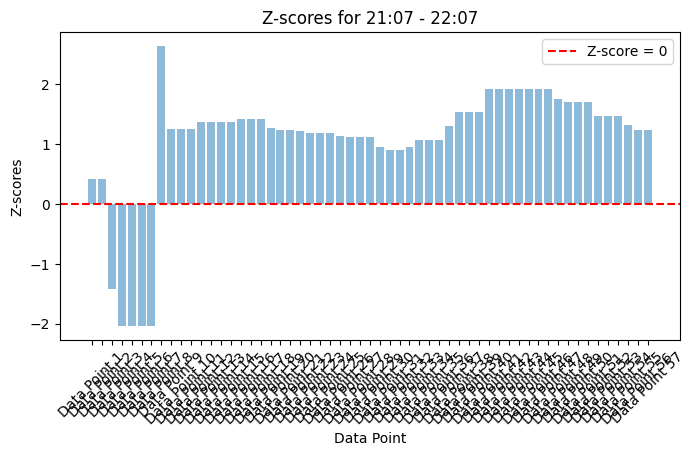

Standard Deviation of Geometric density from mould-1:2023-10-21 22:07:00 to 2023-10-21 23:07:00:


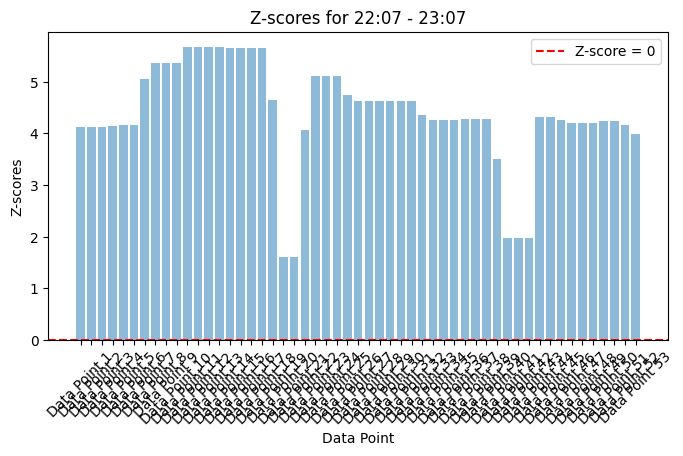

Standard Deviation of Geometric density from mould-1:2023-10-21 23:07:00 to 2023-10-22 00:07:00:


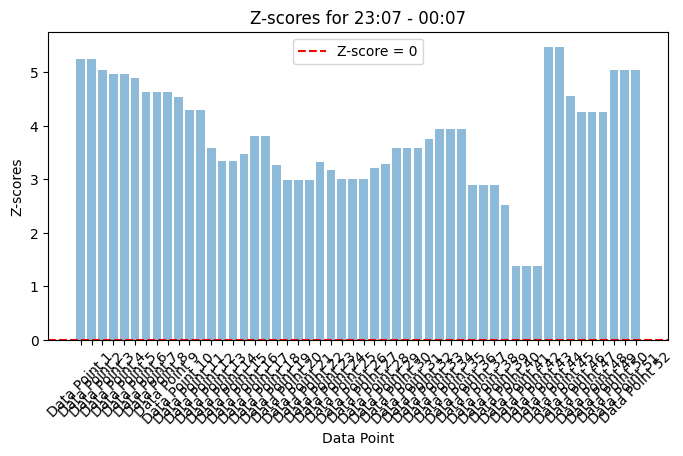

Standard Deviation of Geometric density from mould-1:2023-10-22 00:07:00 to 2023-10-22 01:07:00:


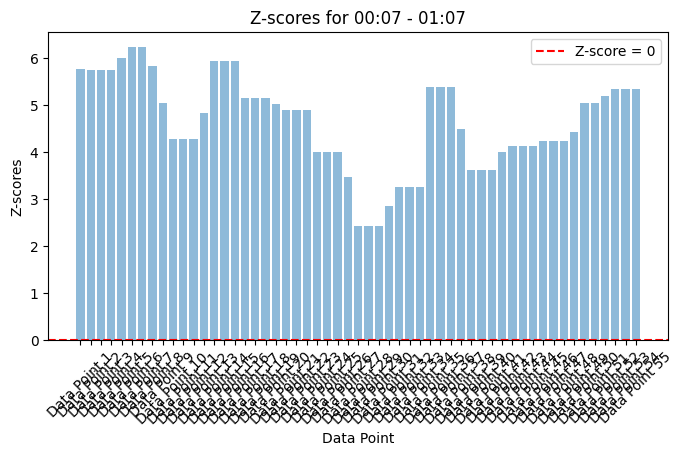

Standard Deviation of Geometric density from mould-1:2023-10-22 01:07:00 to 2023-10-22 02:07:00:


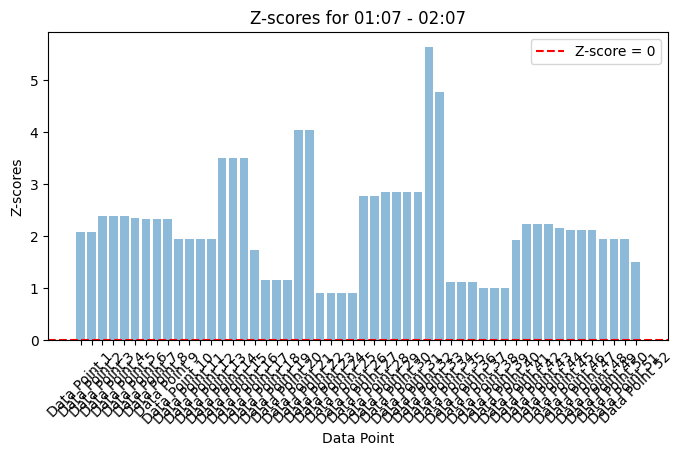

Standard Deviation of Geometric density from mould-1:2023-10-22 02:07:00 to 2023-10-22 03:07:00:


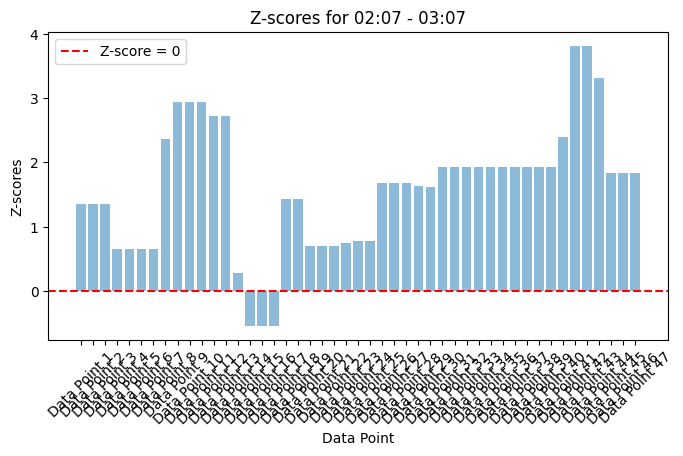

Standard Deviation of Geometric density from mould-1:2023-10-22 03:07:00 to 2023-10-22 04:07:00:


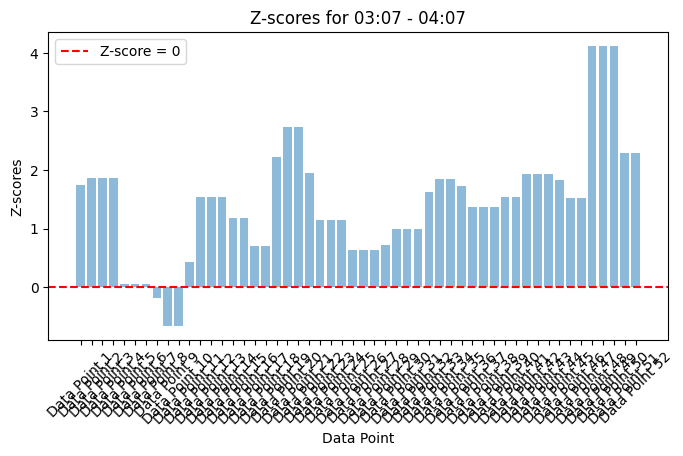

Standard Deviation of Geometric density from mould-1:2023-10-22 04:07:00 to 2023-10-22 05:07:00:


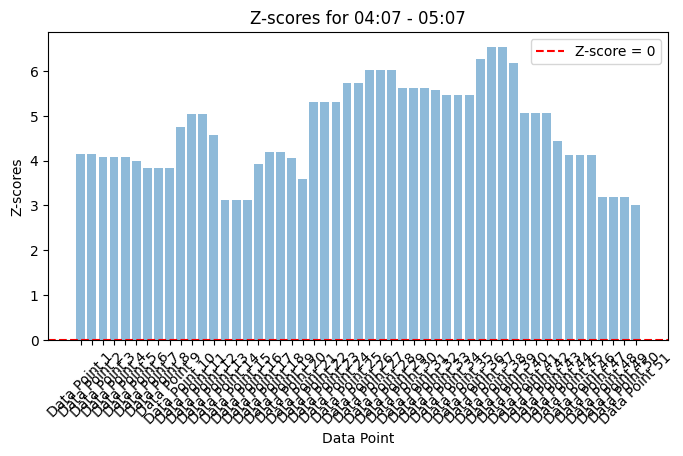

Standard Deviation of Geometric density from mould-1:2023-10-22 05:07:00 to 2023-10-22 06:07:00:


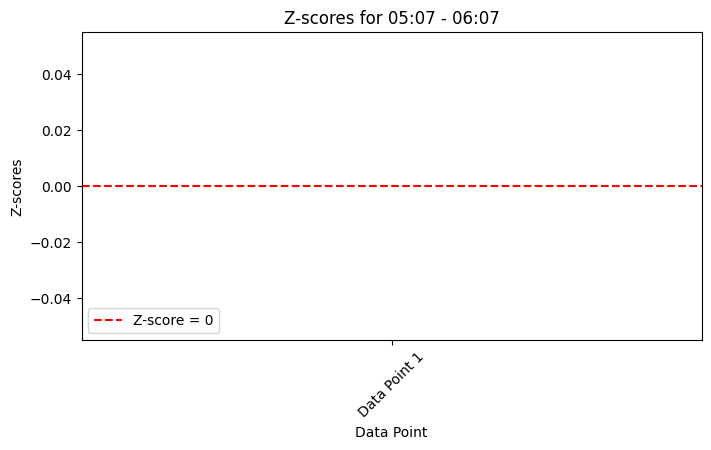

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]

    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')

    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]

    specific_number = 1.65
    data = data_subset.values

    z_scores = (data - specific_number) / np.std(data)
    
    # Create a bar for each value of z_scores
    plt.figure(figsize=(8, 4))
    plt.bar(range(len(z_scores)), z_scores, align='center', alpha=0.5)
    plt.xticks(range(len(z_scores)), [f'Data Point {k+1}' for k in range(len(z_scores))], rotation=45)
    plt.xlabel('Data Point')
    plt.ylabel('Z-scores')
    plt.title(f'Z-scores for {start_time.strftime("%H:%M")} - {end_time.strftime("%H:%M")}')
    plt.axhline(y=0, color='red', linestyle='--', label='Z-score = 0')
    plt.legend()
    plt.show()

Standard Deviation of Geometric density from mould-1:2023-10-21 05:07:00 to 2023-10-21 06:07:00:


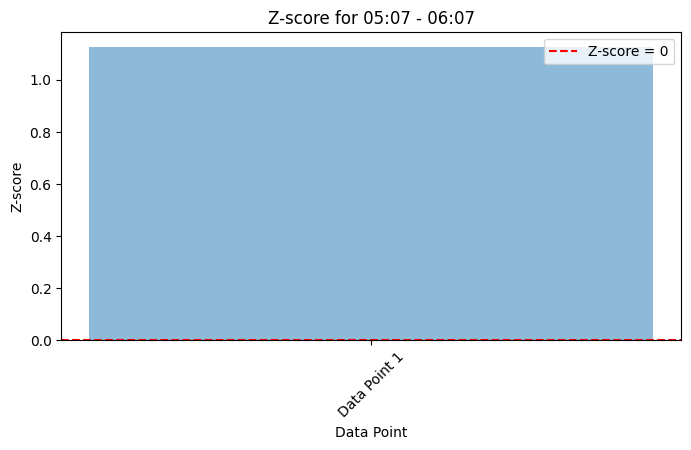

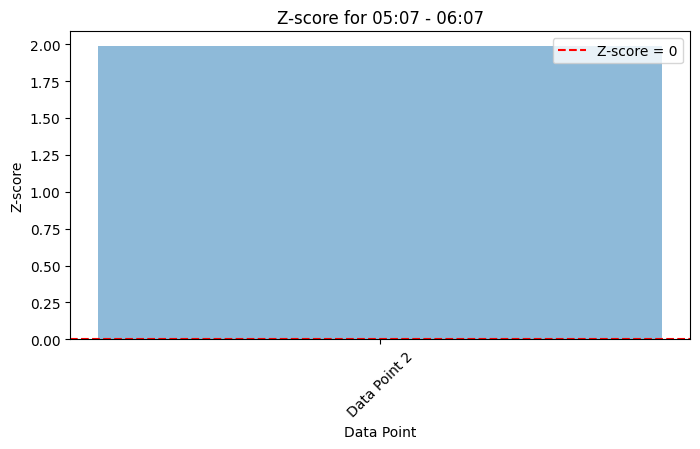

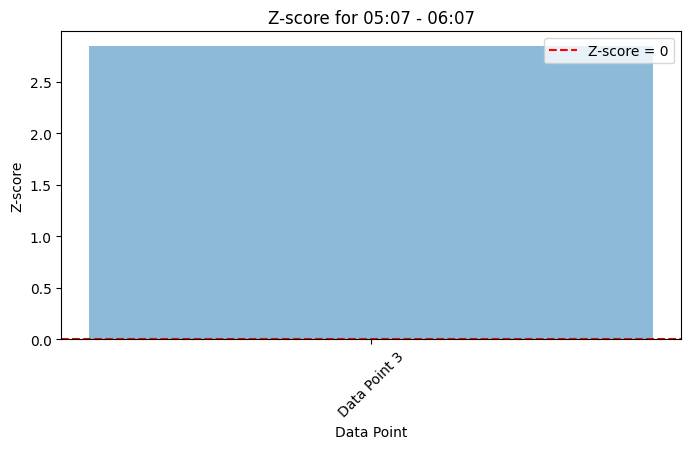

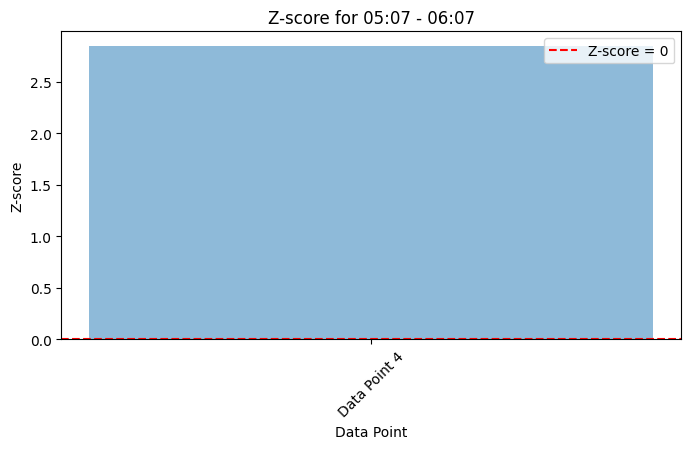

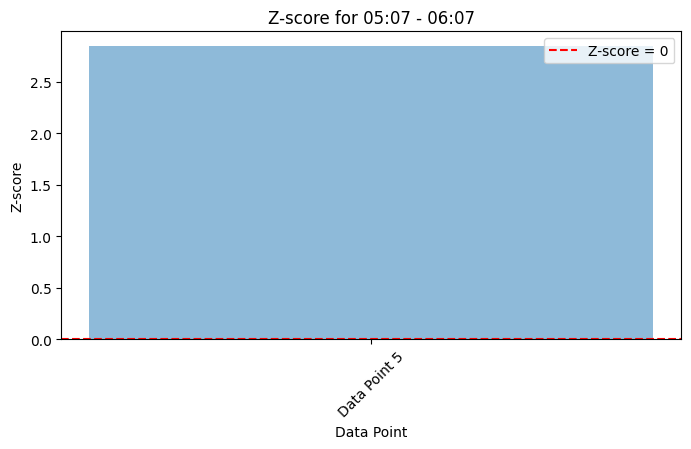

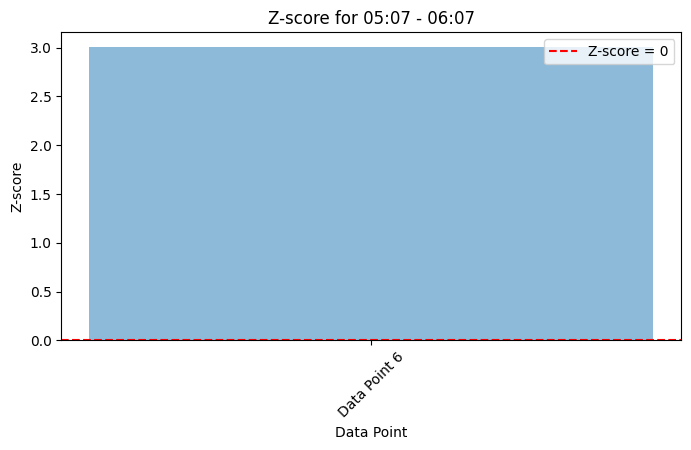

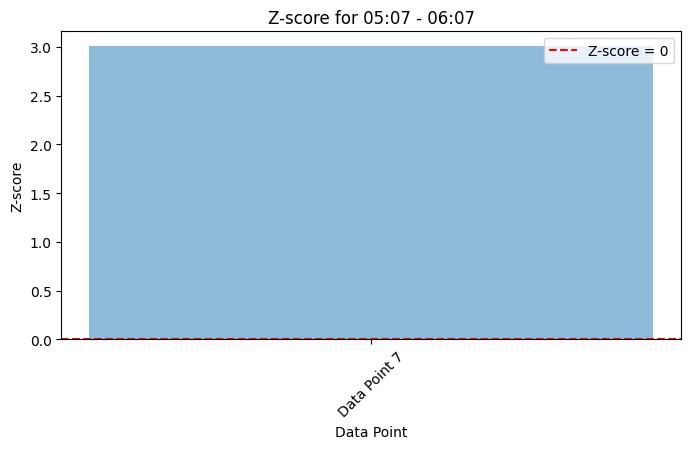

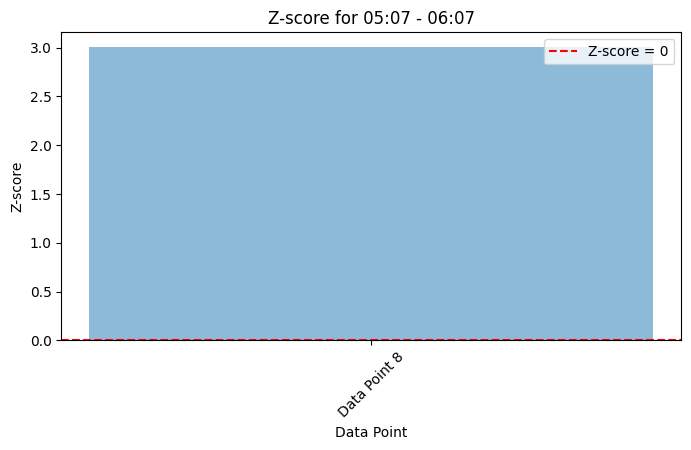

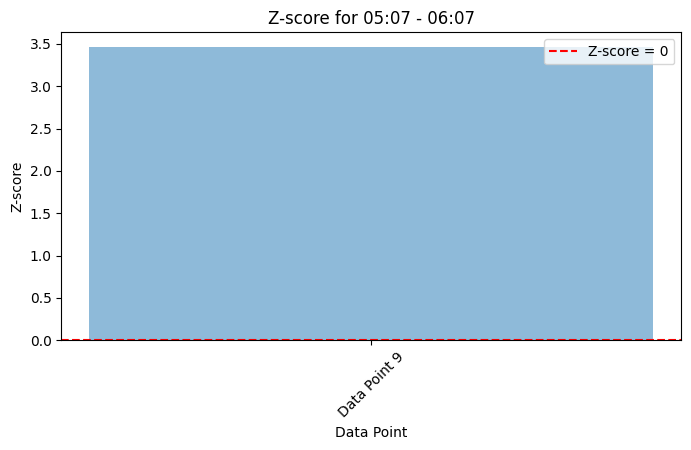

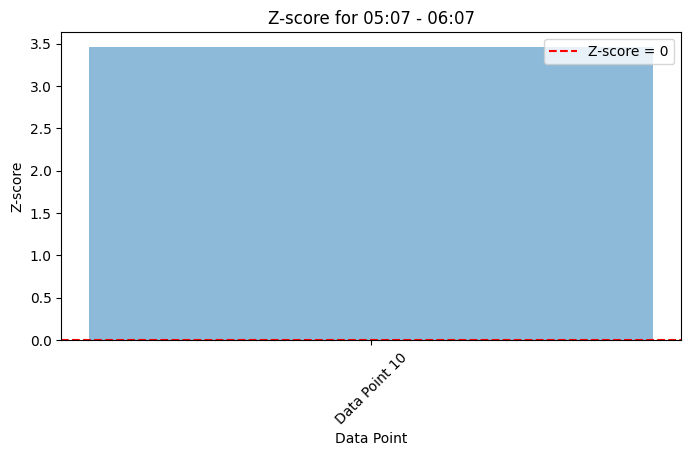

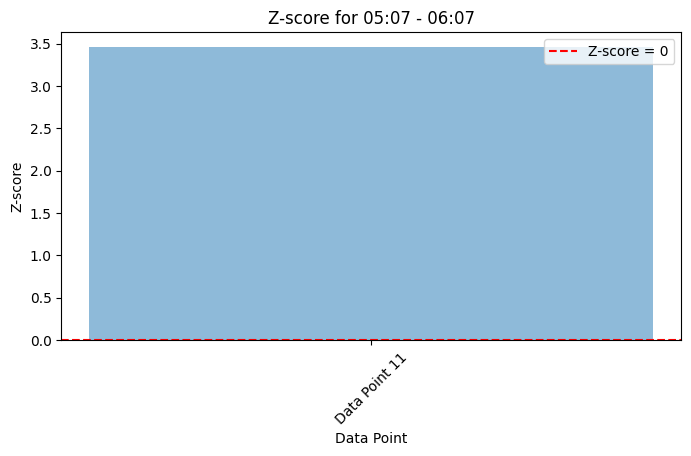

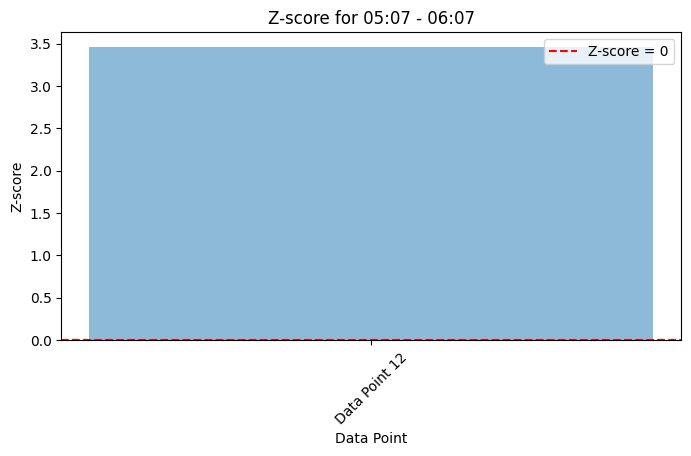

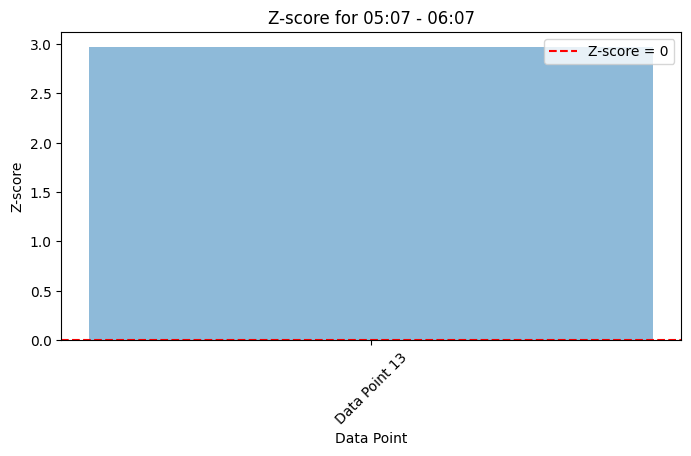

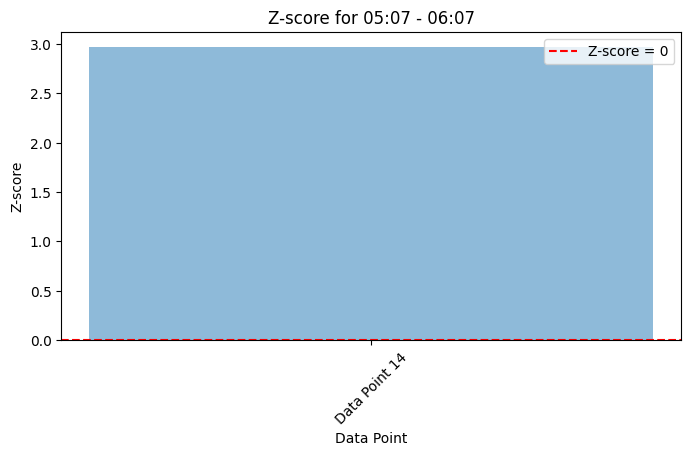

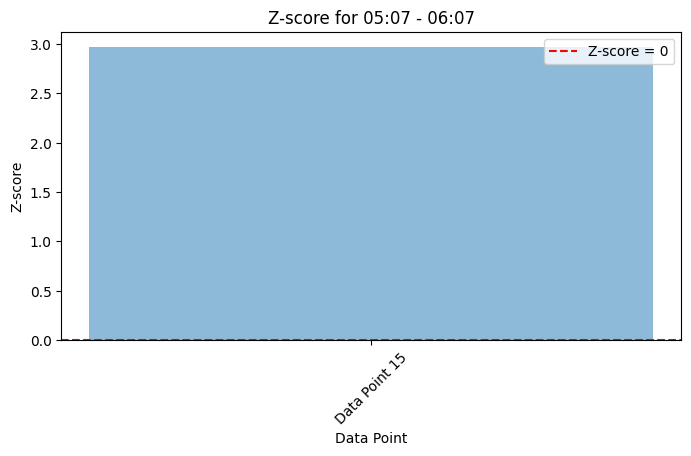

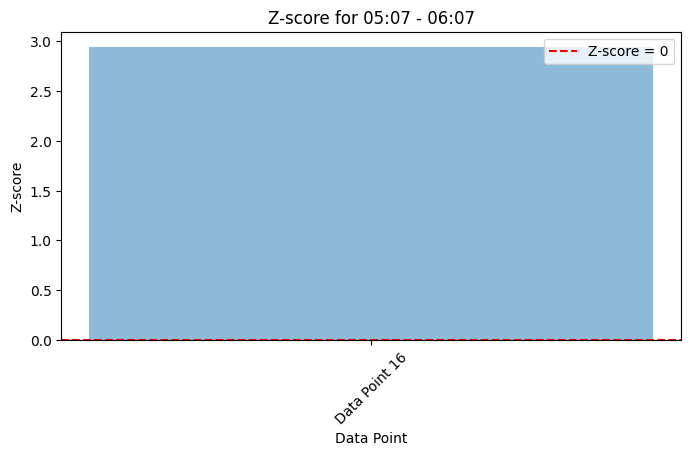

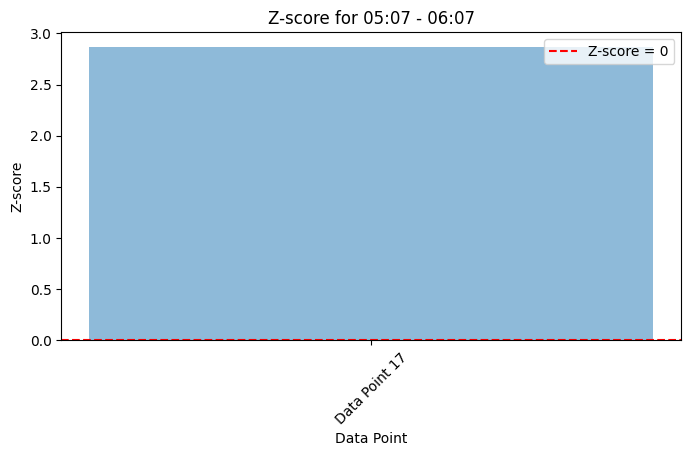

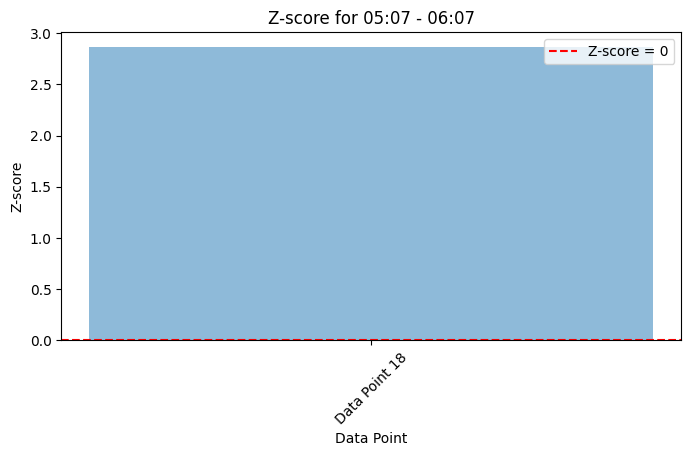

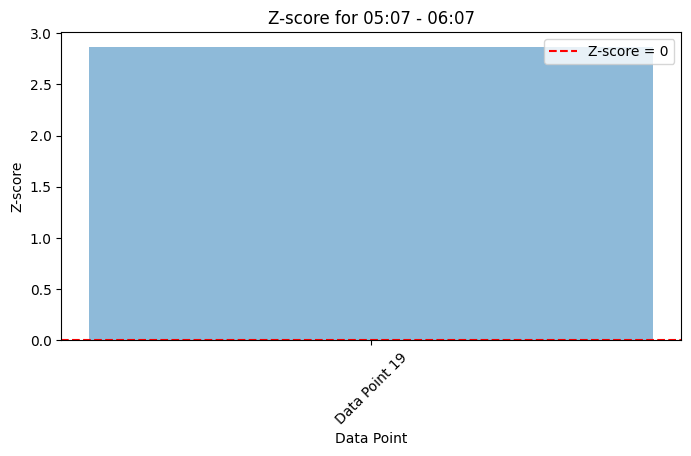

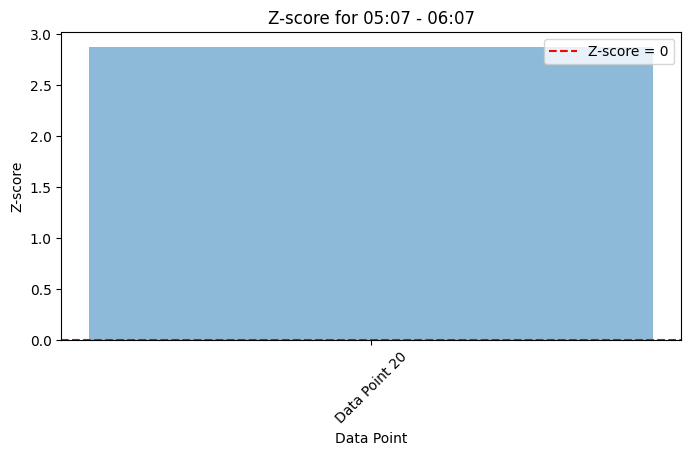

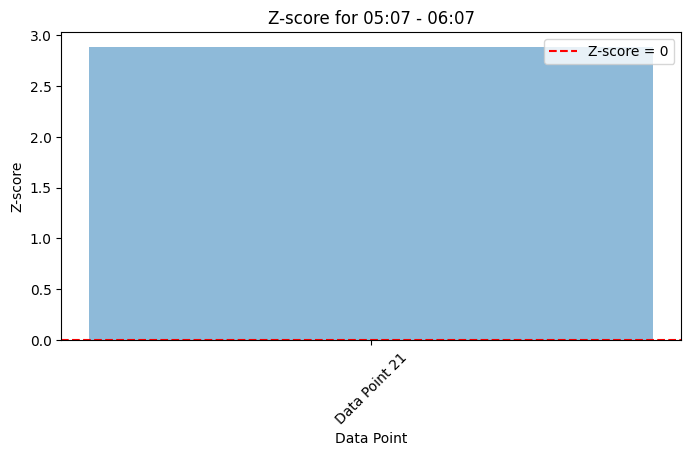

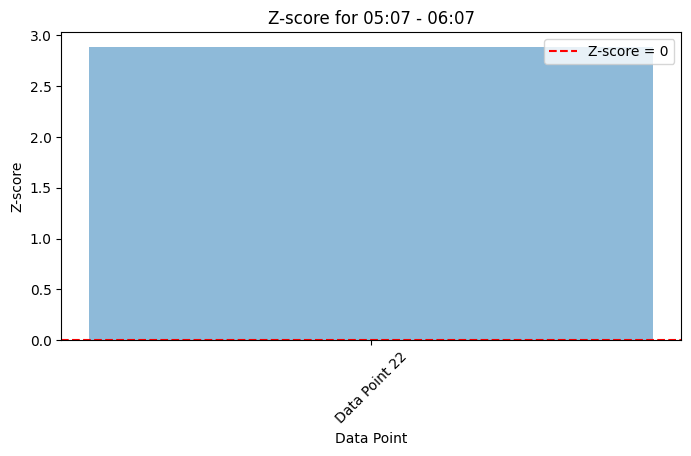

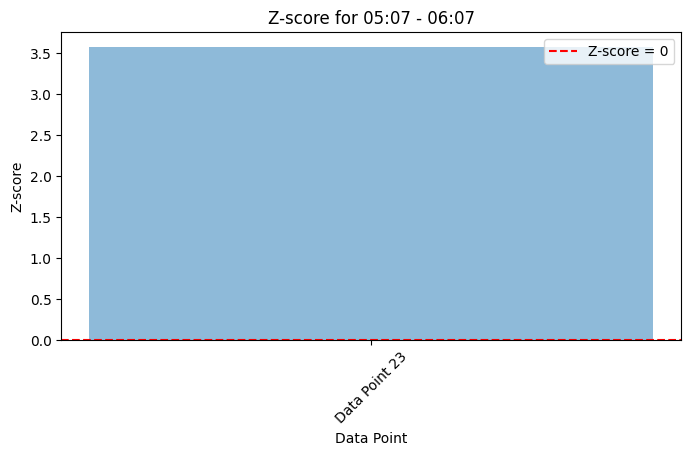

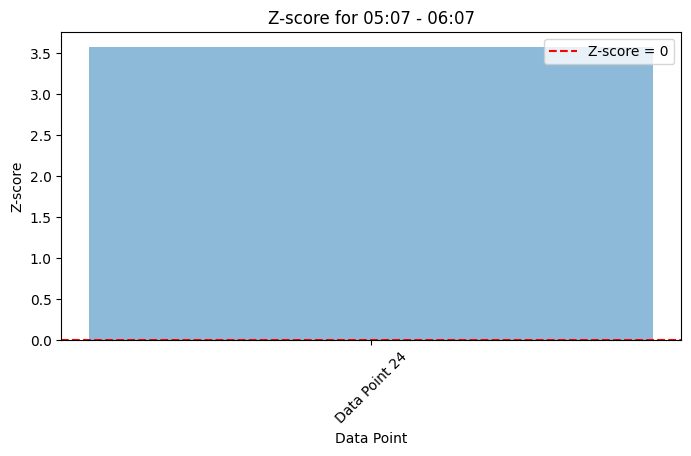

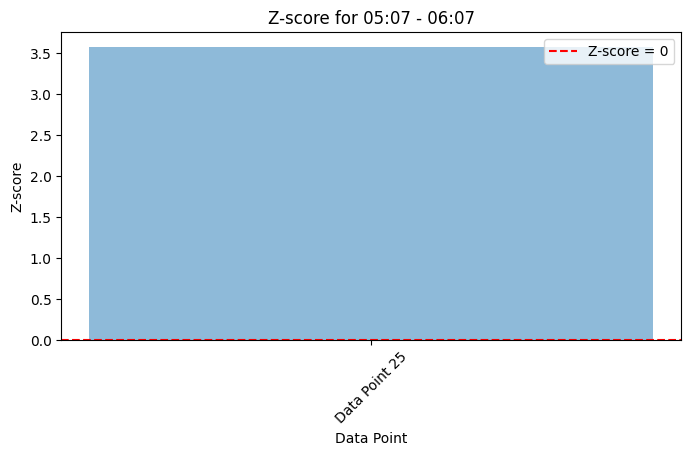

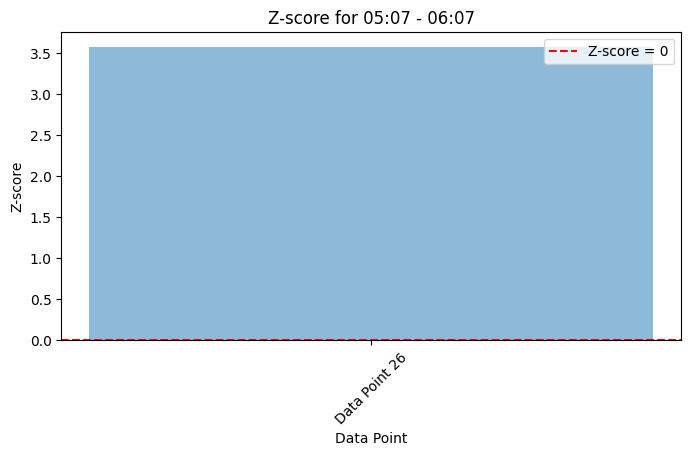

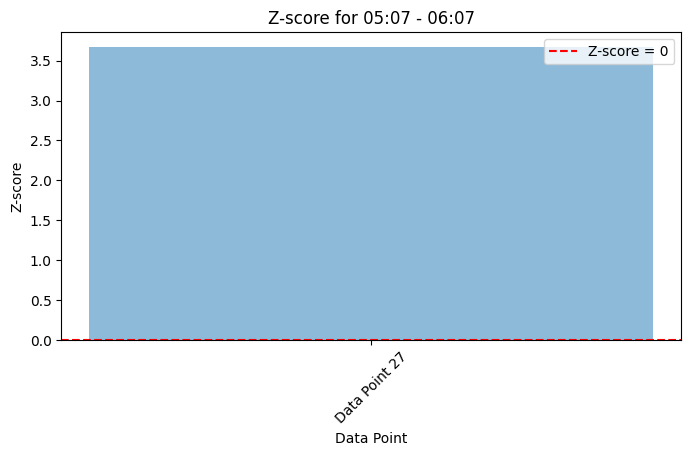

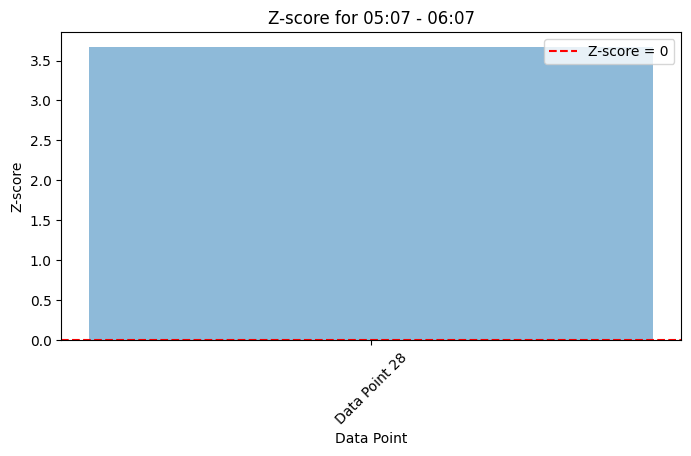

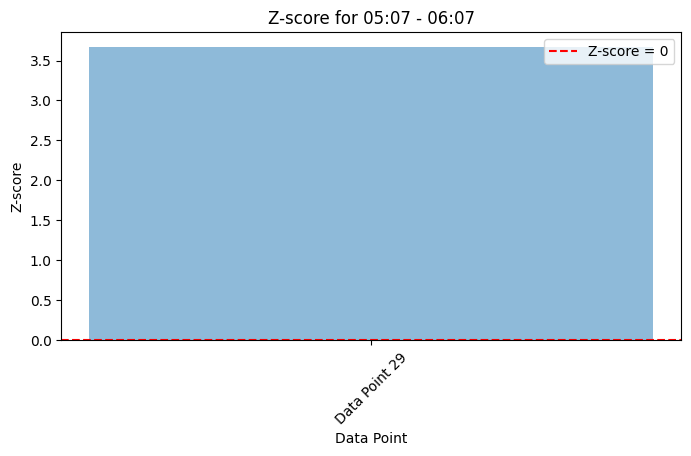

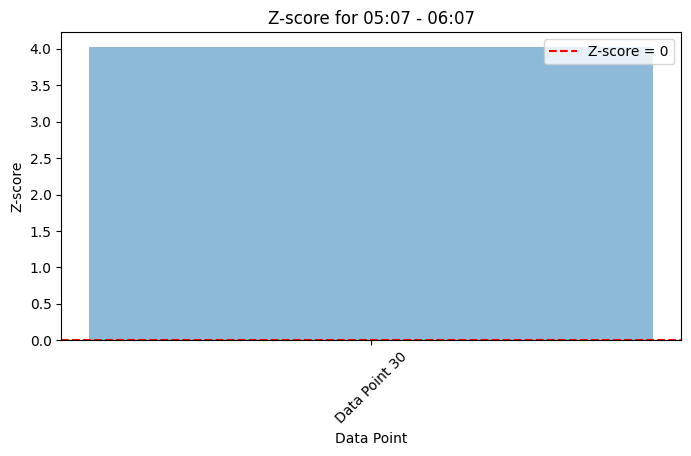

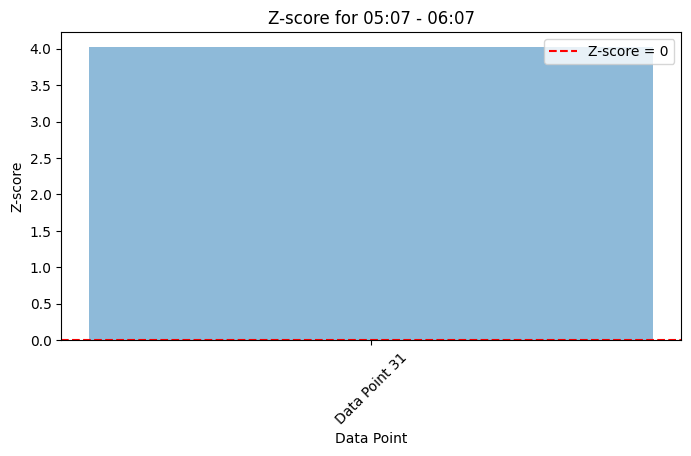

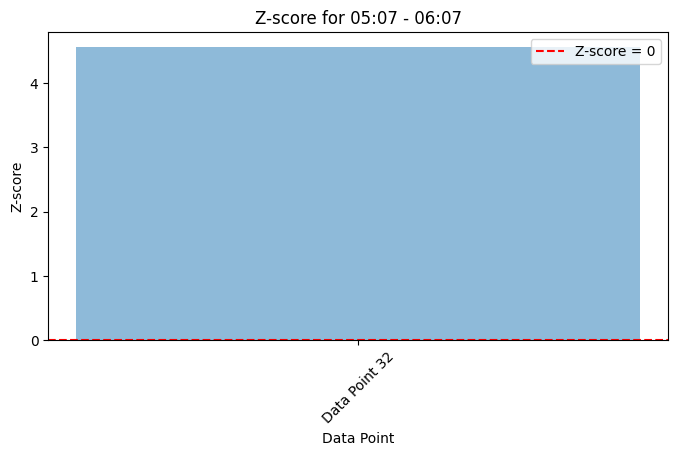

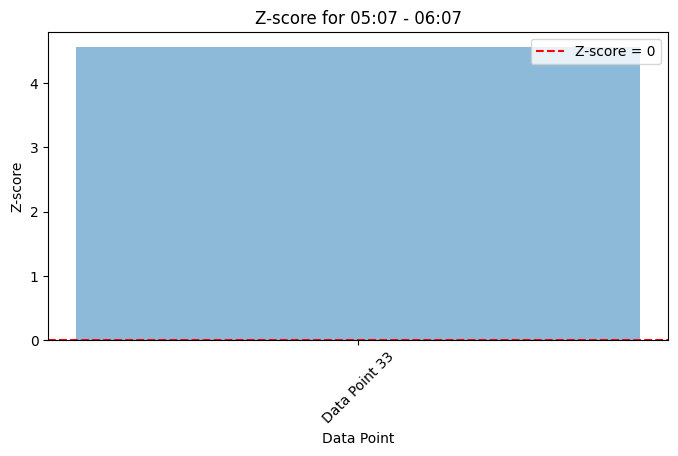

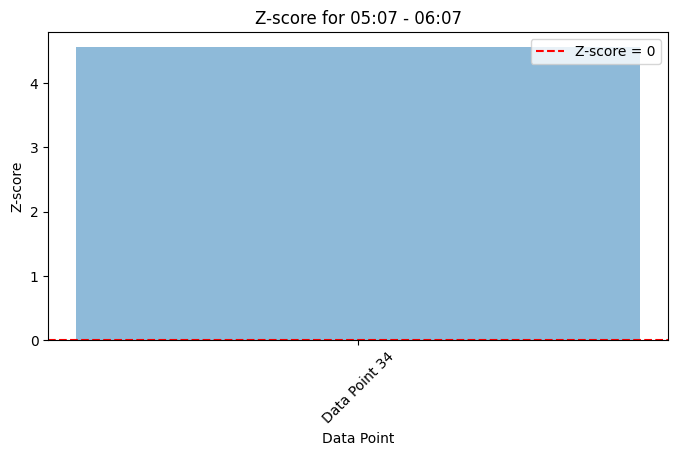

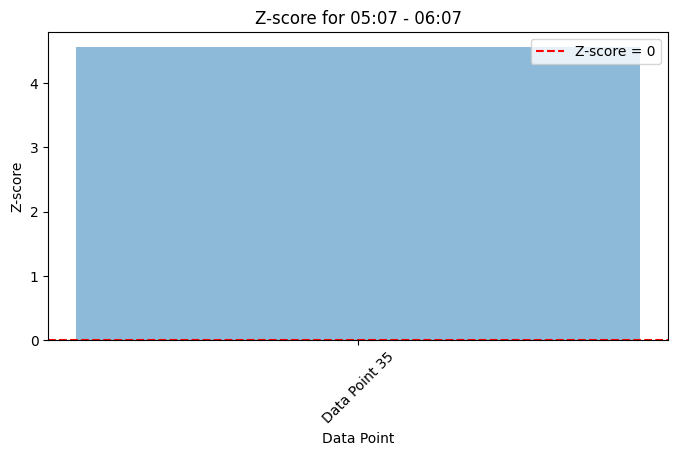

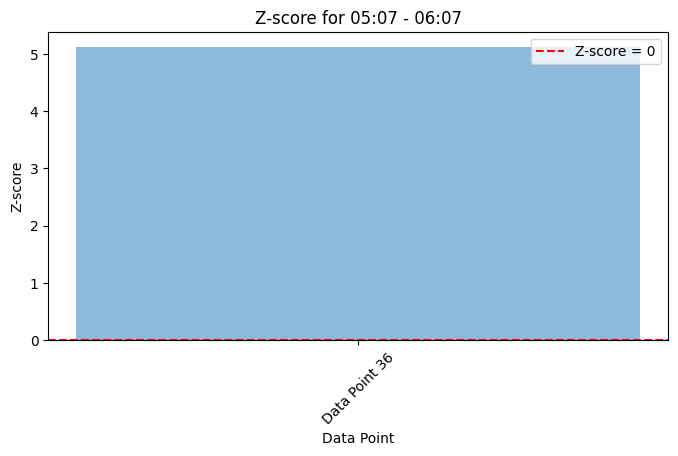

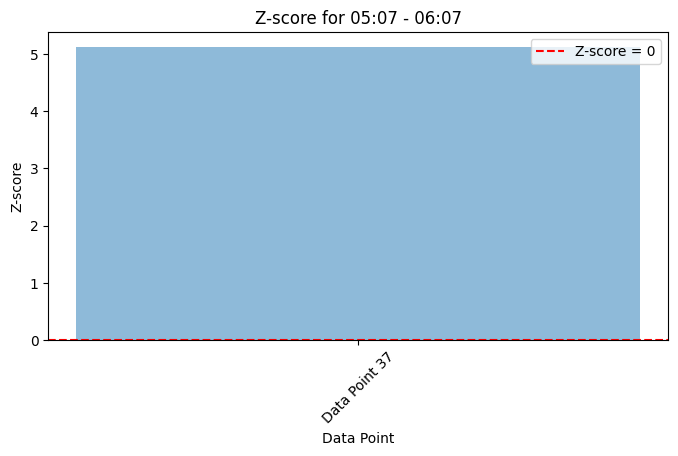

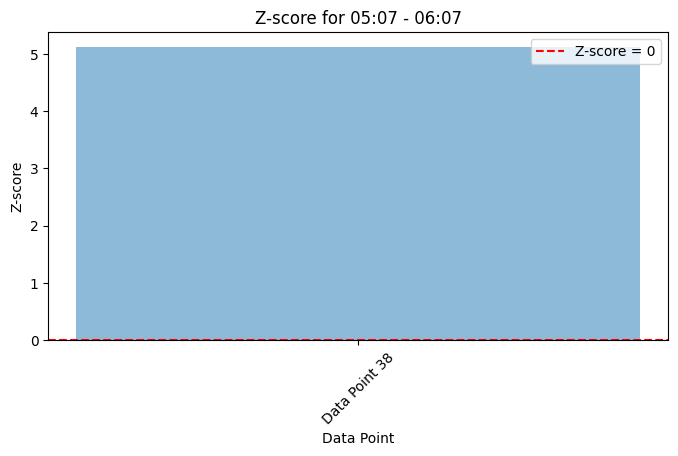

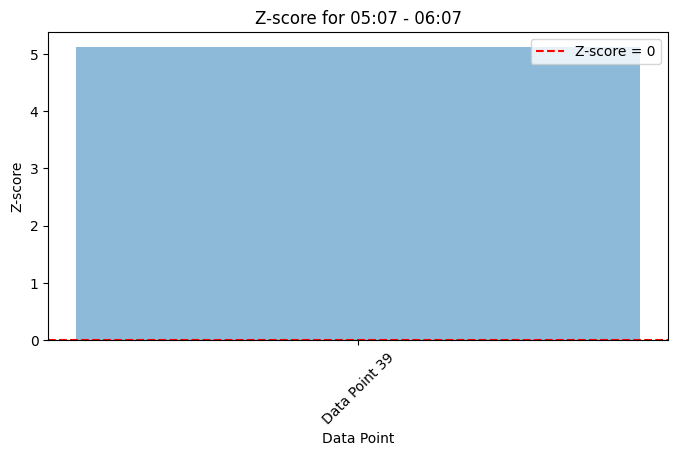

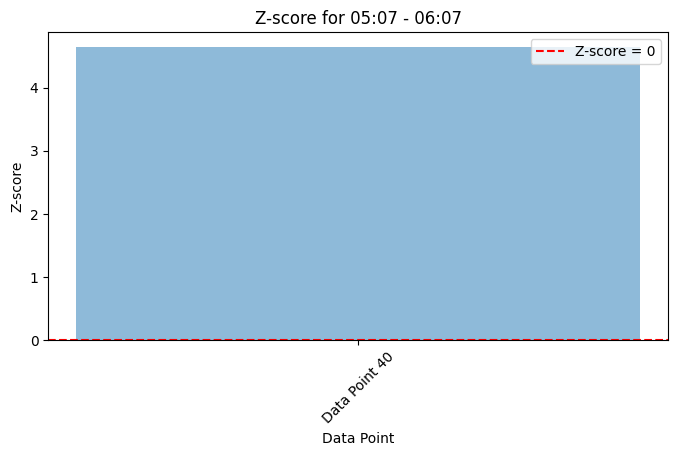

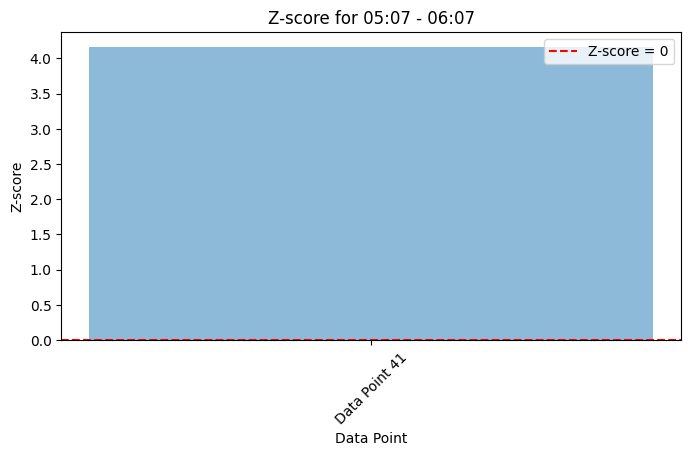

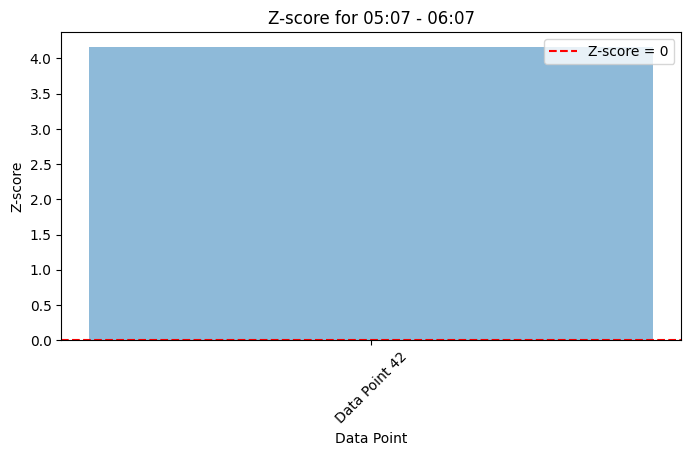

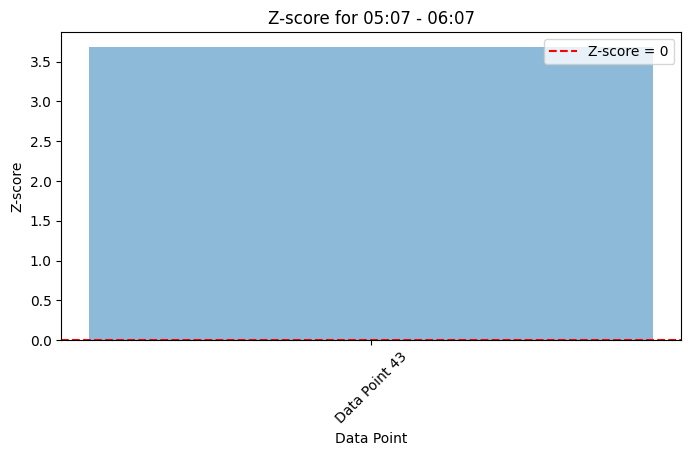

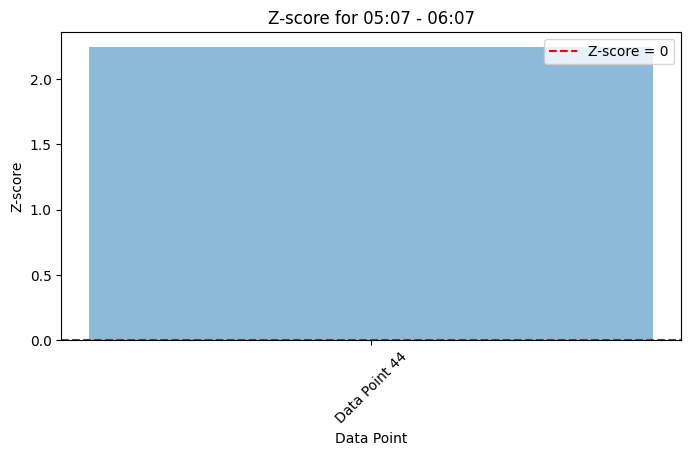

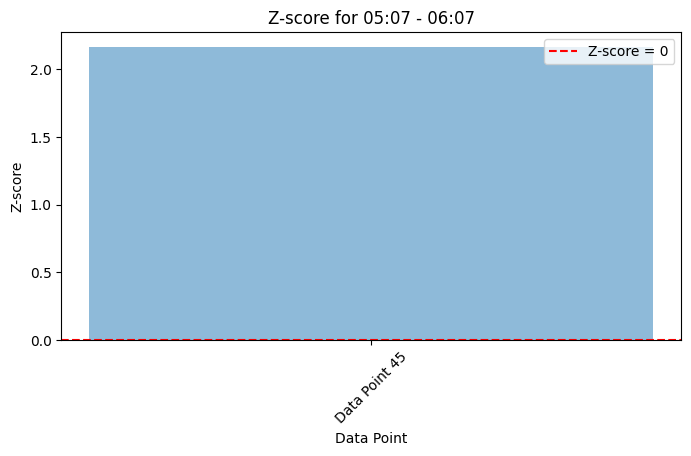

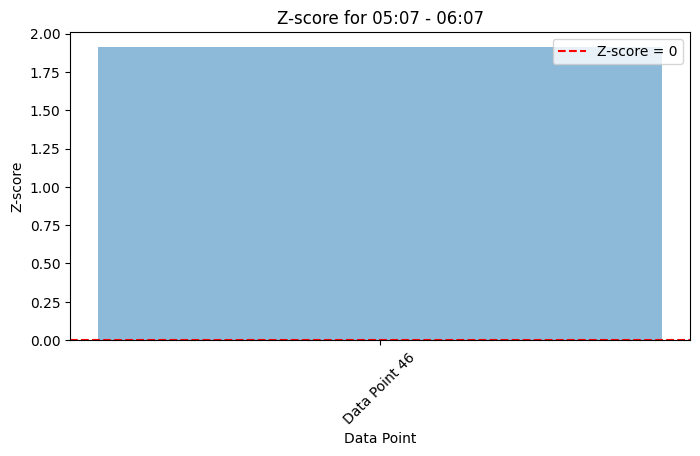

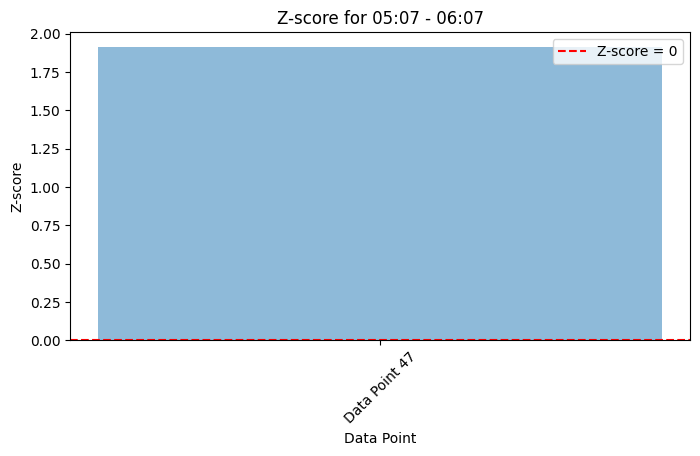

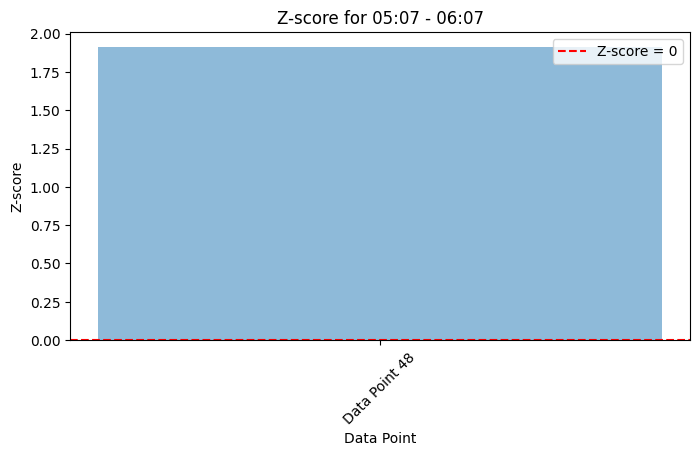

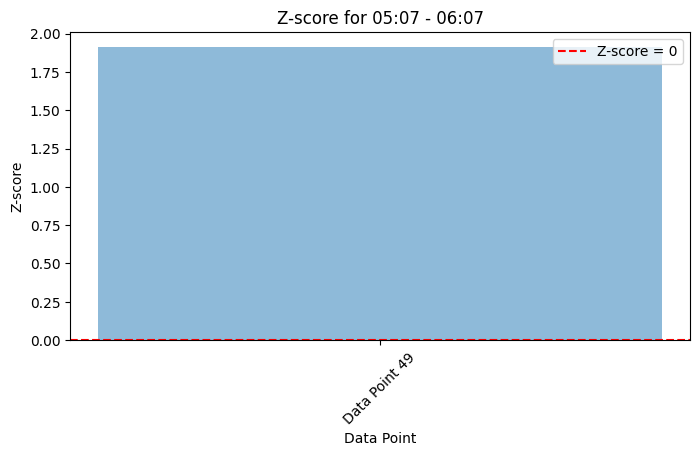

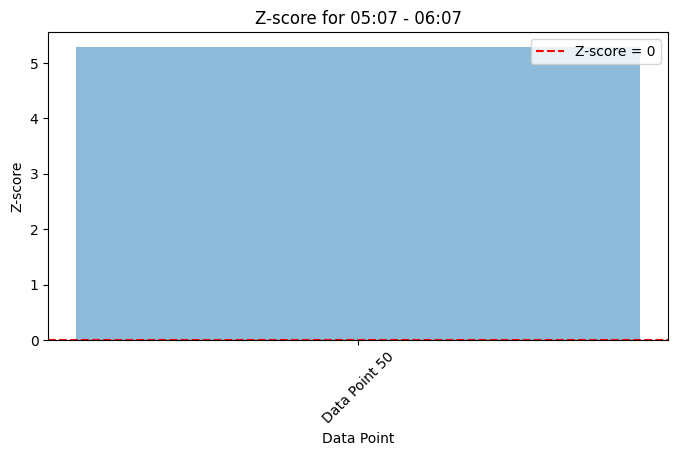

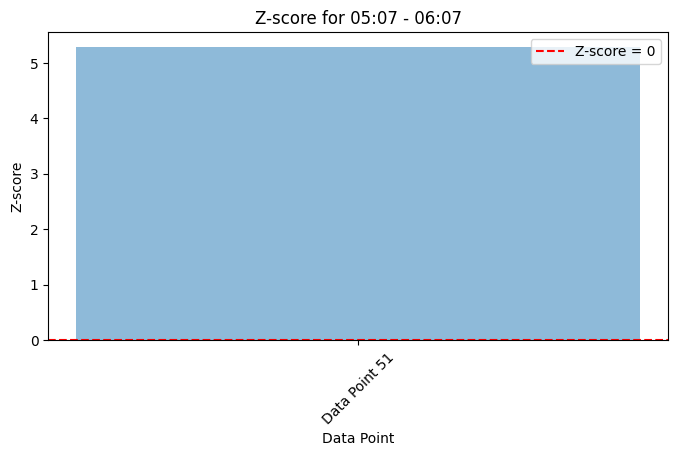

Standard Deviation of Geometric density from mould-1:2023-10-21 06:07:00 to 2023-10-21 07:07:00:


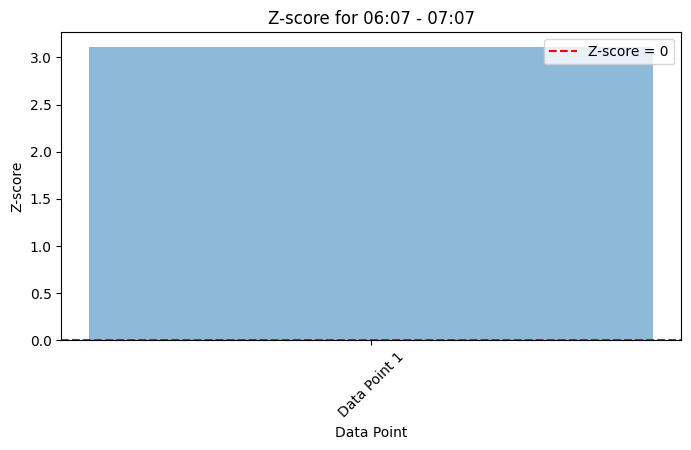

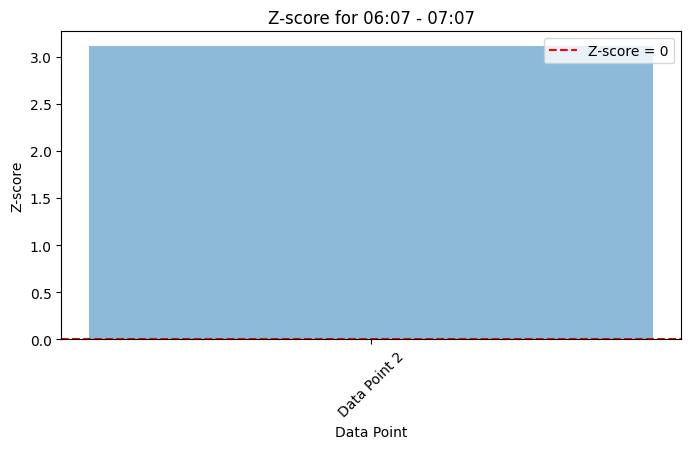

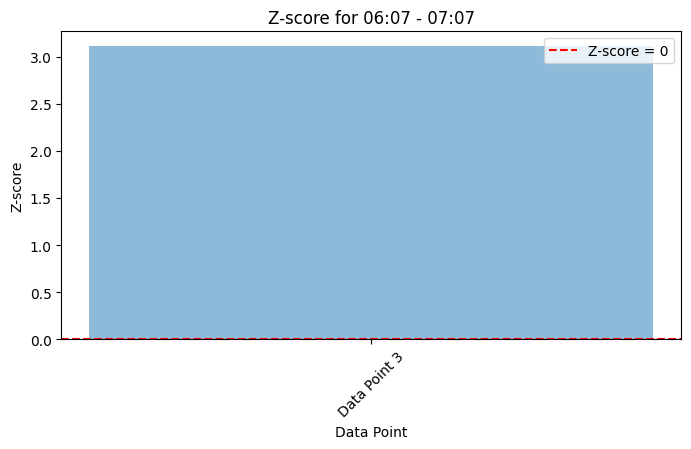

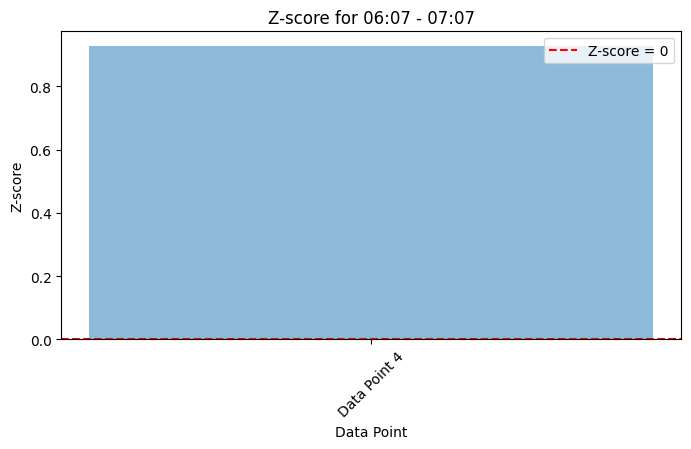

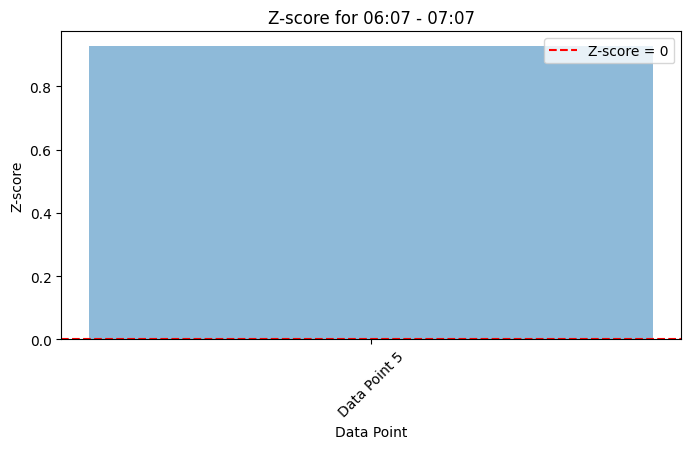

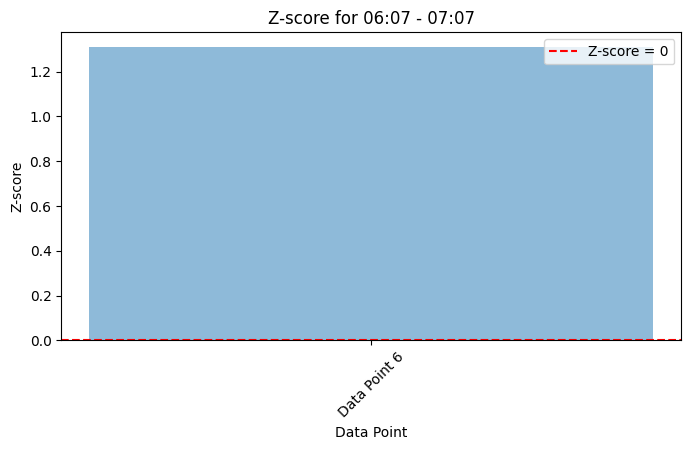

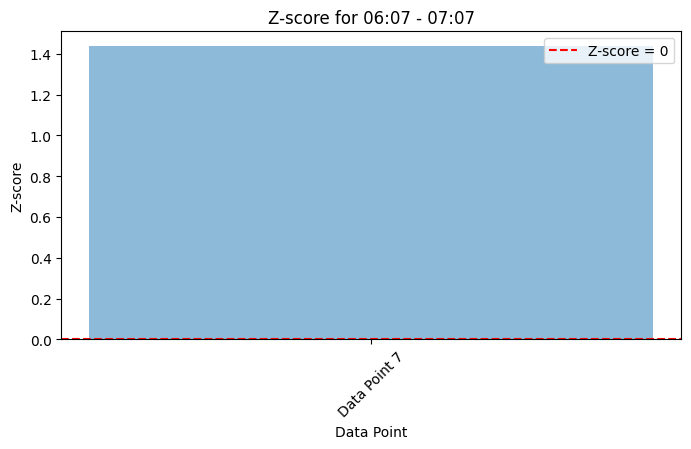

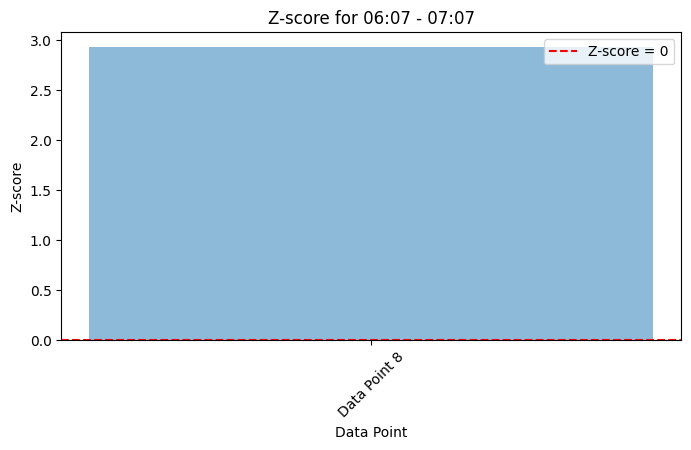

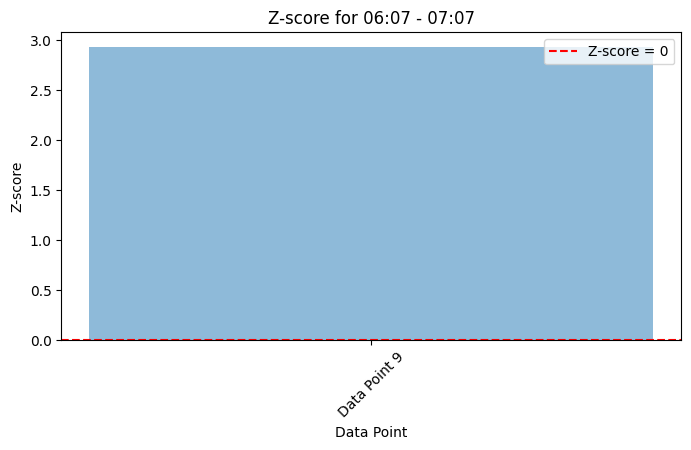

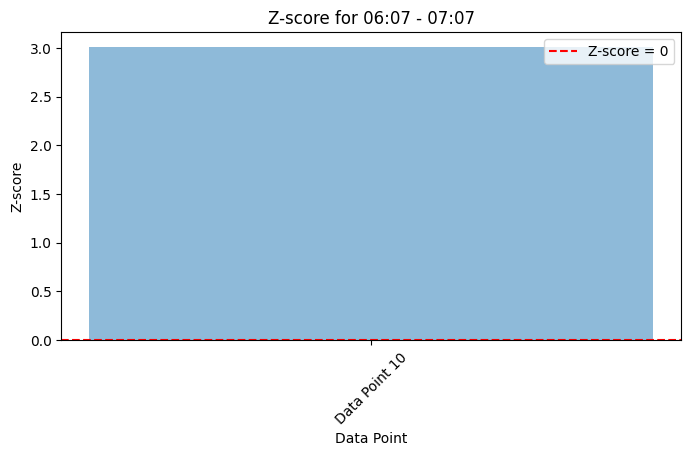

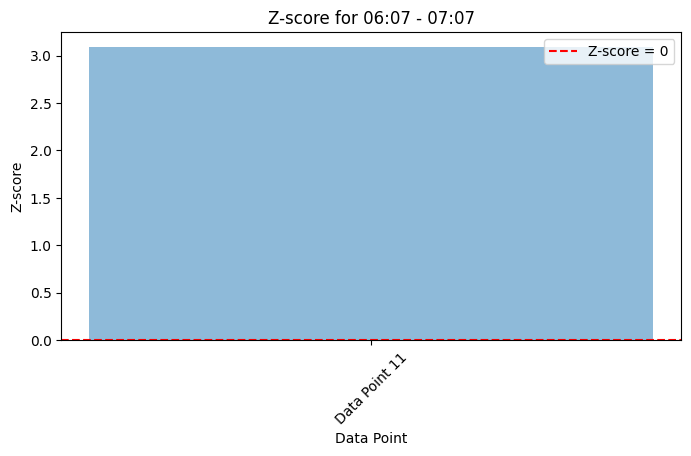

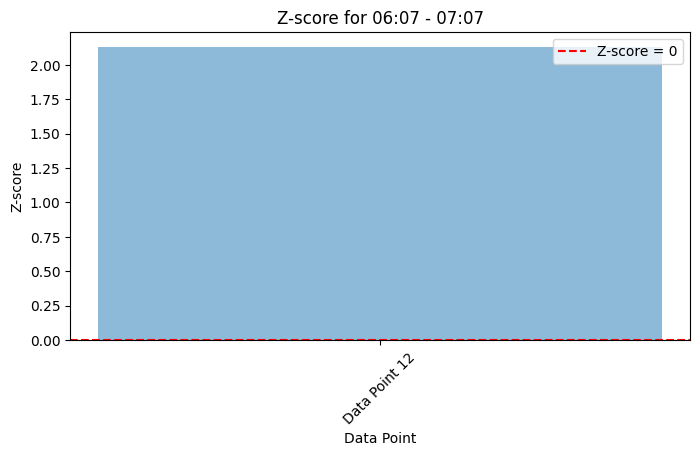

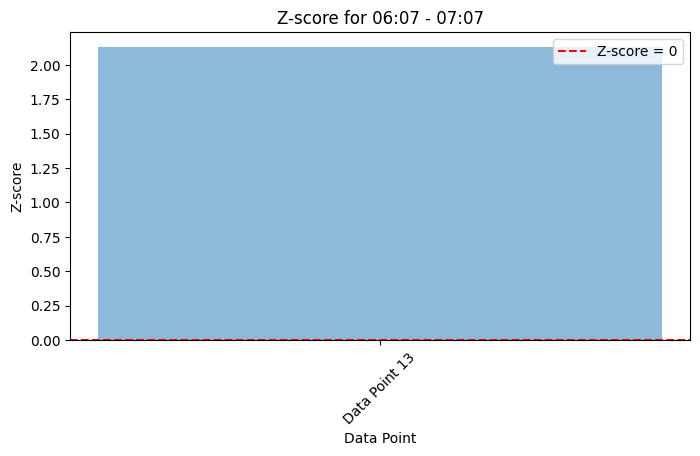

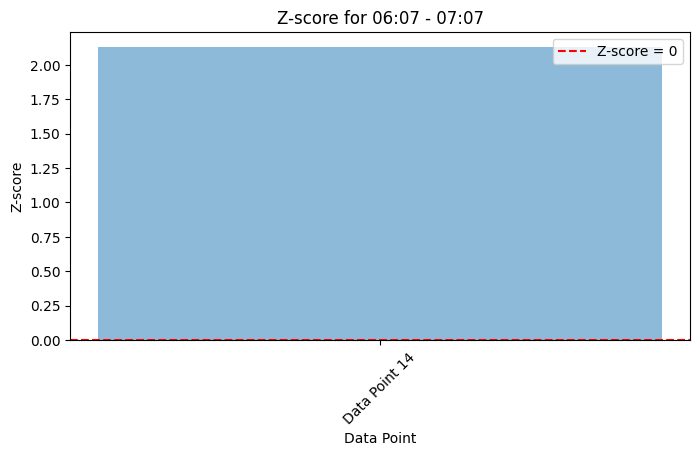

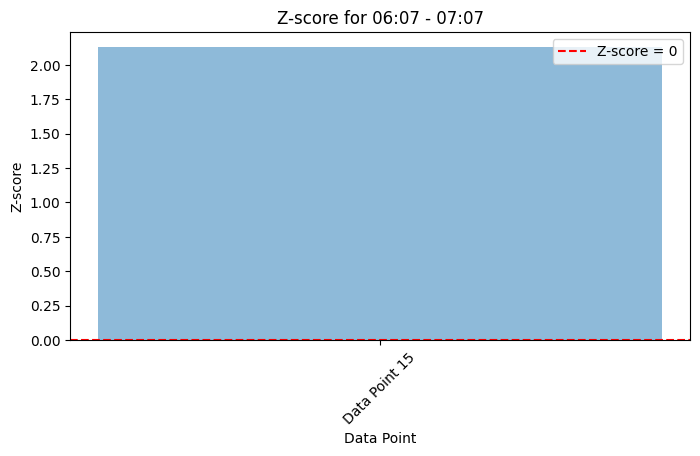

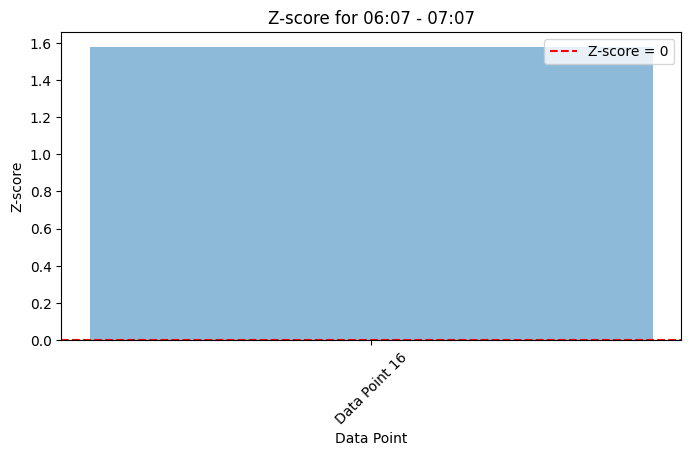

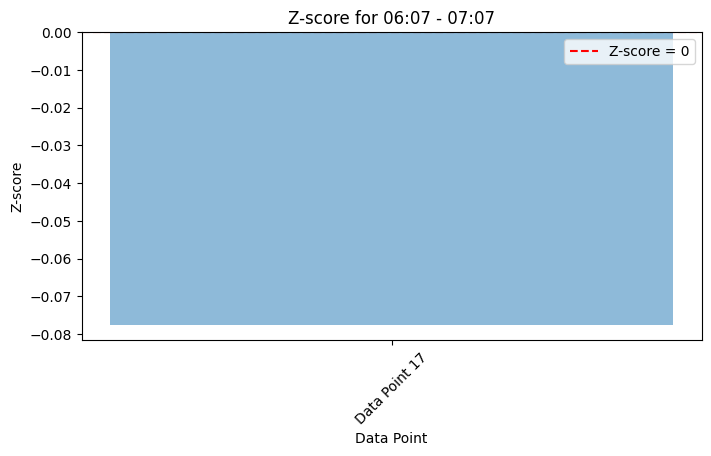

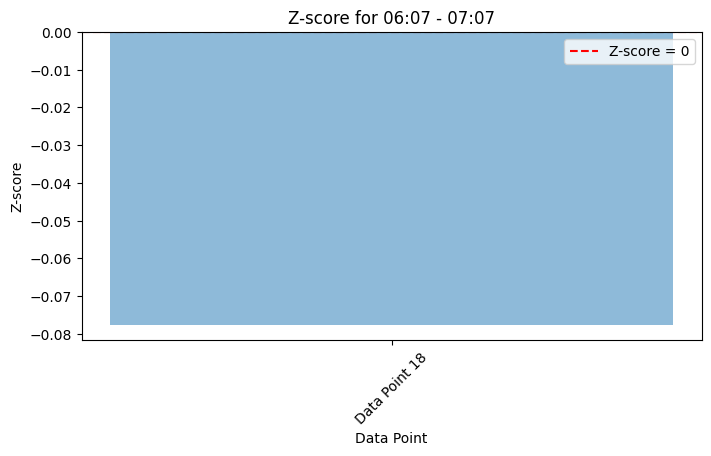

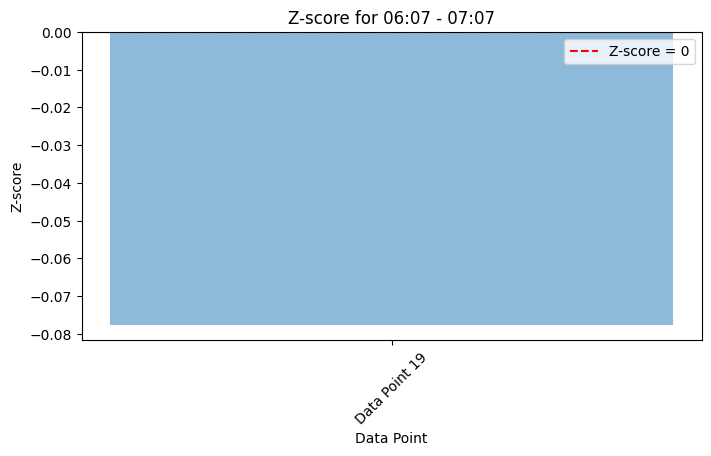

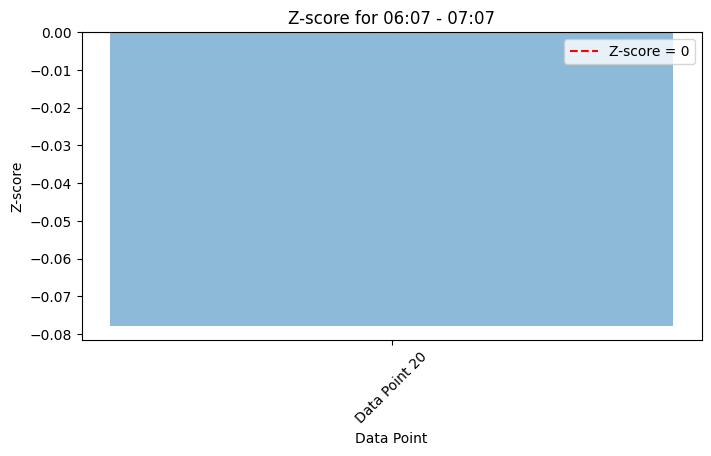

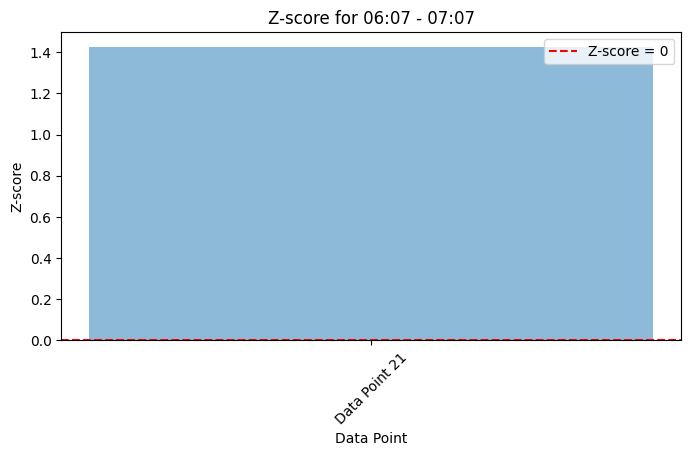

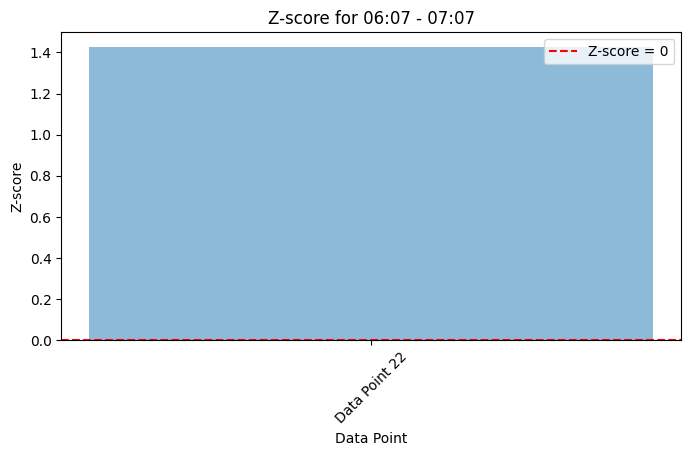

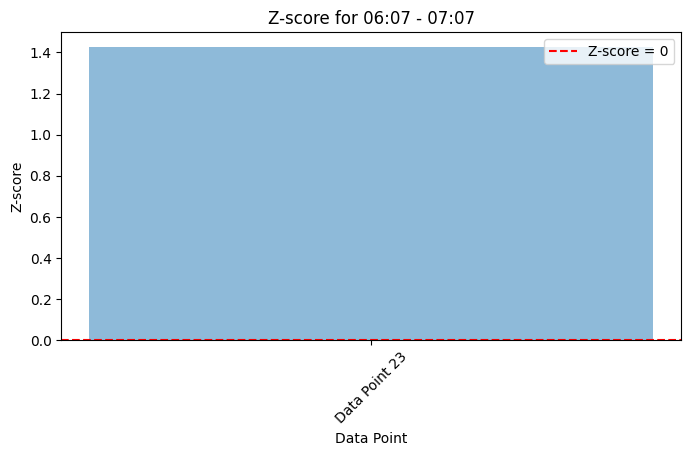

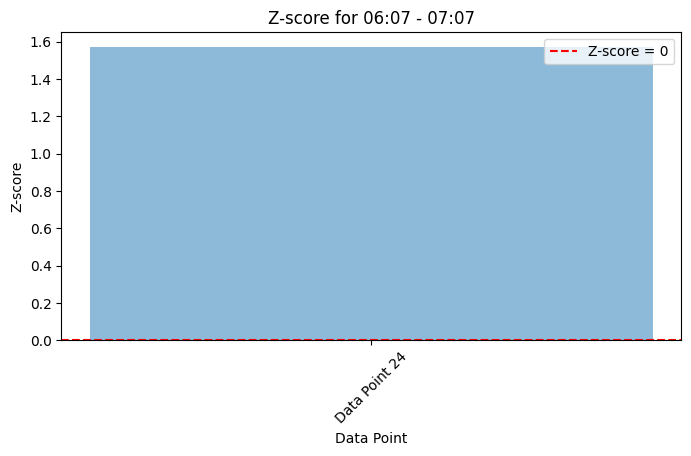

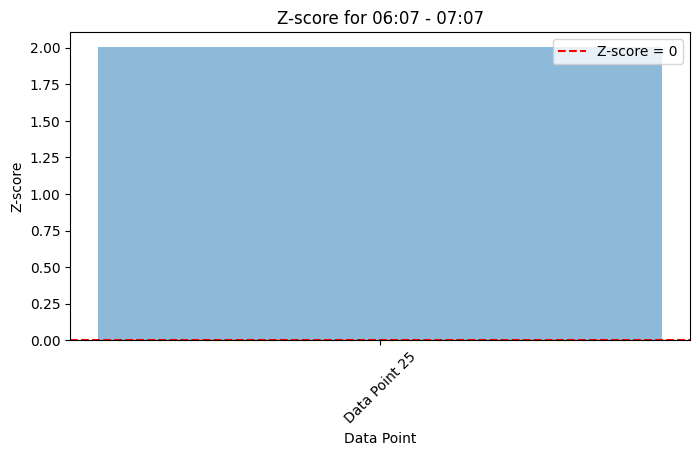

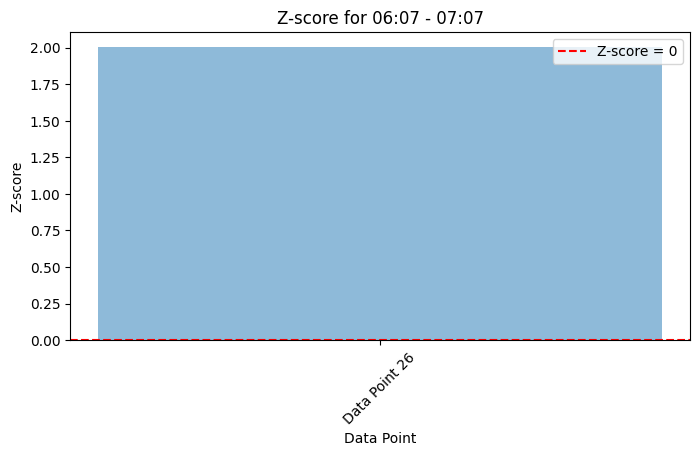

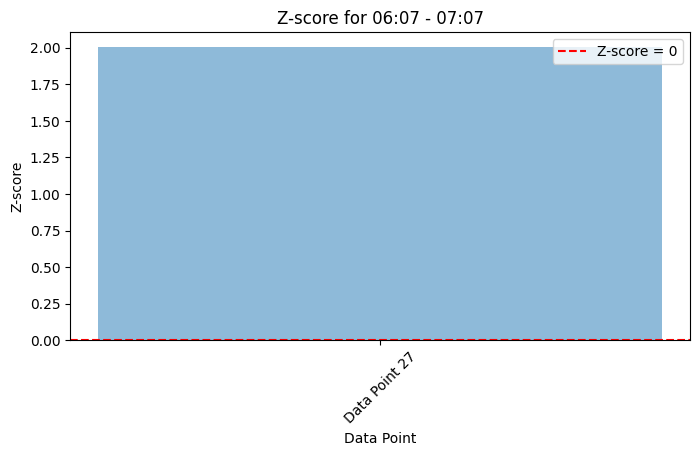

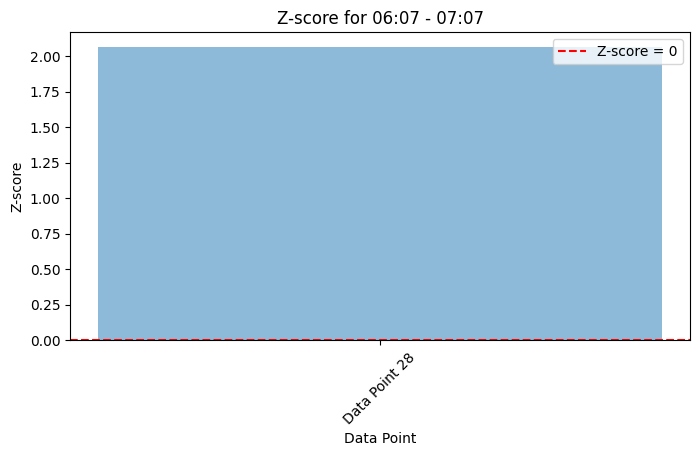

Standard Deviation of Geometric density from mould-1:2023-10-21 07:07:00 to 2023-10-21 08:07:00:


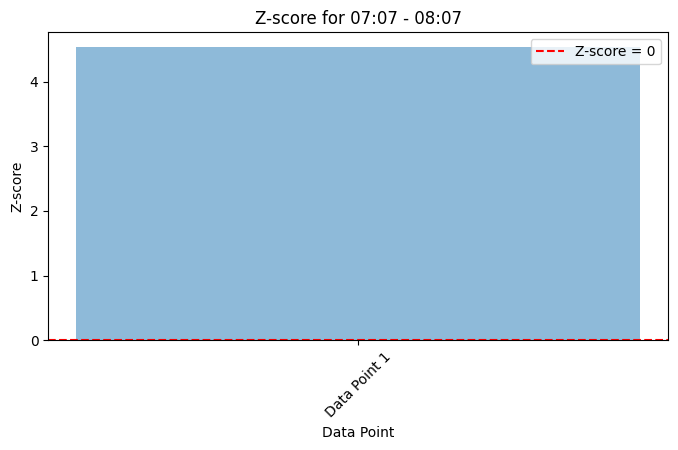

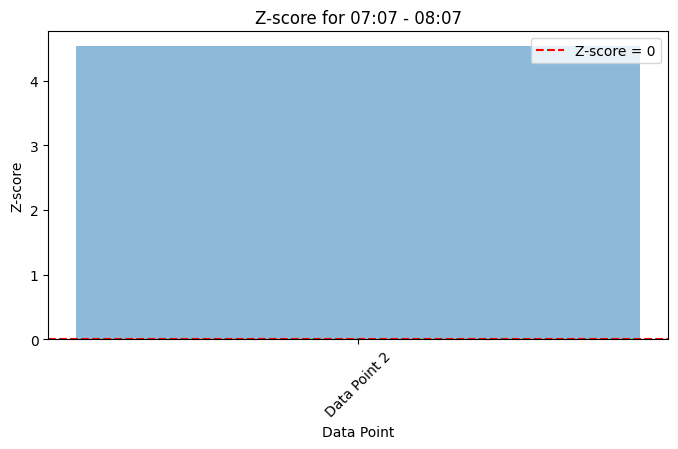

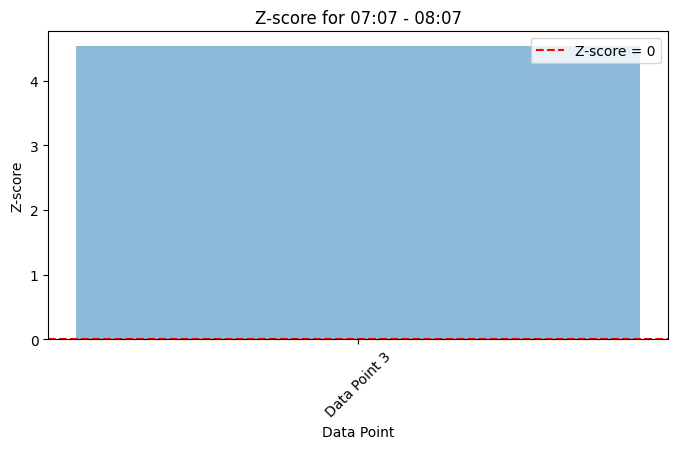

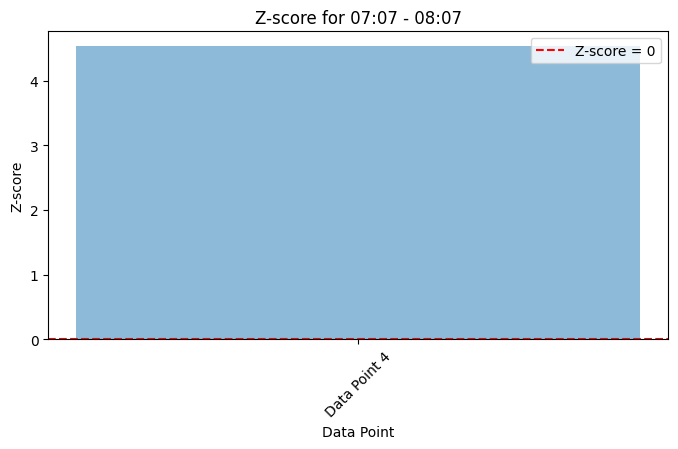

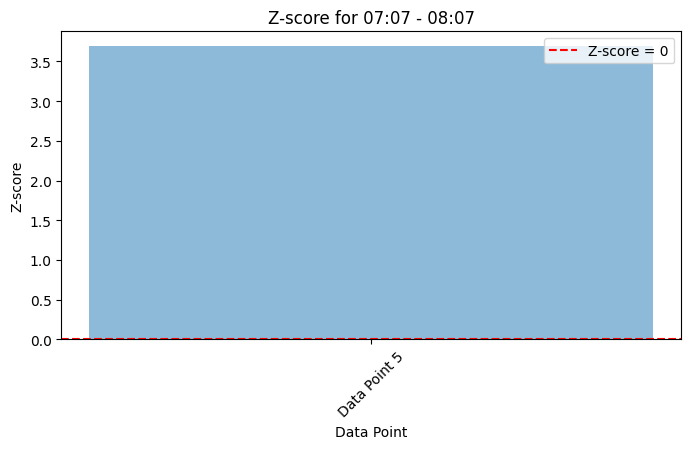

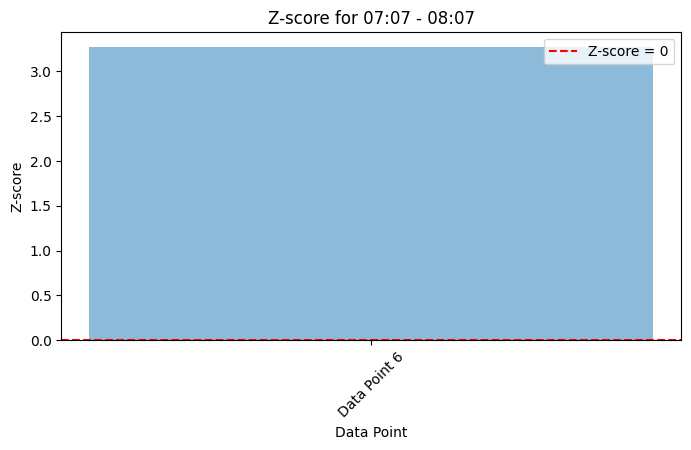

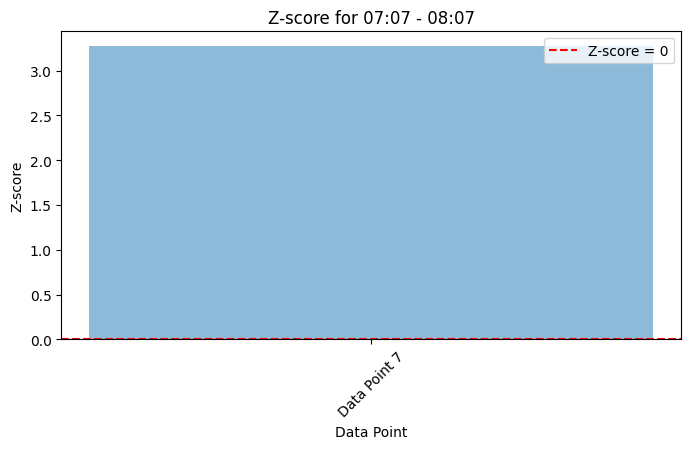

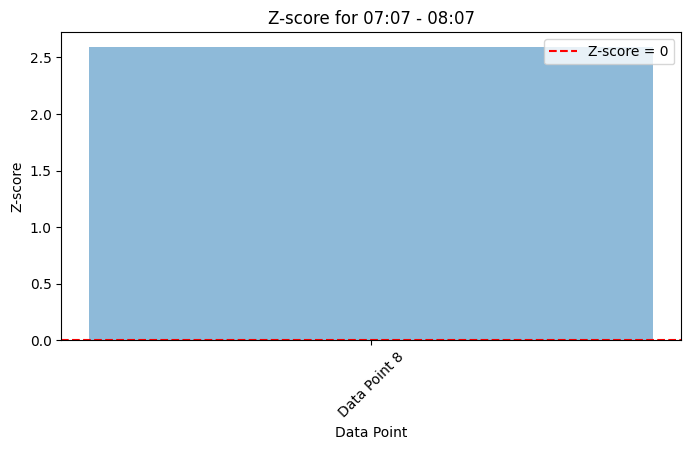

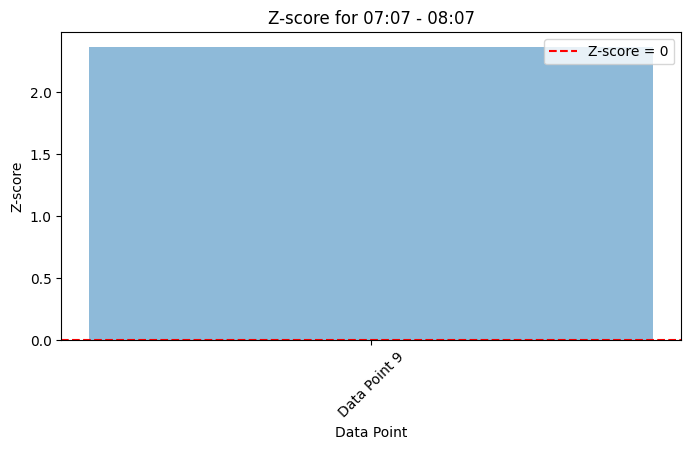

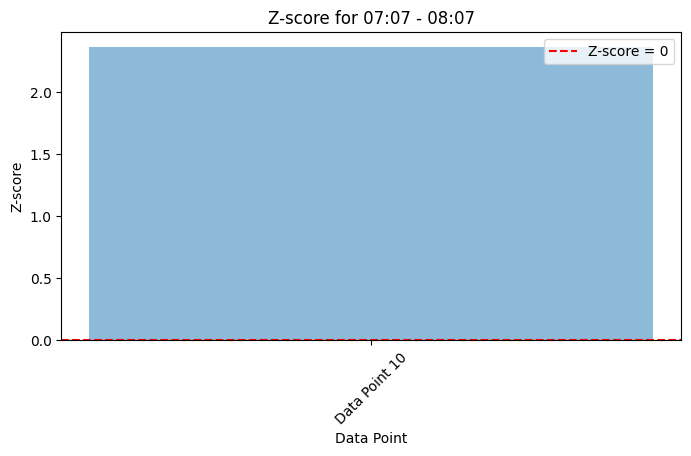

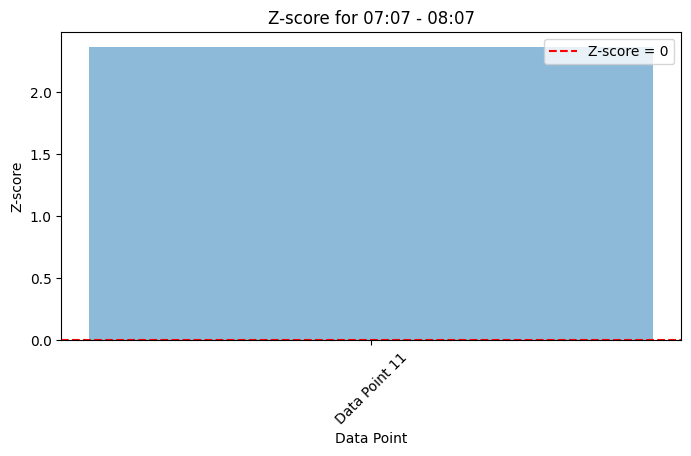

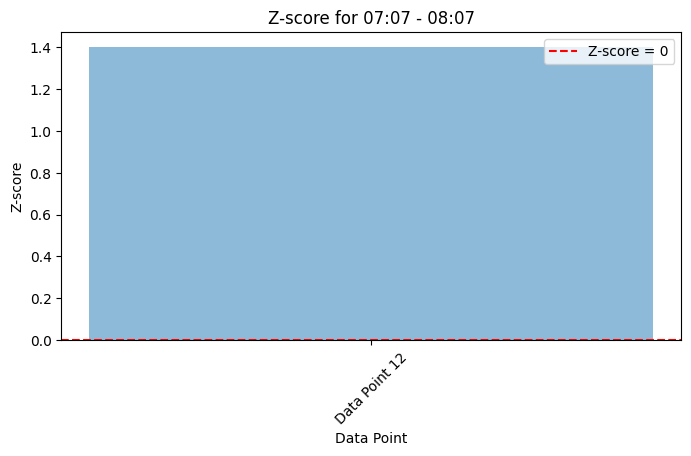

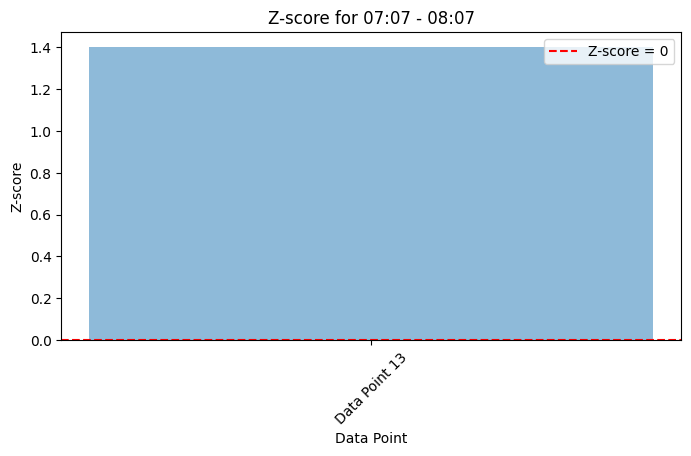

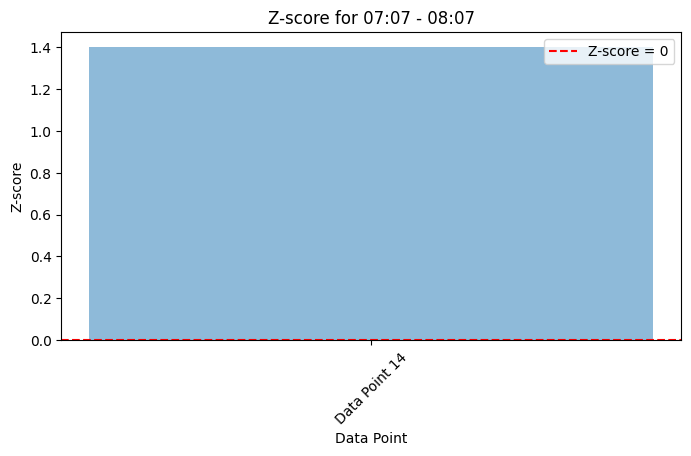

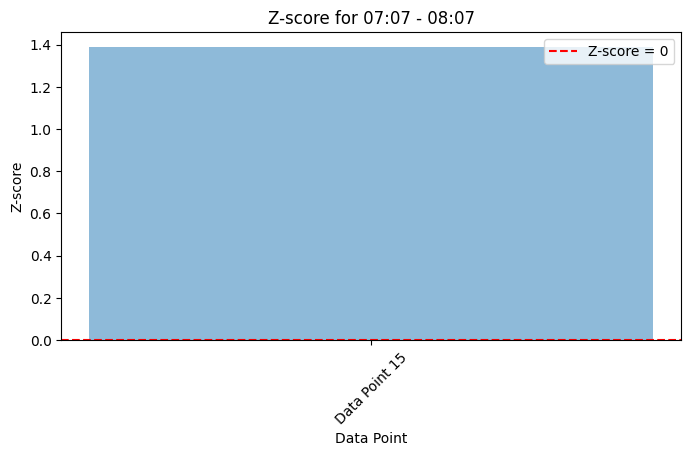

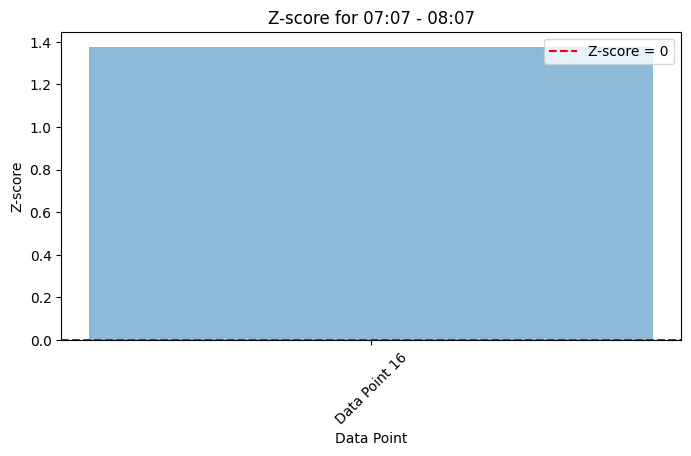

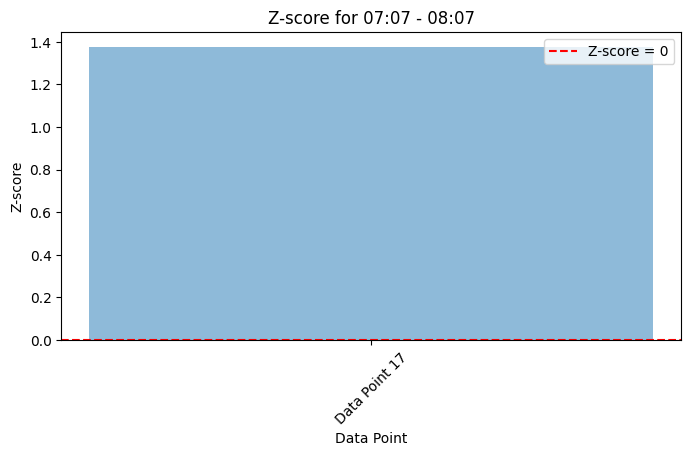

KeyboardInterrupt: 

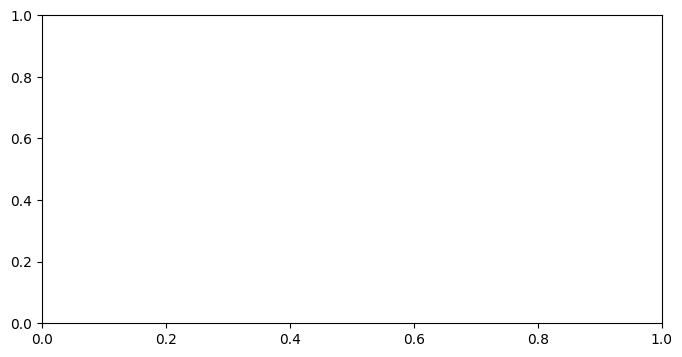

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]

    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')

    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]

    specific_number = 1.65
    data = data_subset.values

    z_scores = (data - specific_number) / np.std(data)

    for k, z_score in enumerate(z_scores):
        # Create a separate bar plot for each z_score
        plt.figure(figsize=(8, 4))
        plt.bar([0], [z_score], align='center', alpha=0.5)
        plt.xticks([0], [f'Data Point {k+1}'], rotation=45)
        plt.xlabel('Data Point')
        plt.ylabel('Z-score')
        plt.title(f'Z-score for {start_time.strftime("%H:%M")} - {end_time.strftime("%H:%M")}')
        plt.axhline(y=0, color='red', linestyle='--', label='Z-score = 0')
        plt.legend()
        plt.show()
